# Analysis of Persuasion Characteristics in Argumentative Content in Discussion Groups
Text Mining Project by **Odeliah Movadat** and **Dikla Vilge**

# １. Introduction

## 1.1. The CMV Forum on Reddit and the "Delta" Concept

[Change My View](https://www.reddit.com/r/changemyview/) (CMV) is a popular subreddit on Reddit where users engage in structured debates with the goal of persuading others to reconsider their viewpoints. Unlike typical internet arguments, CMV encourages respectful discourse, requiring users to provide well-reasoned arguments and evidence. A core feature of CMV is the "delta" system: if a user successfully changes another participant’s mind, the persuaded user awards them a "delta" symbol (∆). This delta serves as an indicator of a convincing argument, making CMV a unique platform for studying persuasion in online discussions. The structured format of the forum, combined with the delta-based feedback, provides a valuable dataset for analyzing what makes an argument compelling.

## 1.2. Goals of the Work

The main objective of this project is to explore the properties that differentiate persuasive arguments from non-persuasive ones. Specifically, we aim to:

* Identify textual properties that contribute to persuasion.

* Analyze the differences between convincing and non-convincing arguments.

* Develop a machine learning model capable of predicting whether an argument is convincing based on its linguistic and structural features.
By achieving these goals, we aim to gain deeper insights into the mechanics of persuasion and contribute to the broader field of computational argumentation analysis.

## 1.3. Motivation

Previous research has leveraged CMV discussions to study persuasion, but earlier studies were often limited by the analytical methods available at the time. With recent advancements in natural language processing (NLP) and machine learning, we now have the tools to extract more nuanced insights from text data. By applying modern text mining techniques, such as transformer-based language models and sophisticated feature engineering methods, we can potentially improve upon previous results and enhance our understanding of what makes an argument compelling. This work has practical applications in areas such as automated debate analysis, content moderation, and persuasive writing assistance.

## 1.4. Process Overview

The research follows a structured methodology to analyze persuasive arguments effectively:

1. **Data Collection & Preparation:** We compile a dataset from CMV discussions, ensuring that each row includes the argument (comment), the context in which it was made, and whether it was awarded a delta (indicating it was convincing).

2. **Feature Engineering:** We identify and extract key textual properties that may influence persuasion, such as sentiment, readability, rhetorical devices, and linguistic complexity.

3. **Model Development & Evaluation:** The extracted features are fed into a machine learning model, which is trained to predict whether an argument will receive a delta. The model's performance is then evaluated using standard classification metrics to determine its effectiveness.

By following this approach, we aim to contribute valuable insights into the nature of persuasive language and refine techniques for automatic persuasion detection.



# ２. Collecting Raw Data

We have 3 sources for the data:

1. Data from a previous study: https://github.com/jpriniski/CMV/tree/master/Study2.
How was it generated? They downloaded the data from redit and stored it in Study2/data directory. Then they executed a script to process the data and srored it in Study2/data/coded. The coded data is what we need.

2. In addition we need to take the data provided to us by Chaya Liebeskind and run the same processing on it.

3. The third data set is data we dowloaded ourselves from reddit. It, too, needs to be processed the same way.

In [ ]:
import pandas as pd
import json


from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.1 Study2 Data

In [ ]:
study2_path = "/content/drive/MyDrive/תואר שני/שנה ב סמסטר א/כריית טקסטים/פרויקט סיום/data/Study2/20180815182030_posts.json"

In [ ]:
with open(study2_path, 'r') as f:
    data = json.load(f)

data1_df = pd.DataFrame(data)
data1_df.head(5)

approved_at_utc                                           selftext  \
0            None  It's no secret - owners of sports teams are us...   
1            None  The main focus of my stance is people who have...   
2            None  Supreme executive power derives from a mandate...   
3            None  Let me start by explaining what I mean when I ...   
4            None  Let me be clear. I know this cannot be imposed...   

  user_reports  saved mod_reason_title  gilded  clicked  \
0           []  False             None       0    False   
1           []  False             None       0    False   
2           []  False             None       2    False   
3           []  False             None       0    False   
4           []  False             None       0    False   

                                               title link_flair_richtext  \
0  CMV: taxpayers and the general public should n...                  []   
1  CMV: People who have been wrongfully imprisone...                  []   
2  CMV:Strange women lying in ponds distributing ...                  []   
3  CMV: Instead of teaching youth to "not judge" ...                  []   
4  CMV: Just like sex education, religion should ...                  []   

  subreddit_name_prefixed  ...  media  is_video _fetched  _info_params  \
0          r/changemyview  ...   None     False    False            {}   
1          r/changemyview  ...   None     False    False            {}   
2          r/changemyview  ...   None     False    False            {}   
3          r/changemyview  ...   None     False    False            {}   
4          r/changemyview  ...   None     False    False            {}   

  comment_limit  comment_sort _flair  _mod  \
0          2048          best   None  None   
1          2048          best   None  None   
2          2048          best   None  None   
3          2048          best   None  None   
4          2048          best   None  None   

                                           _comments  \
0  [{'_mod': None, 'subreddit_id': 't5_2w2s8', 'a...   
1  [{'_mod': None, 'subreddit_id': 't5_2w2s8', 'a...   
2  [{'_mod': None, 'subreddit_id': 't5_2w2s8', 'a...   
3  [{'_mod': None, 'subreddit_id': 't5_2w2s8', 'a...   
4  [{'_mod': None, 'subreddit_id': 't5_2w2s8', 'a...   

                                               topic  
0  {'gender': 0, 'hot_topics': 0, 'lgbt': 0, 'mor...  
1  {'gender': 1, 'hot_topics': 1, 'lgbt': 0, 'mor...  
2  {'gender': 1, 'hot_topics': 0, 'lgbt': 0, 'mor...  
3  {'gender': 1, 'hot_topics': 0, 'lgbt': 0, 'mor...  
4  {'gender': 0, 'hot_topics': 0, 'lgbt': 0, 'mor...  

[5 rows x 95 columns]

The identifer of each thread is stored in the id column:

In [ ]:
data1_df['id']

0     7ej2uh
1     8jzpca
2     4k83qf
3     7usy79
4     647u7d
5     6wcd0a
6     83lq6t
7     8jr260
8     6yjmgl
9     60u6bk
10    8x1zx3
11    87ncab
12    8lv1td
13    64tnan
14    71bq8h
15    8ykvla
16    6966j3
17    94k9lf
18    6zq9km
19    4xsg8k
20    7lzd56
21    885z0a
22    7yve2v
23    8mjg7d
24    8xmh3v
25    6u9rdo
26    8hezht
27    86u7zl
28    74ciqw
Name: id, dtype: object

## 2.2 The Data from Chaya

Now we need to prepare redit_data. first we need to make a single file out of all the json files

In [ ]:
redit_data_dir_path = '/content/drive/MyDrive/תואר שני/שנה ב סמסטר א/כריית טקסטים/פרויקט סיום/redit_data'

In [ ]:
import os
import json

combined_data = []
for filename in os.listdir(redit_data_dir_path):
  if filename.endswith(".json"):
    filepath = os.path.join(redit_data_dir_path, filename)
    with open(filepath, 'r') as f:
      try:
        data = json.load(f)
        if isinstance(data, list):
          combined_data.extend(data)
        else:
          combined_data.append(data)
      except json.JSONDecodeError as e:
        print(f"Error decoding JSON in file {filename}: {e}")

output_filepath = os.path.join(redit_data_dir_path, "combined.json")
with open(output_filepath, 'w') as f:
  json.dump(combined_data, f, indent=2)

We cloned the git repo into the local development environment, and put the combined json into the repo. We executed the discussion_analysis script over it, to process the data and get a similar structure like the data of study 2. The new data contains the delta column.

We will load the resulting data into a dataframe.


In [ ]:
new_data_coded_path = '/content/drive/MyDrive/תואר שני/שנה ב סמסטר א/כריית טקסטים/פרויקט סיום/data/combined.json'
with open(new_data_coded_path, 'r') as f:
    data = json.load(f)

data2_df = pd.DataFrame(data)
data2_df.head(5)

approved_at_utc                                           selftext  \
0            None  Mike Bloomberg recently dropped out of the 202...   
1            None  Kanye West is a shill for president Trump and ...   
2            None  I used to think I was against a national healt...   
3            None  I write this because I am tired of the wild go...   
4            None  From what I know, Christ was essentially a rad...   

  user_reports  saved mod_reason_title  gilded  clicked  \
0           []  False             None       1    False   
1           []  False             None       4    False   
2           []  False             None       0    False   
3           []  False             None       4    False   
4           []  False             None       1    False   

                                               title link_flair_richtext  \
0  CMV: Mike Bloomberg's campaign is proof that t...                  []   
1  CMV: Kanye West is a shill for president Trump...                  []   
2  CMV: Most Americans who oppose a national heal...                  []   
3  CMV: Donald Trump has not made a single lastin...                  []   
4  CMV: being a conservative is the least Christ-...                  []   

  subreddit_name_prefixed  ...  media  is_video _fetched  _info_params  \
0          r/changemyview  ...   None     False    False          None   
1          r/changemyview  ...   None     False    False          None   
2          r/changemyview  ...   None     False    False          None   
3          r/changemyview  ...   None     False    False          None   
4          r/changemyview  ...   None     False    False          None   

  comment_limit  comment_sort _flair  _mod  \
0          2048    confidence   None  None   
1          2048    confidence   None  None   
2          2048    confidence   None  None   
3          2048    confidence   None  None   
4          2048    confidence   None  None   

                                           _comments  \
0  [{'_mod': None, 'subreddit_id': 't5_2w2s8', 'a...   
1  [{'_mod': None, 'subreddit_id': 't5_2w2s8', 'a...   
2  [{'_mod': None, 'subreddit_id': 't5_2w2s8', 'a...   
3  [{'_mod': None, 'subreddit_id': 't5_2w2s8', 'a...   
4  [{'_mod': None, 'subreddit_id': 't5_2w2s8', 'a...   

                                               topic  
0  {'gender': {'match': True, 'terms': [['he']]},...  
1  {'gender': {'match': True, 'terms': [['he'], [...  
2  {'gender': {'match': True, 'terms': [['she'], ...  
3  {'gender': {'match': True, 'terms': [['he']]},...  
4  {'gender': {'match': True, 'terms': [['boy'], ...  

[5 rows x 95 columns]

## 2.3 The Downloaded Data

We downloaded from Redit the top 500 threads using collect_posts script. We executed the discussion_analysis script on the downloaded file, zipped the result and uploaded to drive. Now, we will read the file from drive, unzip it and load it into a third dataframe.

In [ ]:
our_downloaded_data_path = '/content/drive/MyDrive/תואר שני/שנה ב סמסטר א/כריית טקסטים/פרויקט סיום/20250210005631_posts.zip'


In [ ]:
# prompt: the file our_downloaded_data_path is a zip file. Extract the zip, and read the resulting json  into a dataframe

import zipfile
import pandas as pd
import json

# Extract the zip file
with zipfile.ZipFile(our_downloaded_data_path, 'r') as zip_ref:
    zip_ref.extractall("extracted_data")

# Find the JSON file within the extracted directory
import os
for filename in os.listdir("extracted_data"):
    if filename.endswith(".json"):
        json_filepath = os.path.join("extracted_data", filename)
        break

# Read the JSON file into a DataFrame
try:
    with open(json_filepath, 'r') as f:
        data = json.load(f)
    data3_df = pd.DataFrame(data)
    print(data3_df.head()) # Print the first few rows of the DataFrame
except FileNotFoundError:
    print(f"Error: JSON file not found in the extracted directory.")
except json.JSONDecodeError:
    print(f"Error: Invalid JSON format in the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

                                            selftext  gilded  \
0  Mike Bloomberg recently dropped out of the 202...     1.0   
1  Kanye West is a shill for president Trump and ...     4.0   
2  I used to think I was against a national healt...     NaN   
3  I write this because I am tired of the wild go...     4.0   
4  From what I know, Christ was essentially a rad...     1.0   

                                               title subreddit_name_prefixed  \
0  CMV: Mike Bloomberg's campaign is proof that t...          r/changemyview   
1  CMV: Kanye West is a shill for president Trump...          r/changemyview   
2  CMV: Most Americans who oppose a national heal...          r/changemyview   
3  CMV: Donald Trump has not made a single lastin...          r/changemyview   
4  CMV: being a conservative is the least Christ-...          r/changemyview   

   pwls link_flair_css_class       name subreddit_type    ups  \
0     6              OPdelta  t3_fdziov         public  65400   
1   

## 2.4 Combined DataSet

Since the data was collected in different times, it may contain duplicate ids and the content may differ. We want to keep the newer version of any duplicate. The order of the download from old to new is: study2, reddit data, our downloaded data.

So we always keep the copy in the newer dataset.

First, remove from data1 all ids that exist in data2:

In [ ]:
# Original count of examples in study2:
print(len(data1_df))

29


In [ ]:
ids_to_remove = set(data1_df['id']).intersection(set(data2_df['id']))
data1_df = data1_df[~data1_df['id'].isin(ids_to_remove)]


In [ ]:
# How many rows are left in study2_df?

print(len(data1_df))


27


Now we combine data1 and data2:

In [ ]:
import pandas as pd
combined12_df = pd.concat([data1_df, data2_df], ignore_index=True)

Now, remove from the combined data of data1 and data2, all ids that exist in data3:

In [ ]:
print(len(combined12_df))

119


In [ ]:
ids_to_remove = set(combined12_df['id']).intersection(set(data3_df['id']))
combined12_df = combined12_df[~combined12_df['id'].isin(ids_to_remove)]

In [ ]:
print(len(combined12_df))

8


In [ ]:
df = pd.concat([combined12_df, data3_df], ignore_index=True)

In [ ]:
print(len(df))

433


This is our final dataframe, without duplicates, and with the newest version of each thread.

# ３. Understanding Raw Data

In [ ]:
df.columns

Index(['approved_at_utc', 'selftext', 'user_reports', 'saved',
       'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext',
       'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class',
       'downs', 'parent_whitelist_status', 'hide_score', 'name', 'quarantine',
       'link_flair_text_color', 'author_flair_background_color',
       'subreddit_type', 'ups', 'domain', 'media_embed',
       'author_flair_template_id', 'is_original_content', 'secure_media',
       'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed',
       'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'thumbnail',
       'edited', 'author_flair_css_class', 'author_flair_richtext',
       'content_categories', 'is_self', 'mod_note', 'created',
       'link_flair_type', 'wls', 'banned_by', 'author_flair_type',
       'contest_mode', 'selftext_html', 'likes', 'suggested_sort',
       'banned_at_utc', 'view_count', 'archived', 'no_follow',
       'is_crossposta

Let's try to "feel" what's inside some of the columns:

In [ ]:
df.iloc[0]['_comments'][0]

{'_mod': None,
 'subreddit_id': 't5_2w2s8',
 'approved_at_utc': None,
 'ups': 1,
 'mod_reason_by': None,
 'banned_by': None,
 'removal_reason': None,
 'link_id': 't3_7usy79',
 'author_flair_type': 'text',
 'author_flair_template_id': None,
 'likes': None,
 'no_follow': False,
 'user_reports': [],
 'saved': False,
 'id': 'dtn63tp',
 'banned_at_utc': None,
 'mod_reason_title': None,
 'gilded': 0,
 'archived': True,
 'report_reasons': None,
 'author': 'DeltaBot',
 'can_mod_post': False,
 'send_replies': True,
 'parent_id': 't3_7usy79',
 'score': 1,
 'approved_by': None,
 'downs': 0,
 'body': "/u/justmikewilldo (OP) has awarded 3 deltas in this post.\n\nAll comments that earned deltas (from OP or other users) are listed [**here**](/r/DeltaLog/comments/7uu885), in /r/DeltaLog.\n\nPlease note that a change of view [doesn't necessarily mean a reversal](https://www.reddit.com/r/changemyview/wiki/index#wiki_what_is_a_.27view.27.3F), or that the conversation has ended.\n\n^[Delta\xa0System\xa0Ex

In [ ]:
df.iloc[0]['_comments'][0]['Delta']

{'count': 0, 'from': {}}

In [ ]:
df.iloc[0]['_comments'][0]['body']


"/u/justmikewilldo (OP) has awarded 3 deltas in this post.\n\nAll comments that earned deltas (from OP or other users) are listed [**here**](/r/DeltaLog/comments/7uu885), in /r/DeltaLog.\n\nPlease note that a change of view [doesn't necessarily mean a reversal](https://www.reddit.com/r/changemyview/wiki/index#wiki_what_is_a_.27view.27.3F), or that the conversation has ended.\n\n^[Delta\xa0System\xa0Explained](https://www.reddit.com/r/changemyview/wiki/deltasystem) ^| ^[Deltaboards](https://www.reddit.com/r/changemyview/wiki/deltaboards)"

In [ ]:
df.iloc[0]['_comments'][0]['evidence_use']

{'data': 0,
 'economics': 0,
 'evidence': 0,
 'numbers': 0,
 'stats': 1,
 'values': 0}

In [ ]:
thread = df.iloc[0]['_comments']
comments = {com['id']: com for com in thread}
comments

{'dtn63tp': {'_mod': None,
  'subreddit_id': 't5_2w2s8',
  'approved_at_utc': None,
  'ups': 1,
  'mod_reason_by': None,
  'banned_by': None,
  'removal_reason': None,
  'link_id': 't3_7usy79',
  'author_flair_type': 'text',
  'author_flair_template_id': None,
  'likes': None,
  'no_follow': False,
  'user_reports': [],
  'saved': False,
  'id': 'dtn63tp',
  'banned_at_utc': None,
  'mod_reason_title': None,
  'gilded': 0,
  'archived': True,
  'report_reasons': None,
  'author': 'DeltaBot',
  'can_mod_post': False,
  'send_replies': True,
  'parent_id': 't3_7usy79',
  'score': 1,
  'approved_by': None,
  'downs': 0,
  'body': "/u/justmikewilldo (OP) has awarded 3 deltas in this post.\n\nAll comments that earned deltas (from OP or other users) are listed [**here**](/r/DeltaLog/comments/7uu885), in /r/DeltaLog.\n\nPlease note that a change of view [doesn't necessarily mean a reversal](https://www.reddit.com/r/changemyview/wiki/index#wiki_what_is_a_.27view.27.3F), or that the conversatio

In [ ]:
# 1 comment example:
comment_id = 'dtsmms8'  # selected randomly manually from the list above
parent_id = comments[comment_id]['parent_id']
parent_id

't1_dtoimcb'

In [ ]:
for comment in comments.values():
  comment['parent_id_edited'] = comment['parent_id'].split('_')[1]

In [ ]:
print("The parent comment:")
print(comments[parent_id.split('_')[1]]['body'])
print()
print("The original comment:")
print(comments[comment_id]['body'])

The parent comment:
That is your opinion.


The original comment:
I guess? In my experience people who are *truly* hopeless, not just looking for internet points, are typically homeless or suicidal, or addicts. I don't know of anyone who is a person who has no hopes who's doing so well for themselves. 


In [ ]:
df.iloc[0]['id']

'7usy79'

In [ ]:
df.iloc[0]['title']

'CMV: Instead of teaching youth to "not judge" we should be teaching them *how* to judge with kindness, mercy, logic, and fairness.'

In [ ]:
print(df.iloc[0]['selftext'].replace('\n', '\n'))

print("\n--- Authored by: " + df.iloc[0]['author'])


Let me start by explaining what I mean when I say judge in this context. 

I am a father of a 5 year old girl and as anyone who's spent a lot of time with babies and young children, I want to help guide her through life and give her the tools to interpret the world around her. 

When we see a child behaving very poorly in public there are times when I choose to speak with her about what's happening. At the onset of this moment, when we are going to voice our thoughts about the behavior of others, whether it's my daughter and I, you by yourself in your head, or anyone in really any circumstance, we are entering a judgmental space by it's literal definition. 

Any way to frame, or speak about some else's actions requires judgments to be made. Our society has made the word 'judgmental' have strong negative connotations, and I believe people are uncomfortable with using others as teaching opportunities for fear of being "judgmental" 

Here's an example of what I'm talking about. Daughter a

In [ ]:
# print a few examples for a comment that is a child of the original body
counter = 0
for comment in comments.values():
  if comment['parent_id_edited'] == df.iloc[0]['id']:
    print(comment['body'])
    print("\n--- Authored by: " + comment['author'])
    print("-----------------------")
    counter += 1
    if counter == 3:
      break

/u/justmikewilldo (OP) has awarded 3 deltas in this post.

All comments that earned deltas (from OP or other users) are listed [**here**](/r/DeltaLog/comments/7uu885), in /r/DeltaLog.

Please note that a change of view [doesn't necessarily mean a reversal](https://www.reddit.com/r/changemyview/wiki/index#wiki_what_is_a_.27view.27.3F), or that the conversation has ended.

^[Delta System Explained](https://www.reddit.com/r/changemyview/wiki/deltasystem) ^| ^[Deltaboards](https://www.reddit.com/r/changemyview/wiki/deltaboards)

--- Authored by: DeltaBot
-----------------------
I am not trying to change your view because it is one the I espouse myself - having worked in Childcare for quite a few years I can attest to how this view not only helps children but creates a relationship full of trust, respect, and even love. In my experience children really pick up on the respect part and can more genuinely reciprocate and manage their emotions better when it is their own behaviors being scrutin

# ４. Creating the Comments DataSet

The raw data contains a row for every thread. We want to find the convincing comments and create for each of them a row that contains:
* The original post
* The convincing comment
* The context: all the previous comments in the thread that were authored by the same same author as the convincing comment
* The class = is_convincing = true
* The convincing comment id (for debugging purposes)

We will throw away any additional comments that come AFTER the convincing comment in the thead.

Then, for every "leaf" in the tree of comments, we will create an appropriate row with the same structure, and set is_convincing = false. Unless the leaf is a parent of a (removed) convincing comment.

**Note:** we chose to define the context of the comment as only the comments by the same author. We could use all the comments in the thread instead. There are pros and cons for each approach.

If we only use the comments by the same author, we may lose other comments by different authors that represent the same "side" of the argument as the author of the convincing comment, and these additional commnets may affect the overall persuasion.

However, using only the same author guarentees that the "context" will have the same writing style, sentiment and opinion as the convincing comment. The style and sentiment are important for the features that we will later create from the data.

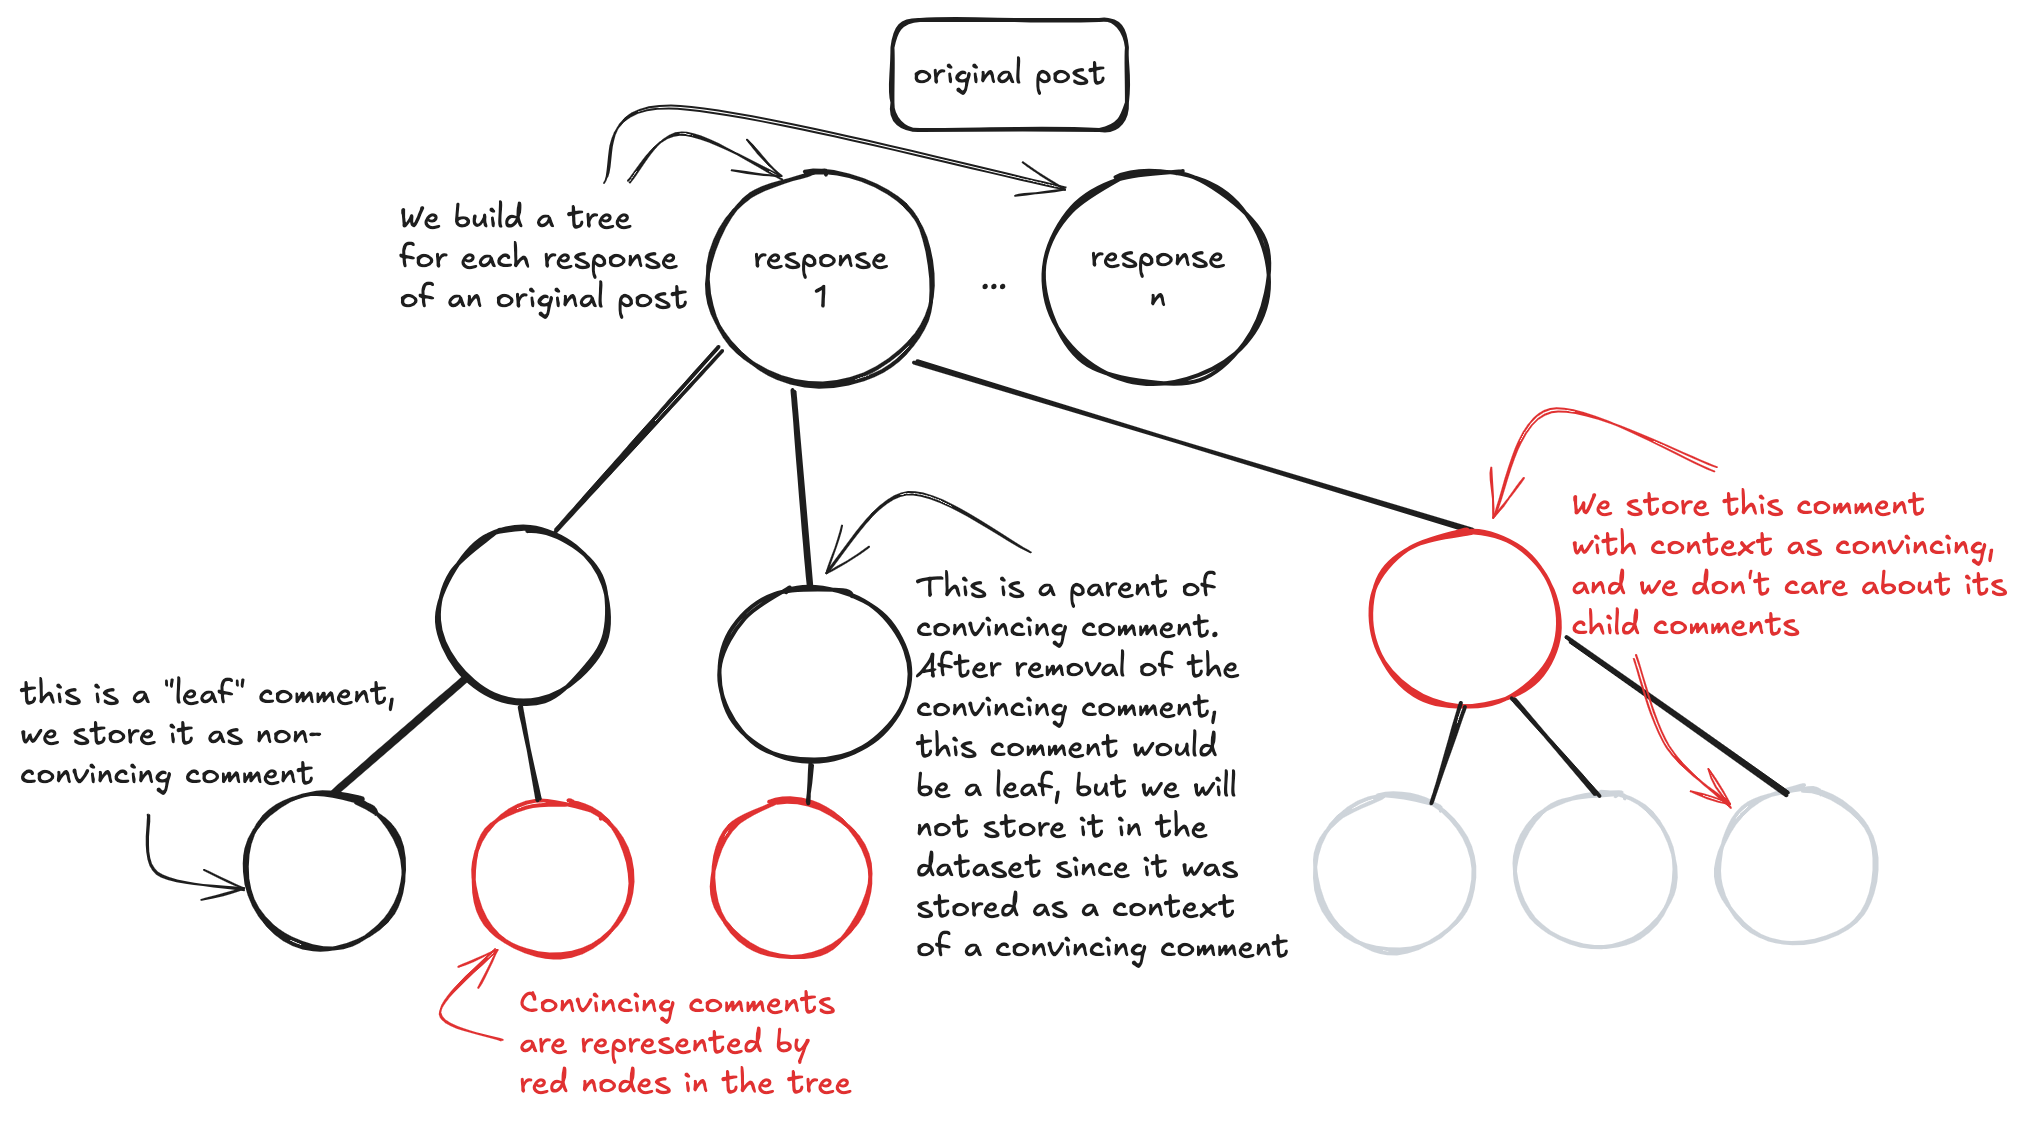

First, we will create the code to build the tree. As an example, we will work on an arbitrary row in the dataframe. Later we will use this code on all the rows in the df.

In [ ]:

def add_children(comment, all_comments):
    child_comments = [com for com in all_comments if com['parent_id_edited'] == comment['id']]
    if not child_comments:
        return

    for child_comment in child_comments:
      child_comment['children'] = []
      comment['children'].append(child_comment)
      add_children(child_comment, all_comments)

def build_comment_tree(comments, original_post_id):
    comment_map = {comment['id']: comment for comment in comments}
    tree = []

    for comment in comments:
        if comment['parent_id_edited'] == original_post_id:
            comment['children'] = []
            tree.append(comment)

    for comment in tree:
        add_children(comment, comments)

    return tree

# Example usage with the comments from the first thread in the dataframe
thread = df.iloc[0]['_comments']
for comment in thread:
    comment['parent_id_edited'] = comment['parent_id'].split('_')[1]

comment_tree = build_comment_tree(thread, df.iloc[0]['id'])
print(json.dumps(comment_tree, indent=2))


[
  {
    "_mod": null,
    "subreddit_id": "t5_2w2s8",
    "approved_at_utc": null,
    "ups": 1,
    "mod_reason_by": null,
    "banned_by": null,
    "removal_reason": null,
    "link_id": "t3_7usy79",
    "author_flair_type": "text",
    "author_flair_template_id": null,
    "likes": null,
    "no_follow": false,
    "user_reports": [],
    "saved": false,
    "id": "dtn63tp",
    "banned_at_utc": null,
    "mod_reason_title": null,
    "gilded": 0,
    "archived": true,
    "report_reasons": null,
    "author": "DeltaBot",
    "can_mod_post": false,
    "send_replies": true,
    "parent_id": "t3_7usy79",
    "score": 1,
    "approved_by": null,
    "downs": 0,
    "body": "/u/justmikewilldo (OP) has awarded 3 deltas in this post.\n\nAll comments that earned deltas (from OP or other users) are listed [**here**](/r/DeltaLog/comments/7uu885), in /r/DeltaLog.\n\nPlease note that a change of view [doesn't necessarily mean a reversal](https://www.reddit.com/r/changemyview/wiki/index#wik

The next step would be to travel the entire tree and find the convincing comments. For these comments we will:
1. add them to a data frame with the original post and the previous comments of the same author in the thread
2. mark their parent as parent_of_convincing = true
3. drop the comment from the tree

In [ ]:
import pandas as pd
import copy

separator_token = "[SEP]"

def add_new_row(current_comment, previous_comments, original_post, is_convincing, df):
  if not current_comment.get('author') or not current_comment.get('body'): # a deleted comment, we can't add it
    return
  convincing_comment_context = ""
  if previous_comments.get(current_comment['author']):
    convincing_comment_context = f"\n{separator_token}\n".join(previous_comments[current_comment['author']])

  new_row = {'original_post': original_post, 'thread_text': convincing_comment_context, 'final_comment': current_comment['body'], 'is_convincing': is_convincing, 'final_comment_id': current_comment['id']}
  df.loc[len(df)] = new_row

def add_convincing_comments(comment_tree, convincing_comments_df, original_post, parent_comment=None, comments_in_thread = {}):
    for comment in comment_tree:
        if comment.get('Delta', {}).get('count', 0) > 0:
            add_new_row(comment, comments_in_thread, original_post, 1, convincing_comments_df)

            if parent_comment:
                parent_comment['parent_of_convincing'] = True

            comment_tree.remove(comment)

        # If the comment was convincing, we ignore its children. Otherwise we continue recursively with the children:
        elif 'children' in comment and comment['children']:
            if not comment.get('author') or not comment.get('body'):
              continue
            if not comments_in_thread.get(comment['author']):
              comments_in_thread[comment['author']] = []
            comments_in_thread[comment['author']].append(comment['body'])

            add_convincing_comments(comment['children'], convincing_comments_df, original_post, comment, comments_in_thread)
            comments_in_thread[comment['author']].pop()

# Example usage:
row = df.iloc[4]

thread_comments = row['_comments']
for comment in thread_comments:
    comment['parent_id_edited'] = comment['parent_id'].split('_')[1]

comment_tree = build_comment_tree(thread_comments, row['id'])

convincing_comments_df = pd.DataFrame(columns=['original_post', 'thread_text', 'final_comment', 'is_convincing', 'final_comment_id']) # Initialize an empty DataFrame
add_convincing_comments(comment_tree, convincing_comments_df, row['selftext'])
# print(convincing_comments_df['final_comment_id'])

convincing_comments_df

original_post  \
0   Please do not downvote me, even if you resent ...   
1   Please do not downvote me, even if you resent ...   
2   Please do not downvote me, even if you resent ...   
3   Please do not downvote me, even if you resent ...   
4   Please do not downvote me, even if you resent ...   
5   Please do not downvote me, even if you resent ...   
6   Please do not downvote me, even if you resent ...   
7   Please do not downvote me, even if you resent ...   
8   Please do not downvote me, even if you resent ...   
9   Please do not downvote me, even if you resent ...   
10  Please do not downvote me, even if you resent ...   
11  Please do not downvote me, even if you resent ...   
12  Please do not downvote me, even if you resent ...   
13  Please do not downvote me, even if you resent ...   
14  Please do not downvote me, even if you resent ...   
15  Please do not downvote me, even if you resent ...   
16  Please do not downvote me, even if you resent ...   
17  Please do not downvote me, even if you resent ...   
18  Please do not downvote me, even if you resent ...   
19  Please do not downvote me, even if you resent ...   
20  Please do not downvote me, even if you resent ...   
21  Please do not downvote me, even if you resent ...   
22  Please do not downvote me, even if you resent ...   
23  Please do not downvote me, even if you resent ...   
24  Please do not downvote me, even if you resent ...   
25  Please do not downvote me, even if you resent ...   
26  Please do not downvote me, even if you resent ...   
27  Please do not downvote me, even if you resent ...   
28  Please do not downvote me, even if you resent ...   
29  Please do not downvote me, even if you resent ...   
30  Please do not downvote me, even if you resent ...   
31  Please do not downvote me, even if you resent ...   
32  Please do not downvote me, even if you resent ...   
33  Please do not downvote me, even if you resent ...   
34  Please do not downvote me, even if you resent ...   
35  Please do not downvote me, even if you resent ...   
36  Please do not downvote me, even if you resent ...   
37  Please do not downvote me, even if you resent ...   
38  Please do not downvote me, even if you resent ...   
39  Please do not downvote me, even if you resent ...   
40  Please do not downvote me, even if you resent ...   
41  Please do not downvote me, even if you resent ...   
42  Please do not downvote me, even if you resent ...   

                                          thread_text  \
0                                                       
1                                                       
2   Are humans not part of the universe? This very...   
3                                                       
4                                                       
5                                                       
6                                                       
7                                                       
8                                                       
9                                                       
10                                                      
11                                                      
12                                                      
13                                                      
14                                                      
15  All I can share is my personal experience.  I ...   
16                                                      
17                                                      
18                                                      
19                                                      
20                                                      
21                                                      
22                                                      
23                                                      
24                                                      
25                                               

In [ ]:
def add_non_convincing_comments(comment_tree, convincing_comments_df, original_post, comments_in_thread = {}):
    for comment in comment_tree:
      if not comment.get('author') or not comment.get('body'):
        continue

      if not comment.get('children'): # this is a leaf
        if not comment.get('parent_of_convincing') and not comment['author'] == 'DeltaBot':
          add_new_row(comment, comments_in_thread, original_post, 0, convincing_comments_df)
          # else ignore this leaf
        return


      # else, the comment has children

      if not comments_in_thread.get(comment['author']):
        comments_in_thread[comment['author']] = []
      comments_in_thread[comment['author']].append(comment['body'])

      add_non_convincing_comments(comment['children'], convincing_comments_df, original_post, comments_in_thread)
      comments_in_thread[comment['author']].pop()

# example usage, with the same tree that we craeted before and removed the convincing comments from:
add_non_convincing_comments(comment_tree, convincing_comments_df, row['selftext'])
convincing_comments_df

original_post  \
0   Please do not downvote me, even if you resent ...   
1   Please do not downvote me, even if you resent ...   
2   Please do not downvote me, even if you resent ...   
3   Please do not downvote me, even if you resent ...   
4   Please do not downvote me, even if you resent ...   
..                                                ...   
83  Let me start by explaining what I mean when I ...   
84  Let me start by explaining what I mean when I ...   
85  Let me start by explaining what I mean when I ...   
86  Let me start by explaining what I mean when I ...   
87  Let me start by explaining what I mean when I ...   

                                          thread_text  \
0                                                       
1                                                       
2   Are humans not part of the universe? This very...   
3                                                       
4                                                       
..                                                ...   
83  I think that there's an important distinction ...   
84  There's a difference between judgement and dis...   
85                                                      
86  I used to tell my kids never to judge a person...   
87                                                      

                                        final_comment  is_convincing  \
0   >Since I earned significant income in my attem...              1   
1   As a non religious individual I often consider...              1   
2   What I mean is - the universe can only be indi...              1   
3   While I'm not religious, I'm sympathetic to re...              1   
4   If you really want to challenge your views loo...              1   
..                                                ...            ...   
83  Yes, exactly.  Thank you for adding the resear...              0   
84  Yeah, the reason you have to use a hypothetica...              0   
85  In my opinion the phrase "don't judge" isn't a...              0   
86  My daughter is 15. She does not tolerate bully...              0   
87  I'm a believer that experience is the only tea...              0   

   final_comment_id  
0           e3lvd1e  
1           e3lrxbr  
2           e3lz4vz  
3           e3lurq9  
4           e3lvw0j  
..              ...  
83          dtnc340  
84          dtna38k  
85          dtnnvbf  
86          dtn8xi8  
87          dtn9ssa  

[88 rows x 5 columns]

In the above case, there were no leaves left.

Now we can execute this logic on all the rows, and create the final dataframe.

The final change here, is to add the post title to the original post field:

In [ ]:
comments_df = pd.DataFrame(columns=['original_post', 'thread_text', 'final_comment', 'is_convincing', 'final_comment_id']) # Initialize an empty DataFrame


# Loop through all rows in the DataFrame 'df'
for index, row in df.iterrows():
    thread_comments = row['_comments']
    for comment in thread_comments:
        comment['parent_id_edited'] = comment['parent_id'].split('_')[1]

    comment_tree = build_comment_tree(thread_comments, row['id'])

    original_post = str(row['title']) + "\n" + str(row['selftext'])

    add_convincing_comments(comment_tree, comments_df, original_post)
    add_non_convincing_comments(comment_tree, comments_df, original_post)

comments_df.head(10)


original_post  \
0  CMV: Instead of teaching youth to "not judge" ...   
1  CMV: Instead of teaching youth to "not judge" ...   
2  CMV: Instead of teaching youth to "not judge" ...   
3  CMV: Instead of teaching youth to "not judge" ...   
4  CMV: Instead of teaching youth to "not judge" ...   
5  CMV: Instead of teaching youth to "not judge" ...   
6  CMV: Instead of teaching youth to "not judge" ...   
7  CMV: Instead of teaching youth to "not judge" ...   
8  CMV: Instead of teaching youth to "not judge" ...   
9  CMV: Instead of teaching youth to "not judge" ...   

                                         thread_text  \
0                                                      
1                                                      
2  I am not trying to change your view because it...   
3  What do you mean by having your self-esteem wr...   
4  The human brain is explicitly evolved to judge...   
5                                                      
6                                                      
7  I agree that judging positively is better than...   
8  I have a son that’s 6 going on 7, and my wife ...   
9  There's a concept in psychology called [Fundam...   

                                       final_comment  is_convincing  \
0  I agree with mercy. But sometimes mercy can ro...              0   
1  I’m also an early childhood educator and came ...              0   
2  I would try to use the most Neutral vocabulary...              0   
3  And thank you, surprisingly kind and reasonabl...              0   
4  Agreed... this is how we live, how our species...              0   
5  I think that their point is probably that you ...              0   
6  Honestly the phrase “don’t judge” is really me...              0   
7  Disclaimer that I'm neither a parent nor do I ...              0   
8  Yeah the principles we use are vague on purpos...              0   
9  We have the capacity to make judgements about ...              0   

  final_comment_id  
0          dtni266  
1          dtnii0t  
2          dtr7sbi  
3          dtvacj0  
4          dtrsop3  
5          dtndrgc  
6          dtnvjtm  
7          dtn71uk  
8          dtnbt4r  
9          dtnc9hv

In [ ]:
print("Size of the DataFrame:", comments_df.shape)
print("Number of entries with is_convincing = 1:", comments_df[comments_df['is_convincing'] == 1].shape[0])
print("Number of entries with is_convincing = 0:", comments_df[comments_df['is_convincing'] == 0].shape[0])


Size of the DataFrame: (4089, 5)
Number of entries with is_convincing = 1: 608
Number of entries with is_convincing = 0: 3481


Below is an example of a single row.
We seperated thared_text (all the comments of the same author before the current comment), and final_comment (the current comment).

This way, when we create the features, we can decide for each feature whether to use the entire thread or just the comment itself.

In [ ]:
print("*** The original post: ***")
print(comments_df.iloc[8]['original_post'])
print("-------------------------------")

print("*** The thread text: ***")
print(comments_df.iloc[8]['thread_text'])
print("-------------------------------")

print("*** The final comment: ***")
print(comments_df.iloc[8]['final_comment'])


*** The original post: ***
CMV: Instead of teaching youth to "not judge" we should be teaching them *how* to judge with kindness, mercy, logic, and fairness.
Let me start by explaining what I mean when I say judge in this context. 

I am a father of a 5 year old girl and as anyone who's spent a lot of time with babies and young children, I want to help guide her through life and give her the tools to interpret the world around her. 

When we see a child behaving very poorly in public there are times when I choose to speak with her about what's happening. At the onset of this moment, when we are going to voice our thoughts about the behavior of others, whether it's my daughter and I, you by yourself in your head, or anyone in really any circumstance, we are entering a judgmental space by it's literal definition. 

Any way to frame, or speak about some else's actions requires judgments to be made. Our society has made the word 'judgmental' have strong negative connotations, and I believe

Finally, let's create a "clean" version of the text fields:

In [ ]:
import re

def clean_text(text):
  text = str(text)
  # Remove single digits
  text = re.sub(r'\b\d\b', '', text)
  # Remove punctuation characters
  text = re.sub(r'[^\w\s]', '', text)
  # Remove single letters
  text = re.sub(r'\b[a-zA-Z]\b', '', text)
  # Remove URLs:
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  return text

comments_df['cleaned_final_comment'] = comments_df['final_comment'].apply(clean_text)
comments_df['cleaned_thread_text'] = comments_df['thread_text'].apply(clean_text)
comments_df['cleaned_original_post'] = comments_df['original_post'].apply(clean_text)


# ５. Inspecting the Comments DataSet

## 5.1 Words Frequency

Let's see what are the common words in convincing and not-convincing comments:

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Function to clean text and count words
def get_most_common_words(thread_texts, final_comments, n=20):
    text = " ".join(final_comments)
    # text = " ".join(thread_texts) + " ".join(final_comments)
    words = text.lower().translate(str.maketrans("", "", string.punctuation)).split()
    words = [word for word in words if word not in stop_words]
    # remove single digits, punctuation charcters and single letters:

    return Counter(words).most_common(n)

# Most common words in persuasive arguments
convincing = comments_df[comments_df["is_convincing"] == 1]
persuasive_words = get_most_common_words(convincing['cleaned_thread_text'], convincing["cleaned_final_comment"])
print("Most common words in persuasive arguments:", persuasive_words)

# Most common words in unconvincing arguments
not_convincing = comments_df[comments_df["is_convincing"] == 0]
unconvincing_words = get_most_common_words(not_convincing['cleaned_thread_text'], not_convincing["cleaned_final_comment"])
print("Most common words in unconvincing arguments:", unconvincing_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Most common words in persuasive arguments: [('people', 956), ('would', 548), ('like', 468), ('dont', 449), ('think', 424), ('one', 370), ('even', 307), ('get', 286), ('also', 257), ('us', 254), ('want', 246), ('make', 241), ('way', 240), ('time', 226), ('things', 224), ('im', 216), ('much', 209), ('say', 206), ('many', 201), ('really', 192)]
Most common words in unconvincing arguments: [('people', 1836), ('would', 1268), ('dont', 990), ('think', 950), ('like', 928), ('one', 738), ('even', 617), ('im', 596), ('get', 570), ('also', 568), ('make', 527), ('way', 515), ('thats', 501), ('time', 499), ('much', 473), ('could', 458), ('want', 435), ('youre', 433), ('know', 432), ('say', 431)]


We see that in both convincing and unconvincing comments the most common words list is very similar, so it does not provide any meaningful insights.

## 5.2 TF-IDF


TF-IDF or Word2Vec to compare persuasive vs. unconvincing arguments.

In [ ]:
def get_comment_and_thread(comment_first=False, is_convincing=None, include_sep=True):
  if is_convincing is not None:
    df = comments_df[comments_df["is_convincing"] == is_convincing]
  else:
    df = comments_df

  if include_sep:
    sep = "\n" + separator_token + "\n"
  else:
    sep = "\n"

  if comment_first:
    return df['final_comment'] + sep + df['thread_text'].fillna("")

  return df['thread_text'].fillna("") + sep + df['final_comment']

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_tfidf_words(texts, top_n=10):
    """Compute TF-IDF and return the top N words with highest scores."""
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()

    # Compute the max TF-IDF score for each word across all documents
    max_tfidf_scores = np.max(tfidf_matrix.toarray(), axis=0)

    # Get indices of the top N words
    top_indices = np.argsort(max_tfidf_scores)[::-1][:top_n]

    # Retrieve the words and their scores
    top_words = [(feature_names[i], max_tfidf_scores[i]) for i in top_indices]
    return top_words



top_words_all = get_top_tfidf_words(get_comment_and_thread(include_sep=False))  # we don't want the separator to be included in the tf-idf calculation
print("Top 10 words in the entire dataset:", top_words_all)

convincing_texts = get_comment_and_thread(is_convincing=1, include_sep=False)
top_words_convincing = get_top_tfidf_words(convincing_texts)
print("\nTop 10 words in convincing comments:", top_words_convincing)

non_convincing_texts = get_comment_and_thread(is_convincing=0, include_sep=False)
top_words_non_convincing = get_top_tfidf_words(non_convincing_texts)
print("\nTop 10 words in non-convincing comments:", top_words_non_convincing)


Top 10 words in the entire dataset: [('yes', 1.0), ('source', 1.0), ('delta', 1.0), ('good', 1.0), ('right', 1.0), ('agree', 1.0), ('blank', 1.0), ('suspiciouslyspecific', 1.0), ('asdf', 1.0), ('themonkeyspaw', 1.0)]

Top 10 words in convincing comments: [('asdf', 1.0), ('la', 0.7894809548431257), ('chugga', 0.760141650688345), ('organizers', 0.7071067811865475), ('reenactment', 0.7071067811865475), ('dog', 0.6796250194294114), ('lunatic', 0.6624646560866791), ('disney', 0.662462911132612), ('offended', 0.6604775191630127), ('culture', 0.654253382664108)]

Top 10 words in non-convincing comments: [('blank', 1.0), ('delta', 1.0), ('themonkeyspaw', 1.0), ('agree', 1.0), ('good', 1.0), ('logistics', 1.0), ('suspiciouslyspecific', 1.0), ('source', 1.0), ('yes', 1.0), ('right', 1.0)]


We can see that the results are not very meaningful. It makes sense that the list of high-score TF-IDF does not provide much insight, because this forum includes posts in various subjects and for each subject probably different words are used.

We hoped to see some words that may be used in multiple convincing examples, but we see that it is not the case.


We do see that the word asdf, which is a word without meaning, got TF-IDF score of 1, let's check where it appears:



In [ ]:
import pandas as pd

def find_examples(df, word, num_examples=3):
    examples = []
    for index, row in df.iterrows():
        if word in str(row['thread_text']).lower().split(' ') or word in str(row['final_comment']).lower().split(' '):
            examples.append(index)
            if len(examples) == num_examples:
                break
    return comments_df.iloc[examples]


find_examples(comments_df, "asdf")


original_post thread_text  \
3841  CMV: Technical writing should be a core part o...         NaN   

     final_comment  is_convincing final_comment_id cleaned_final_comment  \
3841          asdf              1          e92m6mk                  asdf   

     cleaned_thread_text                              cleaned_original_post  \
3841                 NaN  CMV Technical writing should be  core part of ...   

      sentiment                                               tone  
3841        0.0  [{'label': 'neutral', 'score': 0.9077216386795...

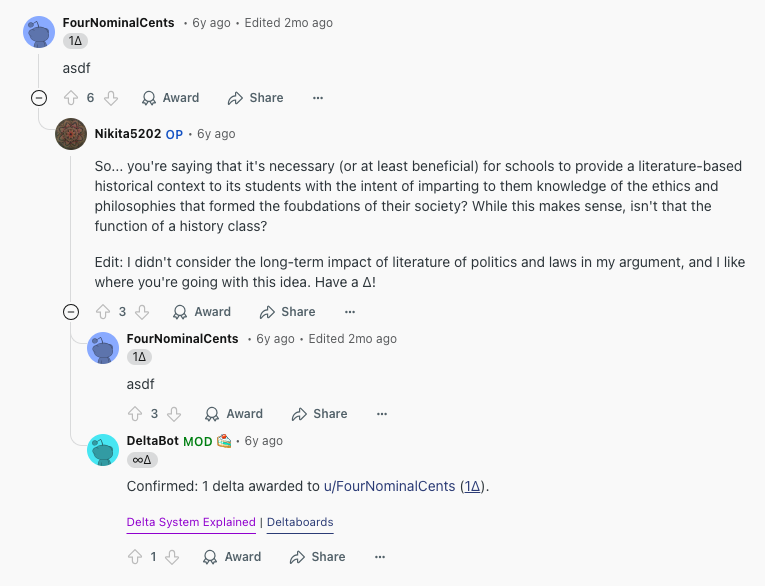

The comment is marked as "convincing", however, it has no meaning. We see that the comment was awarded a delta 6 years ago, and was edited 2 months ago, so the author probably removed a more-meaningful text. This comment has no value for us, and it may interfer the model later, so we will remove it from the dataframe.



In [ ]:
comments_df = comments_df.drop(index=3841)


# ６. Feature engineering


We would like to find the characteristics of convincing arguments. We will create several features that can be helpful in identifying a convincing argument, and the new features can later be used in a predictive model.

## 6.1 Sentiment Analysis

Check whether sentiment (positive/negative tone) correlates with persuasiveness

### TextBlob

In [ ]:
# prompt: take the column comments_df['thread_text'] and the column comments_df['final_comment'] and return a new list / column in which each thread is concatenated to the appropriate final comment with a space in between them

def concatenate_columns(df):
  """
  Concatenates 'thread_text' and 'final_comment' columns with a space in between.

  Args:
    df: pandas DataFrame with 'thread_text' and 'final_comment' columns.

  Returns:
    A new column named 'concatenated_text' with the concatenated text.
    Returns the original DataFrame if either column is missing.
  """
  if not all(col in df.columns for col in ['thread_text', 'final_comment']):
    print("Error: 'thread_text' or 'final_comment' column not found in DataFrame.")
    return df

  df['concatenated_text'] = df['thread_text'] + "\n" + separator_token + "\n" + df['final_comment']
  return df

# Example usage (assuming 'comments_df' is your DataFrame):
# comments_df = concatenate_columns(comments_df)
# print(comments_df.head())


In [ ]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Range: -1 (negative) to +1 (positive)

comments_df["sentiment"] = (comments_df['thread_text'] + "\n" + separator_token + "\n" + comments_df['final_comment']).apply(get_sentiment)

comments_df.describe()

is_convincing    sentiment
count    4089.000000  4089.000000
mean        0.148692     0.089395
std         0.355828     0.175789
min         0.000000    -1.000000
25%         0.000000     0.000000
50%         0.000000     0.085894
75%         0.000000     0.173772
max         1.000000     1.000000

In [ ]:
def plot_feature(feature_name, feature_disp_name, bin_width, width = 0.4, figsize=(12, 6)):
  import matplotlib.pyplot as plt

  min_val = comments_df[feature_name].min()
  max_val = comments_df[feature_name].max()

  bins = [min_val + i * bin_width for i in range(int((max_val - min_val) / bin_width) + 2)]

  # Count convincing and non-convincing comments in each bin
  convincing_counts = []
  non_convincing_counts = []
  bin_labels = []

  for i in range(len(bins) - 1):
      lower_bound = bins[i]
      upper_bound = bins[i+1]
      bin_comments = comments_df[(comments_df[feature_name] >= lower_bound) & (comments_df[feature_name] < upper_bound)]
      convincing_count = bin_comments[bin_comments['is_convincing'] == 1].shape[0]
      non_convincing_count = bin_comments[bin_comments['is_convincing'] == 0].shape[0]
      convincing_counts.append(convincing_count)
      non_convincing_counts.append(non_convincing_count)
      bin_labels.append(f'{lower_bound:.2f}-{upper_bound:.2f}')


  # Plotting the histogram
  x = range(len(bin_labels))

  fig, ax = plt.subplots(figsize=figsize)
  rects1 = ax.bar([i - width/2 for i in x], convincing_counts, width, label='Convincing', color='green')
  rects2 = ax.bar([i + width/2 for i in x], non_convincing_counts, width, label='Non-Convincing', color='red')

  # Add labels to the bars
  def autolabel(rects):
      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')

  autolabel(rects1)
  autolabel(rects2)


  ax.set_xlabel(f'{feature_disp_name} Bin')
  ax.set_ylabel('Number of Comments')
  ax.set_title(f'Number of Convincing and Non-Convincing Comments per {feature_disp_name} Bin')
  ax.set_xticks(x)
  ax.set_xticklabels(bin_labels)
  ax.legend()
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.tight_layout()
  plt.show()

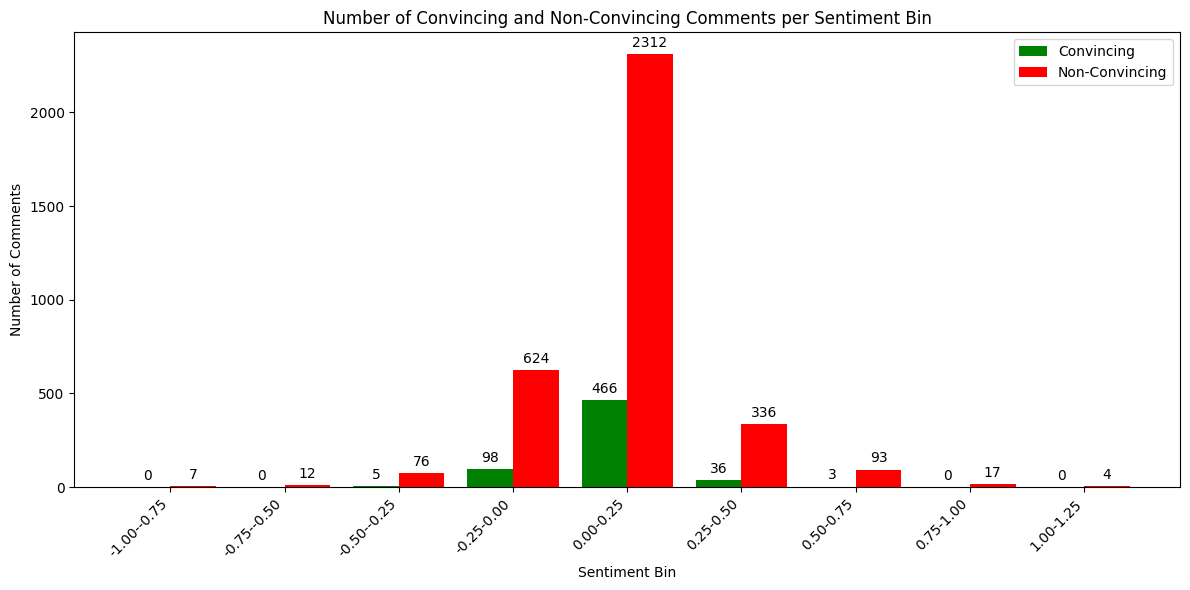

In [ ]:
plot_feature('sentiment', 'Sentiment', 0.25)

In [ ]:
def show_example_comments():
  # Find 3 comments with minimal sentiment
  min_sentiment_comments = comments_df.nsmallest(3, 'sentiment')
  for index, row in min_sentiment_comments.iterrows():
      print(f"Minimal Sentiment Comment (Sentiment: {row['sentiment']:.2f}):")
      print(f"  Thread Text: {row['thread_text']}")
      print(f"  Final Comment: {row['final_comment']}")
      print("-" * 20)

  # Find 3 comments with maximal sentiment
  max_sentiment_comments = comments_df.nlargest(3, 'sentiment')
  for index, row in max_sentiment_comments.iterrows():
      print(f"Maximal Sentiment Comment (Sentiment: {row['sentiment']:.2f}):")
      print(f"  Thread Text: {row['thread_text']}")
      print(f"  Final Comment: {row['final_comment']}")
      print("-" * 20)

In [ ]:
show_example_comments()

Minimal Sentiment Comment (Sentiment: -1.00):
  Thread Text: 
  Final Comment: If noone can decide what is evil then there's nothing evil about schadenfreude
--------------------
Minimal Sentiment Comment (Sentiment: -1.00):
  Thread Text: 
  Final Comment: You're looking for r/TrueUnpopularOpinion. Some shocking opinions, but that's the nature of the beast.
--------------------
Minimal Sentiment Comment (Sentiment: -1.00):
  Thread Text: 
  Final Comment: Thats probably the worst example ever
--------------------
Maximal Sentiment Comment (Sentiment: 1.00):
  Thread Text: 
  Final Comment: I wouldn’t have thought of that, but I feel it captures the sentiment perfectly.
--------------------
Maximal Sentiment Comment (Sentiment: 1.00):
  Thread Text: What would be the alternative?  An anarchosyndicalist commune, with someone taking turns to act as a sort of executive officer of the week?  


  Final Comment: > What would be the alternative? An anarchosyndicalist commune, with someone ta

The TextBlob way of identifying the sentiment is based on scoring each word in the text and taking the average score. This approach is less suitable for texts as long as ours. As we can see in the example texts, the sentiment is not identified very well, so we will try a more sophisticated approach, the VADER module.

### VADER module

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.9 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

In [ ]:
comments_df["sentiment"] = (comments_df['thread_text'].fillna("") + "\n" + separator_token + "\n" + comments_df['final_comment']).apply(get_sentiment)

comments_df.describe()

is_convincing    sentiment
count    4089.000000  4089.000000
mean        0.148692     0.139704
std         0.355828     0.689100
min         0.000000    -0.999900
25%         0.000000    -0.504000
50%         0.000000     0.226300
75%         0.000000     0.821100
max         1.000000     0.999700

In [ ]:
show_example_comments()

Minimal Sentiment Comment (Sentiment: -1.00):
  Thread Text: Just wanted to chime in with a tiny part. If your living conditions weren't great, or even good, that doesn't give you the right to take it out on people.

I'm a child of war and as shocking that may sound to someone - it gives zero free passing in court. Having PTSD from it is a different thing, but even in cases where someone with PTSD commits a crime he's still held accountable.

Living in a war zone as a child does affect you, but it's not a free pass for being an ass.
[SEP]
He wasn't just *"walking around angry"*.

He had a bat. 

He waited to *be attacked*.

He was ready to ~~hurt~~ kill *any black man* for something one (maybe!) did.

He did it for a *whole week*.


That's really calculated and not something irrational he did while angry. He was making sure that *when* he kills **random black person** it will be said persons fault and LN would play it as self defence. 

Growing up in a war zone does fuck you up, but th

Here we see better classification of sentiment. The negative examples include rude language while the positive examples demonstrate a pleasent style.

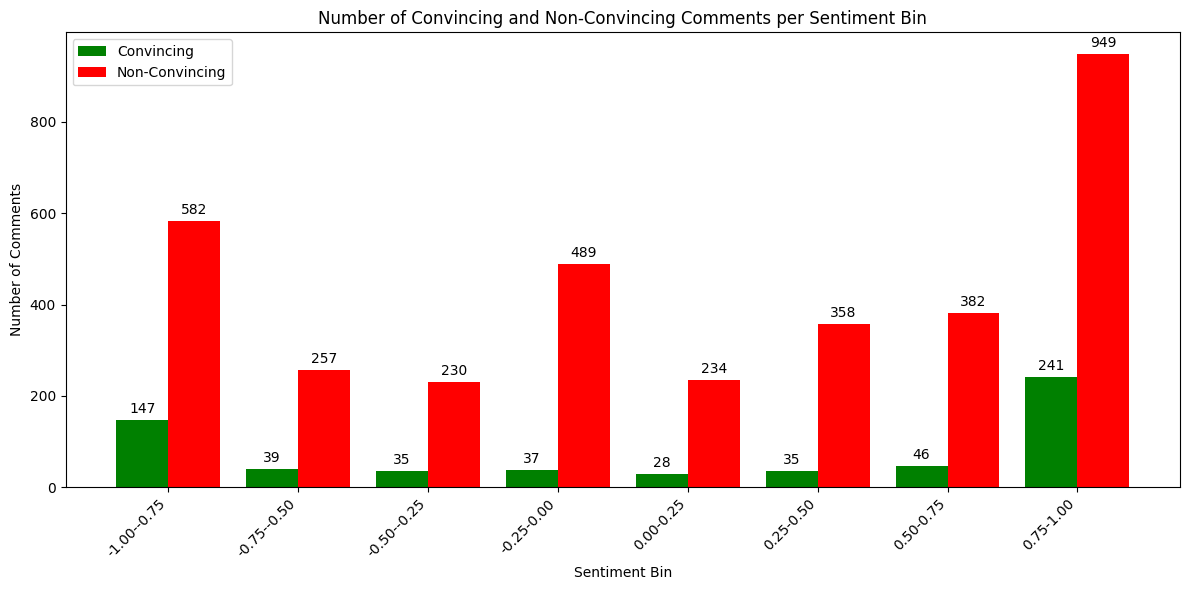

In [ ]:
plot_feature('sentiment', 'Sentiment', 0.25)

We see that most of the convincing comments are either very positive or very negative, while a less extreme sentiment resulted smaller amount of convincing comments.

As for the non-convincing comments, we see that althogh most of the comments were very positive, they were not convincing, which may be counter-intuitive.

Generally speaking, it doesn't see that there is a direct connection between the sentiment and the comment being convincing or not. Nonetheless, we can use the sentiment as a feature to our model.

## 6.2 Tone
We would like to create a feature for the tone of the text. The tone can be, for example, logical, passionate, humorous etc.
We will try a pre-trained model based on RoBERTa.

### RoBERTa based model

In [ ]:
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

def get_tone(text):
    return classifier(text, truncation=True, padding=True)  # since our texts may be long and Roberta is limited to 512 tokens, we truncate any excessive text

text = get_comment_and_thread(comment_first=True) # the text may be truncated so we put the convincing comment first - it's more important
comments_df["tone"] = text.apply(get_tone)


Device set to use cpu


In [ ]:
print(comments_df['tone'])


0       [{'label': 'neutral', 'score': 0.8615567088127...
1       [{'label': 'anger', 'score': 0.8864083886146545}]
2       [{'label': 'neutral', 'score': 0.6452071666717...
3        [{'label': 'fear', 'score': 0.5824066400527954}]
4       [{'label': 'neutral', 'score': 0.8495560884475...
                              ...                        
4084     [{'label': 'fear', 'score': 0.6567506194114685}]
4085    [{'label': 'neutral', 'score': 0.9447934031486...
4086      [{'label': 'joy', 'score': 0.2893628180027008}]
4087    [{'label': 'neutral', 'score': 0.9226306080818...
4088    [{'label': 'neutral', 'score': 0.5850099325180...
Name: tone, Length: 4089, dtype: object


In [ ]:
print(comments_df['tone'][0])

[{'label': 'neutral', 'score': 0.8615567088127136}]


In [ ]:
comments_df['tone_label'] = comments_df['tone'].apply(lambda x: x[0]['label'] if isinstance(x, list) and len(x) > 0 else None)

In [ ]:
comments_df['tone_label']

0       neutral
1         anger
2       neutral
3          fear
4       neutral
         ...   
4084       fear
4085    neutral
4086        joy
4087    neutral
4088    neutral
Name: tone_label, Length: 4089, dtype: object

In [ ]:
import matplotlib.pyplot as plt

def plot_category_histogram(df, column_name, display_name):
    """
    Plots a histogram showing the distribution of convincing and non-convincing comments for each category in the specified column.

    Args:
        df: The pandas DataFrame containing the data.
        column_name: The name of the column containing the categories.
    """

    convincing_counts = df[df['is_convincing'] == 1][column_name].value_counts()
    non_convincing_counts = df[df['is_convincing'] == 0][column_name].value_counts()

    categories = convincing_counts.index.union(non_convincing_counts.index)
    convincing_counts = convincing_counts.reindex(categories, fill_value=0)
    non_convincing_counts = non_convincing_counts.reindex(categories, fill_value=0)

    width = 0.4
    x = range(len(categories))
    fig, ax = plt.subplots(figsize=(12,6))
    rects1 = ax.bar([i - width/2 for i in x], convincing_counts, width, label='Convincing', color='green')
    rects2 = ax.bar([i + width/2 for i in x], non_convincing_counts, width, label='Non-Convincing', color='red')

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)

    ax.set_xlabel(display_name)
    ax.set_ylabel('Number of Comments')
    ax.set_title(f'Number of Convincing and Non-Convincing Comments per {display_name}')
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


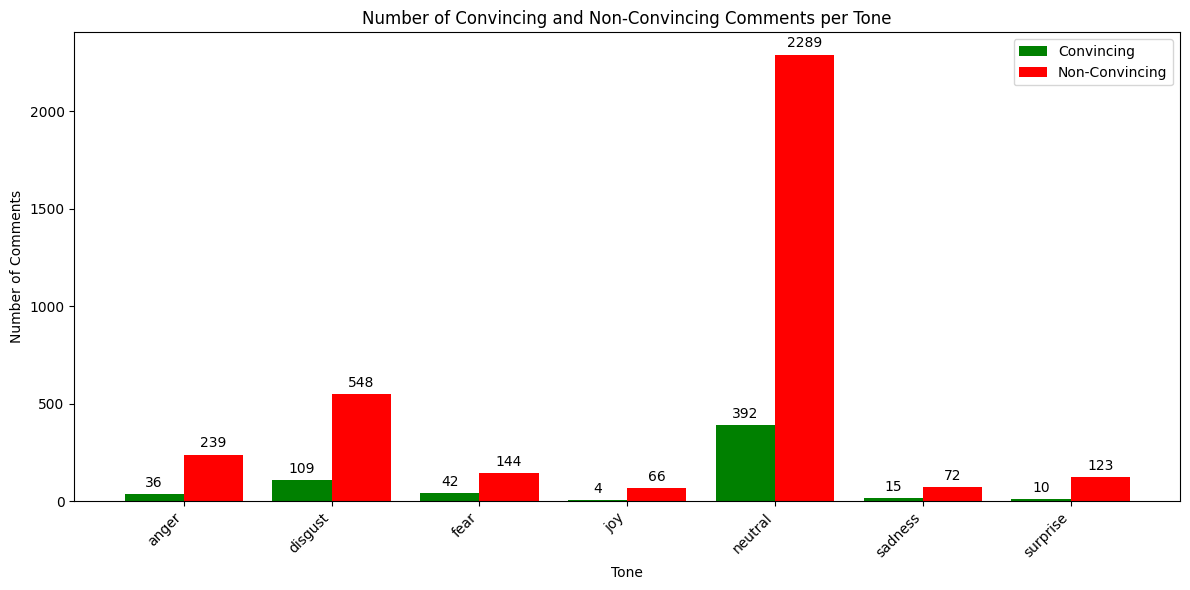

In [ ]:
plot_category_histogram(comments_df, 'tone_label', 'Tone')


In [ ]:
def show_tone_examples(tone_label):
  for index, row in comments_df[comments_df['tone'].apply(lambda x: isinstance(x, list) and len(x) > 0 and x[0]['label'] == tone_label and x[0]['score'] > 0.85)].iterrows():
    print(f"Example for {tone_label}:")
    print(row['final_comment'])
    print("-" * 20)
    break

In [ ]:
show_tone_examples("fear")
show_tone_examples("joy")
show_tone_examples("surprise")


Example for fear:
Im not really here to convince you that god exists but i will say diamonds are made through preassure i could never imagine what your situation feels like but just remember that almost every great person whether in history or just in everday life had to overcome something absolutely horrible this is not the end of the story just a roadblock and just remember that if you manage to overcome this situation you which is absolutely possible you will undoubtedly become someones who has transcended modern day suffering
--------------------
Example for joy:
At the very least I have learnt something new, and posetive, about candidate im not a big fan of. Thanks, it makes me a bit more hopeful
--------------------
Example for surprise:
Same here. Which honestly I think is kind of funny since everyone is willing to put down antivaxxers for all the damages they cause by not vaccinating their kids. It seems a little strange that there isn't some massive proof that their children a

We are not very satisfied with the results of classification, it seems that the classification is not very accurate and we want to try a different approach, using Google AI Studio.

### Google's Gemini

In [ ]:
!pip install -q langchain langchain-openai langchain-core langchain-google-vertexai langchain-openai pydantic
!pip install google-cloud
!pip install google-cloud-aiplatform
!pip install python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.1 MB/s eta 0:00:00


In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/drive/MyDrive/תואר שני/שנה ב סמסטר א/כריית טקסטים/פרויקט סיום/gen-lang-client-0273205429-e512953a3e5e.json"

from pathlib import Path
# The .env file contains the 'GEMINI_API_KEY' environment variable
dotenv_path = Path("/content/drive/MyDrive/תואר שני/שנה ב סמסטר א/כריית טקסטים/פרויקט סיום/.env")

from dotenv import load_dotenv
load_dotenv(dotenv_path)


True

In [ ]:
from google.cloud import aiplatform

aiplatform.init(project='gen-lang-client-0273205429', location='us-central1')

from langchain_google_vertexai import VertexAI,ChatVertexAI
llm_gemini = ChatVertexAI(
    model_name="gemini-1.5-flash-002",
)

In [ ]:
# let's try with an example text taken randomly from our data set:
test_text = comments_df.iloc[95]['final_comment']
test_text

'Im not really here to convince you that god exists but i will say diamonds are made through preassure i could never imagine what your situation feels like but just remember that almost every great person whether in history or just in everday life had to overcome something absolutely horrible this is not the end of the story just a roadblock and just remember that if you manage to overcome this situation you which is absolutely possible you will undoubtedly become someones who has transcended modern day suffering'

In [ ]:
user_prompt_prefix = """Analyze the tone of the following text and classify it as one of the following: Logical, Passionate, Humorous, Sarcastic, Neutral, or Other.
Your answer should be just a single word, which is the tone.
Text:
"""

In [ ]:
user_prompt = user_prompt_prefix + test_text

response = llm_gemini.invoke(user_prompt)
classification = response.content.strip()
print(classification)

Passionate


In [ ]:
comments_df['tone_google'] = None

In [ ]:
def get_tone_from_google_ai(row):
  if isinstance(row['thread_text'], str):
    text = row['thread_text'] + "\n" + row['final_comment']
  else:
    text = row['final_comment']

  user_prompt = user_prompt_prefix + text
  response = llm_gemini.invoke(user_prompt)
  classification = response.content.strip()
  print(f"row {row.name} classified as {classification}")
  return classification

In [ ]:
import time

counter = 0
# this loop can be executed multiple times until all entries were classified
for index, row in comments_df.iterrows():
  if counter == 5:
    time.sleep(3)  # add some sleep so we don't get out of quota
    counter = 0
  if pd.isna(row['tone_google']):  # calculate only if wasn't calculated yet
      comments_df.at[index, 'tone_google'] = get_tone_from_google_ai(row)
      counter += 1

row 1772 classified as Logical
row 1773 classified as Logical
row 1774 classified as Passionate
row 1775 classified as Logical
row 1776 classified as Logical
row 1777 classified as Passionate
row 1778 classified as Logical
row 1779 classified as Logical
row 1780 classified as Neutral
row 1781 classified as Logical
row 1782 classified as Logical
row 1783 classified as Logical
row 1784 classified as Logical
row 1785 classified as Logical
row 1786 classified as Logical
row 1787 classified as Logical
row 1788 classified as Logical
row 1789 classified as Logical
row 1790 classified as Neutral
row 1791 classified as Neutral
row 1792 classified as Logical
row 1793 classified as Logical
row 1794 classified as Neutral
row 1795 classified as Neutral
row 1796 classified as Logical
row 1797 classified as Logical
row 1798 classified as Logical
row 1799 classified as Logical
row 1800 classified as Logical
row 1801 classified as Logical
row 1802 classified as Neutral
row 1803 classified as Sarcastic


row 1809 classified as Neutral
row 1810 classified as Neutral
row 1811 classified as Passionate
row 1812 classified as Humorous
row 1813 classified as Humorous
row 1814 classified as Sarcastic
row 1815 classified as Logical
row 1816 classified as Sarcastic
row 1817 classified as Passionate
row 1818 classified as Passionate
row 1819 classified as Passionate
row 1820 classified as Logical
row 1821 classified as Logical
row 1822 classified as Logical
row 1823 classified as Logical
row 1824 classified as Logical
row 1825 classified as Passionate
row 1826 classified as Logical
row 1827 classified as Logical
row 1828 classified as Logical
row 1829 classified as Logical
row 1830 classified as Neutral
row 1831 classified as Logical
row 1832 classified as Logical
row 1833 classified as Neutral
row 1834 classified as Logical


row 1835 classified as Sarcastic


row 1836 classified as Logical
row 1837 classified as Logical
row 1838 classified as Logical
row 1839 classified as Logical
row 1840 classified as Logical
row 1841 classified as Logical
row 1842 classified as Logical
row 1843 classified as Sarcastic
row 1844 classified as Logical
row 1845 classified as Logical
row 1846 classified as Neutral


row 1847 classified as Neutral


row 1848 classified as Sarcastic
row 1849 classified as Logical
row 1850 classified as Sarcastic
row 1851 classified as Neutral
row 1852 classified as Neutral
row 1853 classified as Logical
row 1854 classified as Logical
row 1855 classified as Neutral
row 1856 classified as Neutral
row 1857 classified as Neutral
row 1858 classified as Logical
row 1859 classified as Logical
row 1860 classified as Logical
row 1861 classified as Logical
row 1862 classified as Logical
row 1863 classified as Logical
row 1864 classified as Neutral
row 1865 classified as Logical
row 1866 classified as Neutral
row 1867 classified as Logical
row 1868 classified as Passionate
row 1869 classified as Humorous
row 1870 classified as Passionate
row 1871 classified as Neutral
row 1872 classified as Sarcastic
row 1873 classified as Logical


row 1874 classified as Logical
row 1875 classified as Logical
row 1876 classified as Logical
row 1877 classified as Neutral
row 1878 classified as Passionate
row 1879 classified as Neutral
row 1880 classified as Passionate
row 1881 classified as Logical
row 1882 classified as Neutral
row 1883 classified as Passionate
row 1884 classified as Passionate


row 1885 classified as Neutral
row 1886 classified as Sarcastic
row 1887 classified as Logical
row 1888 classified as Logical
row 1889 classified as Logical
row 1890 classified as Logical
row 1891 classified as Logical
row 1892 classified as Logical
row 1893 classified as Logical
row 1894 classified as Logical
row 1895 classified as Logical
row 1896 classified as Logical
row 1897 classified as Logical
row 1898 classified as Logical
row 1899 classified as Logical
row 1900 classified as Logical
row 1901 classified as Logical
row 1902 classified as Logical
row 1903 classified as Logical
row 1904 classified as Logical
row 1905 classified as Logical
row 1906 classified as Logical
row 1907 classified as Logical
row 1908 classified as Neutral
row 1909 classified as Logical
row 1910 classified as Logical
row 1911 classified as Logical


row 1912 classified as Logical
row 1913 classified as Logical
row 1914 classified as Neutral
row 1915 classified as Logical
row 1916 classified as Logical
row 1917 classified as Appreciative
row 1918 classified as Sarcastic
row 1919 classified as Logical
row 1920 classified as Logical
row 1921 classified as Logical
row 1922 classified as Logical
row 1923 classified as Logical
row 1924 classified as Logical
row 1925 classified as Sarcastic
row 1926 classified as Logical
row 1927 classified as Logical
row 1928 classified as Logical
row 1929 classified as Logical
row 1930 classified as Logical
row 1931 classified as Logical
row 1932 classified as Logical
row 1933 classified as Logical
row 1934 classified as Logical
row 1935 classified as Logical
row 1936 classified as Neutral
row 1937 classified as Logical
row 1938 classified as Passionate
row 1939 classified as Neutral
row 1940 classified as Logical
row 1941 classified as Logical
row 1942 classified as Logical
row 1943 classified as Logi

row 1950 classified as Logical
row 1951 classified as Logical
row 1952 classified as Neutral
row 1953 classified as Neutral
row 1954 classified as Logical
row 1955 classified as Sarcastic
row 1956 classified as Logical
row 1957 classified as Logical
row 1958 classified as Logical
row 1959 classified as Neutral
row 1960 classified as Logical
row 1961 classified as Neutral
row 1962 classified as Sarcastic
row 1963 classified as Logical
row 1964 classified as Logical
row 1965 classified as Logical
row 1966 classified as Neutral
row 1967 classified as Sarcastic
row 1968 classified as Neutral
row 1969 classified as Sarcastic
row 1970 classified as Passionate
row 1971 classified as Passionate
row 1972 classified as Passionate
row 1973 classified as Passionate
row 1974 classified as Logical
row 1975 classified as Passionate
row 1976 classified as Neutral
row 1977 classified as Passionate
row 1978 classified as Neutral
row 1979 classified as Passionate
row 1980 classified as Logical
row 1981 c

row 1987 classified as Logical


row 1988 classified as Logical
row 1989 classified as Neutral
row 1990 classified as Passionate
row 1991 classified as Neutral
row 1992 classified as Logical
row 1993 classified as Logical
row 1994 classified as Neutral
row 1995 classified as Logical
row 1996 classified as Neutral
row 1997 classified as Logical
row 1998 classified as Logical
row 1999 classified as Logical
row 2000 classified as Logical
row 2001 classified as Neutral
row 2002 classified as Passionate
row 2003 classified as Passionate
row 2004 classified as Logical
row 2005 classified as Passionate
row 2006 classified as Logical
row 2007 classified as Logical
row 2008 classified as Logical
row 2009 classified as Logical
row 2010 classified as Humorous
row 2011 classified as Logical
row 2012 classified as Logical
row 2013 classified as Logical
row 2014 classified as Logical
row 2015 classified as Neutral
row 2016 classified as Neutral
row 2017 classified as Logical
row 2018 classified as Logical
row 2019 classified as Log

row 2024 classified as Neutral


row 2025 classified as Sarcastic
row 2026 classified as Logical
row 2027 classified as Logical
row 2028 classified as Passionate
row 2029 classified as Logical
row 2030 classified as Logical
row 2031 classified as Neutral
row 2032 classified as Logical
row 2033 classified as Neutral
row 2034 classified as Neutral
row 2035 classified as Passionate
row 2036 classified as Logical


row 2037 classified as Logical
row 2038 classified as Other
row 2039 classified as Neutral
row 2040 classified as Logical
row 2041 classified as Logical
row 2042 classified as Logical
row 2043 classified as Logical
row 2044 classified as Logical
row 2045 classified as Logical
row 2046 classified as Logical
row 2047 classified as Neutral
row 2048 classified as Logical
row 2049 classified as Logical
row 2050 classified as Passionate
row 2051 classified as Logical
row 2052 classified as Logical
row 2053 classified as Passionate
row 2054 classified as Neutral
row 2055 classified as Neutral
row 2056 classified as Neutral
row 2057 classified as Passionate
row 2058 classified as Neutral
row 2059 classified as Logical
row 2060 classified as Logical
row 2061 classified as Neutral


row 2062 classified as Logical
row 2063 classified as Neutral
row 2064 classified as Logical
row 2065 classified as Logical
row 2066 classified as Logical
row 2067 classified as Humorous
row 2068 classified as Neutral
row 2069 classified as Sarcastic
row 2070 classified as Neutral
row 2071 classified as Logical
row 2072 classified as Logical
row 2073 classified as Other
row 2074 classified as Humorous
row 2075 classified as Logical
row 2076 classified as Neutral
row 2077 classified as Passionate
row 2078 classified as Passionate
row 2079 classified as Passionate
row 2080 classified as Passionate
row 2081 classified as Neutral
row 2082 classified as Other
row 2083 classified as Logical
row 2084 classified as Logical
row 2085 classified as Passionate
row 2086 classified as Logical
row 2087 classified as Logical
row 2088 classified as Logical
row 2089 classified as Other
row 2090 classified as Passionate
row 2091 classified as Sarcastic
row 2092 classified as Logical
row 2093 classified a

row 2097 classified as Logical


row 2098 classified as Neutral
row 2099 classified as Logical
row 2100 classified as Sarcastic
row 2101 classified as Neutral
row 2102 classified as Logical
row 2103 classified as Logical
row 2104 classified as Logical
row 2105 classified as Logical
row 2106 classified as Logical
row 2107 classified as Logical
row 2108 classified as Passionate
row 2109 classified as Passionate
row 2110 classified as Passionate
row 2111 classified as Humorous
row 2112 classified as Logical
row 2113 classified as Logical
row 2114 classified as Sarcastic
row 2115 classified as Logical
row 2116 classified as Logical
row 2117 classified as Passionate
row 2118 classified as Humorous
row 2119 classified as Logical
row 2120 classified as Logical
row 2121 classified as Neutral
row 2122 classified as Neutral
row 2123 classified as Sarcastic
row 2124 classified as Logical
row 2125 classified as Neutral
row 2126 classified as Logical
row 2127 classified as Logical
row 2128 classified as Logical
row 2129 classified

row 2134 classified as Other
row 2135 classified as Humorous
row 2136 classified as Logical
row 2137 classified as Humorous
row 2138 classified as Logical
row 2139 classified as Sarcastic
row 2140 classified as Logical
row 2141 classified as Logical
row 2142 classified as Logical
row 2143 classified as Humorous
row 2144 classified as Passionate
row 2145 classified as Logical
row 2146 classified as Passionate
row 2147 classified as Logical
row 2148 classified as Logical
row 2149 classified as Neutral
row 2150 classified as Logical
row 2151 classified as Neutral
row 2152 classified as Neutral
row 2153 classified as Logical
row 2154 classified as Logical
row 2155 classified as Logical
row 2156 classified as Humorous
row 2157 classified as Logical
row 2158 classified as Logical
row 2159 classified as Sarcastic
row 2160 classified as Logical
row 2161 classified as Neutral
row 2162 classified as Logical
row 2163 classified as Logical
row 2164 classified as Passionate
row 2165 classified as N

row 2169 classified as Passionate


row 2170 classified as Logical
row 2171 classified as Passionate
row 2172 classified as Logical
row 2173 classified as Passionate
row 2174 classified as Humorous
row 2175 classified as Sarcastic
row 2176 classified as Passionate
row 2177 classified as Logical
row 2178 classified as Sarcastic
row 2179 classified as Neutral
row 2180 classified as Logical
row 2181 classified as Passionate
row 2182 classified as Logical
row 2183 classified as Logical
row 2184 classified as Logical
row 2185 classified as Neutral
row 2186 classified as Logical
row 2187 classified as Logical
row 2188 classified as Passionate
row 2189 classified as Passionate
row 2190 classified as Logical
row 2191 classified as Passionate
row 2192 classified as Logical
row 2193 classified as Logical
row 2194 classified as Logical
row 2195 classified as Neutral
row 2196 classified as Neutral
row 2197 classified as Logical
row 2198 classified as Logical
row 2199 classified as Passionate
row 2200 classified as Neutral
row 2201 c

row 2207 classified as Neutral
row 2208 classified as Humorous
row 2209 classified as Logical
row 2210 classified as Logical
row 2211 classified as Logical
row 2212 classified as Logical
row 2213 classified as Passionate
row 2214 classified as Logical
row 2215 classified as Logical
row 2216 classified as Logical
row 2217 classified as Neutral
row 2218 classified as Logical
row 2219 classified as Logical
row 2220 classified as Logical
row 2221 classified as Logical
row 2222 classified as Logical
row 2223 classified as Logical
row 2224 classified as Sarcastic
row 2225 classified as Logical
row 2226 classified as Logical
row 2227 classified as Neutral
row 2228 classified as Logical
row 2229 classified as Logical
row 2230 classified as Passionate
row 2231 classified as Passionate
row 2232 classified as Logical
row 2233 classified as Logical
row 2234 classified as Logical
row 2235 classified as Logical
row 2236 classified as Passionate
row 2237 classified as Logical
row 2238 classified as P

row 2243 classified as Logical


row 2244 classified as Logical
row 2245 classified as Logical
row 2246 classified as Logical
row 2247 classified as Logical
row 2248 classified as Logical
row 2249 classified as Logical
row 2250 classified as Logical
row 2251 classified as Passionate
row 2252 classified as Humorous
row 2253 classified as Neutral
row 2254 classified as Logical
row 2255 classified as Passionate
row 2256 classified as Logical
row 2257 classified as Passionate
row 2258 classified as Humorous
row 2259 classified as Other
row 2260 classified as Passionate
row 2261 classified as Logical
row 2262 classified as Logical
row 2263 classified as Humorous
row 2264 classified as Neutral
row 2265 classified as Neutral
row 2266 classified as Humorous
row 2267 classified as Humorous
row 2268 classified as Passionate
row 2269 classified as Neutral
row 2270 classified as Neutral
row 2271 classified as Passionate
row 2272 classified as Neutral
row 2273 classified as Neutral
row 2274 classified as Logical
row 2275 classifie

row 2279 classified as Neutral


row 2280 classified as Logical
row 2281 classified as Neutral
row 2282 classified as Passionate
row 2283 classified as Neutral
row 2284 classified as Humorous
row 2285 classified as Humorous
row 2286 classified as Logical
row 2287 classified as Logical
row 2288 classified as Logical
row 2289 classified as Logical
row 2290 classified as Passionate
row 2291 classified as Passionate
row 2292 classified as Sarcastic
row 2293 classified as Neutral
row 2294 classified as Logical
row 2295 classified as Logical
row 2296 classified as Logical
row 2297 classified as Logical
row 2298 classified as Humorous
row 2299 classified as Passionate
row 2300 classified as Passionate
row 2301 classified as Logical
row 2302 classified as Logical
row 2303 classified as Sarcastic
row 2304 classified as Logical
row 2305 classified as Sarcastic
row 2306 classified as Logical
row 2307 classified as Logical
row 2308 classified as Logical
row 2309 classified as Logical
row 2310 classified as Logical
row 2311 classi

row 2317 classified as Logical
row 2318 classified as Logical
row 2319 classified as Logical
row 2320 classified as Passionate
row 2321 classified as Logical
row 2322 classified as Neutral
row 2323 classified as Logical
row 2324 classified as Logical
row 2325 classified as Logical
row 2326 classified as Sarcastic
row 2327 classified as Logical
row 2328 classified as Logical
row 2329 classified as Logical
row 2330 classified as Sarcastic
row 2331 classified as Passionate
row 2332 classified as Sarcastic
row 2333 classified as Logical
row 2334 classified as Logical
row 2335 classified as Sarcastic
row 2336 classified as Logical
row 2337 classified as Sarcastic
row 2338 classified as Logical
row 2339 classified as Logical
row 2340 classified as Neutral
row 2341 classified as Logical
row 2342 classified as Logical
row 2343 classified as Sarcastic
row 2344 classified as Passionate
row 2345 classified as Logical
row 2346 classified as Neutral
row 2347 classified as Logical
row 2348 classifie

row 2352 classified as Sarcastic


row 2353 classified as Sarcastic
row 2354 classified as Passionate
row 2355 classified as Logical
row 2356 classified as Logical
row 2357 classified as Neutral
row 2358 classified as Logical
row 2359 classified as Passionate
row 2360 classified as Logical
row 2361 classified as Logical
row 2362 classified as Neutral
row 2363 classified as Sarcastic
row 2364 classified as Neutral
row 2365 classified as Logical
row 2366 classified as Logical
row 2367 classified as Logical
row 2368 classified as Logical
row 2369 classified as Other
row 2370 classified as Passionate
row 2371 classified as Logical
row 2372 classified as Passionate
row 2373 classified as Logical
row 2374 classified as Logical
row 2375 classified as Logical
row 2376 classified as Sarcastic
row 2377 classified as Neutral
row 2378 classified as Neutral
row 2379 classified as Logical
row 2380 classified as Humorous
row 2381 classified as Logical
row 2382 classified as Logical
row 2383 classified as Logical
row 2384 classified as

row 2389 classified as Logical
row 2390 classified as Humorous
row 2391 classified as Neutral
row 2392 classified as Logical
row 2393 classified as Passionate
row 2394 classified as Sarcastic
row 2395 classified as Passionate
row 2396 classified as Neutral
row 2397 classified as Other
row 2398 classified as Passionate
row 2399 classified as Logical
row 2400 classified as Logical
row 2401 classified as Logical
row 2402 classified as Logical
row 2403 classified as Sarcastic
row 2404 classified as Logical
row 2405 classified as Logical
row 2406 classified as Passionate
row 2407 classified as Logical
row 2408 classified as Logical
row 2409 classified as Neutral
row 2410 classified as Neutral
row 2411 classified as Humorous
row 2412 classified as Neutral
row 2413 classified as Humorous
row 2414 classified as Neutral
row 2415 classified as Logical
row 2416 classified as Logical
row 2417 classified as Passionate
row 2418 classified as Logical
row 2419 classified as Logical
row 2420 classified

row 2424 classified as Logical


row 2425 classified as Passionate
row 2426 classified as Sarcastic
row 2427 classified as Neutral
row 2428 classified as Logical
row 2429 classified as Neutral
row 2430 classified as Logical
row 2431 classified as Logical
row 2432 classified as Logical
row 2433 classified as Logical
row 2434 classified as Neutral
row 2435 classified as Logical
row 2436 classified as Logical
row 2437 classified as Logical
row 2438 classified as Logical
row 2439 classified as Other
row 2440 classified as Passionate
row 2441 classified as Sarcastic
row 2442 classified as Logical
row 2443 classified as Logical
row 2444 classified as Logical
row 2445 classified as Logical
row 2446 classified as Logical
row 2447 classified as Logical
row 2448 classified as Logical
row 2449 classified as Logical
row 2450 classified as Logical
row 2451 classified as Logical
row 2452 classified as Logical
row 2453 classified as Logical
row 2454 classified as Passionate
row 2455 classified as Logical
row 2456 classified as Logic

row 2460 classified as Sarcastic


row 2461 classified as Neutral
row 2462 classified as Logical
row 2463 classified as Logical
row 2464 classified as Passionate
row 2465 classified as Logical
row 2466 classified as Neutral
row 2467 classified as Passionate
row 2468 classified as Logical
row 2469 classified as Passionate
row 2470 classified as Passionate
row 2471 classified as Logical
row 2472 classified as Neutral
row 2473 classified as Logical
row 2474 classified as Logical
row 2475 classified as Logical
row 2476 classified as Neutral
row 2477 classified as Logical
row 2478 classified as Logical
row 2479 classified as Logical
row 2480 classified as Logical
row 2481 classified as Logical
row 2482 classified as Logical
row 2483 classified as Logical
row 2484 classified as Logical
row 2485 classified as Sarcastic
row 2486 classified as Logical
row 2487 classified as Logical
row 2488 classified as Neutral
row 2489 classified as Logical
row 2490 classified as Sarcastic
row 2491 classified as Logical
row 2492 classified as 

row 2497 classified as Passionate
row 2498 classified as Passionate
row 2499 classified as Logical
row 2500 classified as Logical
row 2501 classified as Logical
row 2502 classified as Logical
row 2503 classified as Passionate
row 2504 classified as Logical
row 2505 classified as Sarcastic
row 2506 classified as Neutral
row 2507 classified as Logical
row 2508 classified as Logical
row 2509 classified as Sarcastic
row 2510 classified as Other
row 2511 classified as Passionate
row 2512 classified as Passionate
row 2513 classified as Logical
row 2514 classified as Passionate
row 2515 classified as Neutral
row 2516 classified as Other
row 2517 classified as Sarcastic
row 2518 classified as Sarcastic
row 2519 classified as Challenging
row 2520 classified as Logical
row 2521 classified as Passionate
row 2522 classified as Sarcastic
row 2523 classified as Logical
row 2524 classified as Logical
row 2525 classified as Neutral
row 2526 classified as Passionate
row 2527 classified as Neutral
row 2

row 2532 classified as Passionate
row 2533 classified as Neutral
row 2534 classified as Sarcastic
row 2535 classified as Neutral
row 2536 classified as Sarcastic
row 2537 classified as Humorous
row 2538 classified as Logical
row 2539 classified as Logical
row 2540 classified as Sarcastic
row 2541 classified as Neutral
row 2542 classified as Neutral
row 2543 classified as Sarcastic
row 2544 classified as Humorous
row 2545 classified as Humorous
row 2546 classified as Sarcastic
row 2547 classified as Other
row 2548 classified as Neutral
row 2549 classified as Other
row 2550 classified as Passionate
row 2551 classified as Neutral
row 2552 classified as Humorous
row 2553 classified as Humorous
row 2554 classified as Humorous
row 2555 classified as Logical
row 2556 classified as Logical
row 2557 classified as Passionate
row 2558 classified as Neutral
row 2559 classified as Logical
row 2560 classified as Logical
row 2561 classified as Passionate
row 2562 classified as Logical
row 2563 classi

row 2568 classified as Logical


row 2569 classified as Logical
row 2570 classified as Sarcastic
row 2571 classified as Logical
row 2572 classified as Logical
row 2573 classified as Passionate
row 2574 classified as Logical
row 2575 classified as Logical
row 2576 classified as Logical
row 2577 classified as Logical
row 2578 classified as Logical
row 2579 classified as Logical
row 2580 classified as Logical
row 2581 classified as Neutral
row 2582 classified as Logical
row 2583 classified as Logical
row 2584 classified as Sarcastic
row 2585 classified as Neutral
row 2586 classified as Logical
row 2587 classified as Logical
row 2588 classified as Logical
row 2589 classified as Humorous
row 2590 classified as Neutral
row 2591 classified as Logical
row 2592 classified as Passionate
row 2593 classified as Logical
row 2594 classified as Neutral
row 2595 classified as Neutral
row 2596 classified as Logical
row 2597 classified as Neutral
row 2598 classified as Logical
row 2599 classified as Logical
row 2600 classified as Logic

row 2605 classified as Logical


row 2606 classified as Passionate
row 2607 classified as Logical
row 2608 classified as Passionate
row 2609 classified as Logical
row 2610 classified as Logical
row 2611 classified as Logical
row 2612 classified as Logical
row 2613 classified as Logical
row 2614 classified as Neutral
row 2615 classified as Logical
row 2616 classified as Neutral
row 2617 classified as Sarcastic
row 2618 classified as Logical
row 2619 classified as Logical
row 2620 classified as Logical
row 2621 classified as Logical
row 2622 classified as Sarcastic
row 2623 classified as Logical
row 2624 classified as Logical
row 2625 classified as Logical
row 2626 classified as Passionate
row 2627 classified as Logical
row 2628 classified as Neutral
row 2629 classified as Logical
row 2630 classified as Humorous
row 2631 classified as Logical
row 2632 classified as Logical
row 2633 classified as Logical
row 2634 classified as Logical
row 2635 classified as Logical
row 2636 classified as Logical
row 2637 classified as Lo

row 2642 classified as Logical
row 2643 classified as Logical
row 2644 classified as Passionate
row 2645 classified as Logical
row 2646 classified as Logical
row 2647 classified as Humorous
row 2648 classified as Logical
row 2649 classified as Logical
row 2650 classified as Passionate
row 2651 classified as Neutral
row 2652 classified as Logical
row 2653 classified as Humorous
row 2654 classified as Passionate
row 2655 classified as Humorous
row 2656 classified as Neutral
row 2657 classified as Neutral
row 2658 classified as Neutral
row 2659 classified as Neutral
row 2660 classified as Neutral
row 2661 classified as Logical
row 2662 classified as Neutral
row 2663 classified as Logical
row 2664 classified as Logical
row 2665 classified as Logical
row 2666 classified as Logical
row 2667 classified as Neutral
row 2668 classified as Logical
row 2669 classified as Logical
row 2670 classified as Humorous
row 2671 classified as Logical
row 2672 classified as Logical
row 2673 classified as Pas

row 2677 classified as Neutral
row 2678 classified as Neutral
row 2679 classified as Sarcastic
row 2680 classified as Humorous
row 2681 classified as Logical
row 2682 classified as Sarcastic
row 2683 classified as Neutral
row 2684 classified as Logical
row 2685 classified as Neutral
row 2686 classified as Passionate
row 2687 classified as Logical
row 2688 classified as Neutral
row 2689 classified as Humorous
row 2690 classified as Neutral
row 2691 classified as Logical
row 2692 classified as Passionate
row 2693 classified as Logical
row 2694 classified as Neutral
row 2695 classified as Neutral
row 2696 classified as Neutral
row 2697 classified as Logical
row 2698 classified as Neutral
row 2699 classified as Logical
row 2700 classified as Logical
row 2701 classified as Neutral
row 2702 classified as Passionate
row 2703 classified as Logical
row 2704 classified as Logical
row 2705 classified as Logical
row 2706 classified as Logical
row 2707 classified as Neutral
row 2708 classified as L

row 2712 classified as Neutral


row 2713 classified as Logical
row 2714 classified as Humorous
row 2715 classified as Neutral
row 2716 classified as Neutral
row 2717 classified as Logical
row 2718 classified as Logical
row 2719 classified as Logical
row 2720 classified as Neutral
row 2721 classified as Logical
row 2722 classified as Sarcastic
row 2723 classified as Sarcastic
row 2724 classified as Logical
row 2725 classified as Passionate
row 2726 classified as Logical
row 2727 classified as Logical
row 2728 classified as Passionate
row 2729 classified as Neutral
row 2730 classified as Neutral
row 2731 classified as Sarcastic
row 2732 classified as Humorous
row 2733 classified as Neutral
row 2734 classified as Humorous
row 2735 classified as Neutral
row 2736 classified as Passionate
row 2737 classified as Passionate
row 2738 classified as Passionate
row 2739 classified as Logical
row 2740 classified as Logical
row 2741 classified as Logical
row 2742 classified as Logical
row 2743 classified as Neutral
row 2744 classi

row 2748 classified as Sarcastic


row 2749 classified as Logical
row 2750 classified as Passionate
row 2751 classified as Logical
row 2752 classified as Passionate
row 2753 classified as Sarcastic
row 2754 classified as Humorous
row 2755 classified as Logical
row 2756 classified as Neutral
row 2757 classified as Logical
row 2758 classified as Neutral
row 2759 classified as Logical
row 2760 classified as Logical
row 2761 classified as Logical
row 2762 classified as Logical
row 2763 classified as Neutral
row 2764 classified as Neutral
row 2765 classified as Logical
row 2766 classified as Logical
row 2767 classified as Logical
row 2768 classified as Humorous
row 2769 classified as Logical
row 2770 classified as Humorous
row 2771 classified as Passionate
row 2772 classified as Neutral
row 2773 classified as Logical
row 2774 classified as Logical
row 2775 classified as Neutral
row 2776 classified as Logical
row 2777 classified as Sarcastic
row 2778 classified as Neutral
row 2779 classified as Neutral
row 2780 classified as 

row 2784 classified as Sarcastic


row 2785 classified as Logical
row 2786 classified as Logical
row 2787 classified as Neutral
row 2788 classified as Logical
row 2789 classified as Logical
row 2790 classified as Neutral
row 2791 classified as Sarcastic
row 2792 classified as Neutral
row 2793 classified as Neutral
row 2794 classified as Humorous
row 2795 classified as Logical
row 2796 classified as Other
row 2797 classified as Sarcastic
row 2798 classified as Passionate
row 2799 classified as Neutral
row 2800 classified as Neutral
row 2801 classified as Logical
row 2802 classified as Neutral
row 2803 classified as Neutral
row 2804 classified as Neutral
row 2805 classified as Neutral
row 2806 classified as Neutral
row 2807 classified as Logical
row 2808 classified as Neutral
row 2809 classified as Humorous
row 2810 classified as Neutral
row 2811 classified as Neutral
row 2812 classified as Humorous
row 2813 classified as Neutral
row 2814 classified as Logical
row 2815 classified as Logical
row 2816 classified as Other
ro

row 2820 classified as Logical


row 2821 classified as Logical
row 2822 classified as Humorous
row 2823 classified as Neutral
row 2824 classified as Logical
row 2825 classified as Logical
row 2826 classified as Logical
row 2827 classified as Logical
row 2828 classified as Sarcastic
row 2829 classified as Logical
row 2830 classified as Passionate
row 2831 classified as Neutral
row 2832 classified as Logical
row 2833 classified as Logical
row 2834 classified as Neutral
row 2835 classified as Logical
row 2836 classified as Humorous
row 2837 classified as Logical
row 2838 classified as Logical
row 2839 classified as Logical
row 2840 classified as Logical
row 2841 classified as Neutral
row 2842 classified as Passionate
row 2843 classified as Logical
row 2844 classified as Logical
row 2845 classified as Logical
row 2846 classified as Logical
row 2847 classified as Sarcastic
row 2848 classified as Logical
row 2849 classified as Logical
row 2850 classified as Logical
row 2851 classified as Neutral
row 2852 classified as Logi

row 2857 classified as Humorous


row 2858 classified as Logical
row 2859 classified as Logical
row 2860 classified as Logical
row 2861 classified as Logical
row 2862 classified as Logical
row 2863 classified as Passionate
row 2864 classified as Logical
row 2865 classified as Logical
row 2866 classified as Sarcastic
row 2867 classified as Sarcastic
row 2868 classified as Logical
row 2869 classified as Logical
row 2870 classified as Logical
row 2871 classified as Sarcastic
row 2872 classified as Logical
row 2873 classified as Passionate
row 2874 classified as Sarcastic
row 2875 classified as Passionate
row 2876 classified as Neutral
row 2877 classified as Logical
row 2878 classified as Logical
row 2879 classified as Logical
row 2880 classified as Sarcastic
row 2881 classified as Logical
row 2882 classified as Logical
row 2883 classified as Logical
row 2884 classified as Humorous
row 2885 classified as Logical
row 2886 classified as Logical
row 2887 classified as Neutral
row 2888 classified as Logical
row 2889 classified

row 2893 classified as Other


row 2894 classified as Passionate
row 2895 classified as Logical
row 2896 classified as Logical
row 2897 classified as Neutral
row 2898 classified as Neutral
row 2899 classified as Passionate
row 2900 classified as Neutral
row 2901 classified as Logical
row 2902 classified as Neutral
row 2903 classified as Neutral
row 2904 classified as Neutral
row 2905 classified as Neutral
row 2906 classified as Sarcastic
row 2907 classified as Passionate
row 2908 classified as Passionate
row 2909 classified as Passionate
row 2910 classified as Passionate
row 2911 classified as Passionate
row 2912 classified as Neutral
row 2913 classified as Logical
row 2914 classified as Neutral
row 2915 classified as Humorous
row 2916 classified as Logical
row 2917 classified as Humorous
row 2918 classified as Humorous
row 2919 classified as Logical
row 2920 classified as Passionate
row 2921 classified as Neutral
row 2922 classified as Logical
row 2923 classified as Logical
row 2924 classified as Neutral
row 2925 c

row 2929 classified as Logical


row 2930 classified as Logical
row 2931 classified as Logical
row 2932 classified as Logical
row 2933 classified as Passionate
row 2934 classified as Logical
row 2935 classified as Logical
row 2936 classified as Logical
row 2937 classified as Logical
row 2938 classified as Logical
row 2939 classified as Neutral
row 2940 classified as Logical
row 2941 classified as Logical
row 2942 classified as Neutral
row 2943 classified as Passionate
row 2944 classified as Logical
row 2945 classified as Logical
row 2946 classified as Logical
row 2947 classified as Logical
row 2948 classified as Passionate
row 2949 classified as Logical
row 2950 classified as Humorous
row 2951 classified as Neutral
row 2952 classified as Logical
row 2953 classified as Passionate
row 2954 classified as Logical
row 2955 classified as Logical
row 2956 classified as Logical
row 2957 classified as Logical
row 2958 classified as Logical
row 2959 classified as Logical
row 2960 classified as Neutral
row 2961 classified as Log

row 2967 classified as Humorous
row 2968 classified as Other
row 2969 classified as Humorous
row 2970 classified as Sarcastic
row 2971 classified as Logical
row 2972 classified as Humorous
row 2973 classified as Humorous
row 2974 classified as Humorous
row 2975 classified as Humorous
row 2976 classified as Logical
row 2977 classified as Logical
row 2978 classified as Logical
row 2979 classified as Logical
row 2980 classified as Logical
row 2981 classified as Logical
row 2982 classified as Logical
row 2983 classified as Logical
row 2984 classified as Logical
row 2985 classified as Humorous
row 2986 classified as Logical
row 2987 classified as Logical
row 2988 classified as Logical
row 2989 classified as Logical
row 2990 classified as Neutral
row 2991 classified as Neutral
row 2992 classified as Logical
row 2993 classified as Logical
row 2994 classified as Logical
row 2995 classified as Logical
row 2996 classified as Passionate
row 2997 classified as Logical
row 2998 classified as Logica

row 3002 classified as Logical


row 3003 classified as Logical
row 3004 classified as Logical
row 3005 classified as Passionate
row 3006 classified as Logical
row 3007 classified as Neutral
row 3008 classified as Neutral
row 3009 classified as Logical
row 3010 classified as Logical
row 3011 classified as Logical
row 3012 classified as Neutral
row 3013 classified as Neutral
row 3014 classified as Logical
row 3015 classified as Passionate
row 3016 classified as Logical
row 3017 classified as Logical
row 3018 classified as Logical
row 3019 classified as Logical
row 3020 classified as Logical
row 3021 classified as Logical
row 3022 classified as Logical
row 3023 classified as Logical
row 3024 classified as Sarcastic
row 3025 classified as Neutral
row 3026 classified as Neutral
row 3027 classified as Sarcastic
row 3028 classified as Logical
row 3029 classified as Passionate
row 3030 classified as Passionate
row 3031 classified as Logical
row 3032 classified as Neutral
row 3033 classified as Logical
row 3034 classified as 

row 3038 classified as Logical


row 3039 classified as Neutral
row 3040 classified as Logical
row 3041 classified as Logical
row 3042 classified as Neutral
row 3043 classified as Logical
row 3044 classified as Passionate
row 3045 classified as Passionate
row 3046 classified as Sarcastic
row 3047 classified as Neutral
row 3048 classified as Logical
row 3049 classified as Passionate
row 3050 classified as Humorous
row 3051 classified as Logical
row 3052 classified as Passionate
row 3053 classified as Logical
row 3054 classified as Logical
row 3055 classified as Neutral
row 3056 classified as Logical
row 3057 classified as Logical
row 3058 classified as Logical
row 3059 classified as Passionate
row 3060 classified as Passionate
row 3061 classified as Humorous
row 3062 classified as Neutral
row 3063 classified as Logical
row 3064 classified as Passionate
row 3065 classified as Logical
row 3066 classified as Logical
row 3067 classified as Logical
row 3068 classified as Logical
row 3069 classified as Humorous
row 3070 clas

row 3075 classified as Humorous
row 3076 classified as Humorous
row 3077 classified as Neutral
row 3078 classified as Humorous
row 3079 classified as Humorous
row 3080 classified as Neutral
row 3081 classified as Logical
row 3082 classified as Humorous
row 3083 classified as Neutral
row 3084 classified as Humorous
row 3085 classified as Humorous
row 3086 classified as Passionate
row 3087 classified as Neutral
row 3088 classified as Humorous
row 3089 classified as Logical
row 3090 classified as Logical
row 3091 classified as Logical
row 3092 classified as Other
row 3093 classified as Humorous
row 3094 classified as Humorous
row 3095 classified as Neutral
row 3096 classified as Logical
row 3097 classified as Logical
row 3098 classified as Logical
row 3099 classified as Logical
row 3100 classified as Logical
row 3101 classified as Logical
row 3102 classified as Logical
row 3103 classified as Sarcastic
row 3104 classified as Neutral
row 3105 classified as Logical
row 3106 classified as Log

row 3112 classified as Logical
row 3113 classified as Logical
row 3114 classified as Logical
row 3115 classified as Neutral
row 3116 classified as Logical
row 3117 classified as Logical
row 3118 classified as Neutral
row 3119 classified as Logical
row 3120 classified as Logical
row 3121 classified as Neutral
row 3122 classified as Logical
row 3123 classified as Logical
row 3124 classified as Logical
row 3125 classified as Neutral
row 3126 classified as Logical
row 3127 classified as Neutral
row 3128 classified as Logical
row 3129 classified as Passionate
row 3130 classified as Neutral
row 3131 classified as Neutral
row 3132 classified as Logical
row 3133 classified as Logical
row 3134 classified as Logical
row 3135 classified as Logical
row 3136 classified as Sarcastic
row 3137 classified as Logical
row 3138 classified as Sarcastic
row 3139 classified as Logical
row 3140 classified as Neutral
row 3141 classified as Logical
row 3142 classified as Logical
row 3143 classified as Other
row

row 3147 classified as Logical


row 3148 classified as Neutral
row 3149 classified as Sarcastic
row 3150 classified as Logical
row 3151 classified as Logical
row 3152 classified as Logical
row 3153 classified as Neutral
row 3154 classified as Logical
row 3155 classified as Logical
row 3156 classified as Logical
row 3157 classified as Logical
row 3158 classified as Logical
row 3159 classified as Humorous
row 3160 classified as Passionate
row 3161 classified as Passionate
row 3162 classified as Neutral
row 3163 classified as Passionate
row 3164 classified as Neutral
row 3165 classified as Neutral
row 3166 classified as Passionate
row 3167 classified as Passionate
row 3168 classified as Neutral
row 3169 classified as Neutral
row 3170 classified as Neutral
row 3171 classified as Neutral
row 3172 classified as Neutral
row 3173 classified as Logical
row 3174 classified as Logical
row 3175 classified as Neutral
row 3176 classified as Neutral
row 3177 classified as Logical
row 3178 classified as Logical
row 3179 classified a

row 3184 classified as Passionate
row 3185 classified as Sarcastic
row 3186 classified as Humorous
row 3187 classified as Logical
row 3188 classified as Logical
row 3189 classified as Neutral
row 3190 classified as Logical
row 3191 classified as Logical
row 3192 classified as Logical
row 3193 classified as Humorous
row 3194 classified as Humorous
row 3195 classified as Neutral
row 3196 classified as Passionate
row 3197 classified as Logical
row 3198 classified as Logical
row 3199 classified as Logical
row 3200 classified as Logical
row 3201 classified as Neutral
row 3202 classified as Passionate
row 3203 classified as Passionate
row 3204 classified as Passionate
row 3205 classified as Logical
row 3206 classified as Logical
row 3207 classified as Logical
row 3208 classified as Logical
row 3209 classified as Logical
row 3210 classified as Logical
row 3211 classified as Logical
row 3212 classified as Logical
row 3213 classified as Sarcastic
row 3214 classified as Neutral
row 3215 classifi

row 3219 classified as Logical


row 3220 classified as Logical
row 3221 classified as Logical
row 3222 classified as Logical
row 3223 classified as Neutral
row 3224 classified as Logical
row 3225 classified as Logical
row 3226 classified as Neutral
row 3227 classified as Logical
row 3228 classified as Logical
row 3229 classified as Logical
row 3230 classified as Logical
row 3231 classified as Neutral
row 3232 classified as Logical
row 3233 classified as Logical
row 3234 classified as Passionate
row 3235 classified as Logical
row 3236 classified as Logical
row 3237 classified as Logical
row 3238 classified as Neutral
row 3239 classified as Neutral
row 3240 classified as Logical
row 3241 classified as Logical
row 3242 classified as Logical
row 3243 classified as Passionate
row 3244 classified as Logical
row 3245 classified as Logical
row 3246 classified as Logical
row 3247 classified as Humorous
row 3248 classified as Logical
row 3249 classified as Logical
row 3250 classified as Neutral
row 3251 classified as Passionat

row 3257 classified as Logical
row 3258 classified as Neutral
row 3259 classified as Neutral
row 3260 classified as Humorous
row 3261 classified as Humorous
row 3262 classified as Logical
row 3263 classified as Humorous
row 3264 classified as Logical
row 3265 classified as Logical
row 3266 classified as Humorous
row 3267 classified as Logical
row 3268 classified as Neutral
row 3269 classified as Humorous
row 3270 classified as Neutral
row 3271 classified as Neutral
row 3272 classified as Neutral
row 3273 classified as Logical
row 3274 classified as Logical
row 3275 classified as Passionate
row 3276 classified as Neutral
row 3277 classified as Logical
row 3278 classified as Logical
row 3279 classified as Logical
row 3280 classified as Logical
row 3281 classified as Logical
row 3282 classified as Logical
row 3283 classified as Logical
row 3284 classified as Logical
row 3285 classified as Neutral
row 3286 classified as Neutral
row 3287 classified as Logical
row 3288 classified as Sarcasti

row 3294 classified as Neutral


row 3295 classified as Logical
row 3296 classified as Neutral
row 3297 classified as Logical
row 3298 classified as Logical
row 3299 classified as Logical
row 3300 classified as Logical
row 3301 classified as Logical
row 3302 classified as Logical
row 3303 classified as Humorous
row 3304 classified as Passionate
row 3305 classified as Logical
row 3306 classified as Logical
row 3307 classified as Logical
row 3308 classified as Logical
row 3309 classified as Passionate
row 3310 classified as Logical
row 3311 classified as Passionate
row 3312 classified as Logical
row 3313 classified as Logical
row 3314 classified as Logical
row 3315 classified as Logical
row 3316 classified as Logical
row 3317 classified as Logical
row 3318 classified as Logical
row 3319 classified as Logical
row 3320 classified as Logical
row 3321 classified as Neutral
row 3322 classified as Neutral
row 3323 classified as Passionate
row 3324 classified as Logical
row 3325 classified as Logical
row 3326 classified as Pas

row 3331 classified as Logical
row 3332 classified as Logical
row 3333 classified as Logical
row 3334 classified as Logical
row 3335 classified as Neutral
row 3336 classified as Logical
row 3337 classified as Logical
row 3338 classified as Neutral
row 3339 classified as Logical
row 3340 classified as Neutral
row 3341 classified as Logical
row 3342 classified as Logical
row 3343 classified as Logical
row 3344 classified as Logical
row 3345 classified as Logical
row 3346 classified as Passionate
row 3347 classified as Passionate
row 3348 classified as Logical
row 3349 classified as Logical
row 3350 classified as Logical
row 3351 classified as Passionate
row 3352 classified as Logical
row 3353 classified as Logical
row 3354 classified as Logical
row 3355 classified as Logical
row 3356 classified as Logical
row 3357 classified as Logical
row 3358 classified as Logical
row 3359 classified as Logical
row 3360 classified as Neutral
row 3361 classified as Logical
row 3362 classified as Logical

row 3367 classified as Neutral


row 3368 classified as Passionate
row 3369 classified as Passionate
row 3370 classified as Sarcastic
row 3371 classified as Sarcastic
row 3372 classified as Logical
row 3373 classified as Logical
row 3374 classified as Sarcastic
row 3375 classified as Sarcastic
row 3376 classified as Neutral
row 3377 classified as Logical
row 3378 classified as Logical
row 3379 classified as Neutral
row 3380 classified as Logical
row 3381 classified as Logical
row 3382 classified as Logical
row 3383 classified as Logical
row 3384 classified as Logical
row 3385 classified as Logical
row 3386 classified as Logical
row 3387 classified as Logical
row 3388 classified as Logical
row 3389 classified as Logical
row 3390 classified as Logical
row 3391 classified as Logical
row 3392 classified as Passionate
row 3393 classified as Neutral
row 3394 classified as Logical
row 3395 classified as Logical
row 3396 classified as Humorous
row 3397 classified as Neutral
row 3398 classified as Sarcastic
row 3399 classified

row 3403 classified as Logical


row 3404 classified as Logical
row 3405 classified as Neutral
row 3406 classified as Logical
row 3407 classified as Logical
row 3408 classified as Logical
row 3409 classified as Logical
row 3410 classified as Sarcastic
row 3411 classified as Neutral
row 3412 classified as Logical
row 3413 classified as Passionate
row 3414 classified as Passionate
row 3415 classified as Logical
row 3416 classified as Logical
row 3417 classified as Passionate
row 3418 classified as Sarcastic
row 3419 classified as Sarcastic
row 3420 classified as Neutral
row 3421 classified as Logical
row 3422 classified as Logical
row 3423 classified as Passionate
row 3424 classified as Logical
row 3425 classified as Passionate
row 3426 classified as Humorous
row 3427 classified as Logical
row 3428 classified as Logical
row 3429 classified as Logical
row 3430 classified as Logical
row 3431 classified as Passionate
row 3432 classified as Logical
row 3433 classified as Logical
row 3434 classified as Logical
row 3435 class

row 3439 classified as Logical


row 3440 classified as Sarcastic
row 3441 classified as Logical
row 3442 classified as Logical
row 3443 classified as Logical
row 3444 classified as Logical
row 3445 classified as Logical
row 3446 classified as Sarcastic
row 3447 classified as Logical
row 3448 classified as Logical
row 3449 classified as Logical
row 3450 classified as Logical
row 3451 classified as Logical
row 3452 classified as Neutral
row 3453 classified as Logical
row 3454 classified as Neutral
row 3455 classified as Logical
row 3456 classified as Neutral
row 3457 classified as Neutral
row 3458 classified as Neutral
row 3459 classified as Logical
row 3460 classified as Logical
row 3461 classified as Neutral
row 3462 classified as Neutral
row 3463 classified as Logical
row 3464 classified as Logical
row 3465 classified as Logical
row 3466 classified as Logical
row 3467 classified as Logical
row 3468 classified as Sarcastic
row 3469 classified as Passionate
row 3470 classified as Passionate
row 3471 classified as Logi

row 3477 classified as Logical
row 3478 classified as Logical
row 3479 classified as Humorous
row 3480 classified as Logical
row 3481 classified as Sarcastic
row 3482 classified as Logical
row 3483 classified as Logical
row 3484 classified as Logical
row 3485 classified as Sarcastic
row 3486 classified as Humorous
row 3487 classified as Sarcastic
row 3488 classified as Logical
row 3489 classified as Logical
row 3490 classified as Logical
row 3491 classified as Logical
row 3492 classified as Logical
row 3493 classified as Logical
row 3494 classified as Logical
row 3495 classified as Logical
row 3496 classified as Neutral
row 3497 classified as Passionate
row 3498 classified as Logical
row 3499 classified as Logical
row 3500 classified as Logical
row 3501 classified as Neutral
row 3502 classified as Neutral
row 3503 classified as Passionate
row 3504 classified as Neutral
row 3505 classified as Neutral
row 3506 classified as Logical
row 3507 classified as Logical
row 3508 classified as Hu

row 3512 classified as Logical


row 3513 classified as Humorous
row 3514 classified as Humorous
row 3515 classified as Neutral
row 3516 classified as Logical
row 3517 classified as Logical
row 3518 classified as Logical
row 3519 classified as Logical
row 3520 classified as Logical
row 3521 classified as Passionate
row 3522 classified as Passionate
row 3523 classified as Logical
row 3524 classified as Passionate
row 3525 classified as Logical
row 3526 classified as Logical
row 3527 classified as Logical
row 3528 classified as Logical
row 3529 classified as Sarcastic
row 3530 classified as Logical
row 3531 classified as Passionate
row 3532 classified as Sarcastic
row 3533 classified as Passionate
row 3534 classified as Passionate
row 3535 classified as Passionate
row 3536 classified as Passionate
row 3537 classified as Passionate
row 3538 classified as Passionate
row 3539 classified as Neutral
row 3540 classified as Logical
row 3541 classified as Logical
row 3542 classified as Logical
row 3543 classified as Logical
row

row 3548 classified as Logical


row 3549 classified as Logical
row 3550 classified as Logical
row 3551 classified as Logical
row 3552 classified as Logical
row 3553 classified as Logical
row 3554 classified as Logical
row 3555 classified as Logical
row 3556 classified as Passionate
row 3557 classified as Passionate
row 3558 classified as Passionate
row 3559 classified as Logical
row 3560 classified as Logical
row 3561 classified as Logical
row 3562 classified as Logical
row 3563 classified as Logical
row 3564 classified as Neutral
row 3565 classified as Logical
row 3566 classified as Logical
row 3567 classified as Logical
row 3568 classified as Logical
row 3569 classified as Neutral
row 3570 classified as Logical
row 3571 classified as Logical
row 3572 classified as Passionate
row 3573 classified as Passionate
row 3574 classified as Logical
row 3575 classified as Logical
row 3576 classified as Neutral
row 3577 classified as Neutral
row 3578 classified as Logical
row 3579 classified as Logical
row 3580 classified as P

row 3585 classified as Passionate


row 3586 classified as Humorous
row 3587 classified as Logical
row 3588 classified as Logical
row 3589 classified as Logical
row 3590 classified as Passionate
row 3591 classified as Logical
row 3592 classified as Logical
row 3593 classified as Logical
row 3594 classified as Neutral
row 3595 classified as Logical
row 3596 classified as Sarcastic
row 3597 classified as Logical
row 3598 classified as Logical
row 3599 classified as Neutral
row 3600 classified as Logical
row 3601 classified as Passionate
row 3602 classified as Logical
row 3603 classified as Neutral
row 3604 classified as Passionate
row 3605 classified as Logical
row 3606 classified as Logical
row 3607 classified as Neutral
row 3608 classified as Logical
row 3609 classified as Logical
row 3610 classified as Logical
row 3611 classified as Logical
row 3612 classified as Logical
row 3613 classified as Logical
row 3614 classified as Logical
row 3615 classified as Logical
row 3616 classified as Logical
row 3617 classified as Pass

row 3622 classified as Logical


row 3623 classified as Neutral
row 3624 classified as Neutral
row 3625 classified as Neutral
row 3626 classified as Neutral
row 3627 classified as Logical
row 3628 classified as Logical
row 3629 classified as Logical
row 3630 classified as Logical
row 3631 classified as Humorous
row 3632 classified as Logical
row 3633 classified as Logical
row 3634 classified as Logical
row 3635 classified as Logical
row 3636 classified as Logical
row 3637 classified as Logical
row 3638 classified as Neutral
row 3639 classified as Logical
row 3640 classified as Logical
row 3641 classified as Logical
row 3642 classified as Neutral
row 3643 classified as Logical
row 3644 classified as Logical
row 3645 classified as Logical
row 3646 classified as Logical
row 3647 classified as Logical
row 3648 classified as Logical
row 3649 classified as Logical
row 3650 classified as Logical
row 3651 classified as Other
row 3652 classified as Logical
row 3653 classified as Neutral
row 3654 classified as Sarcastic
row 365

row 3658 classified as Logical


row 3659 classified as Logical
row 3660 classified as Neutral
row 3661 classified as Logical
row 3662 classified as Logical
row 3663 classified as Logical
row 3664 classified as Logical
row 3665 classified as Logical
row 3666 classified as Logical
row 3667 classified as Logical
row 3668 classified as Logical
row 3669 classified as Logical
row 3670 classified as Logical
row 3671 classified as Logical
row 3672 classified as Logical
row 3673 classified as Logical
row 3674 classified as Logical
row 3675 classified as Logical
row 3676 classified as Logical
row 3677 classified as Logical
row 3678 classified as Passionate
row 3679 classified as Logical
row 3680 classified as Logical
row 3681 classified as Logical
row 3682 classified as Humorous
row 3683 classified as Neutral
row 3684 classified as Neutral
row 3685 classified as Logical
row 3686 classified as Neutral
row 3687 classified as Logical
row 3688 classified as Humorous
row 3689 classified as Logical
row 3690 classified as Logical
row

row 3695 classified as Logical


row 3696 classified as Logical
row 3697 classified as Logical
row 3698 classified as Logical
row 3699 classified as Logical
row 3700 classified as Logical
row 3701 classified as Neutral
row 3702 classified as Logical
row 3703 classified as Neutral
row 3704 classified as Passionate
row 3705 classified as Logical
row 3706 classified as Humorous
row 3707 classified as Logical
row 3708 classified as Logical
row 3709 classified as Logical
row 3710 classified as Logical
row 3711 classified as Logical
row 3712 classified as Logical
row 3713 classified as Logical
row 3714 classified as Logical
row 3715 classified as Neutral
row 3716 classified as Neutral
row 3717 classified as Neutral
row 3718 classified as Humorous
row 3719 classified as Logical
row 3720 classified as Neutral
row 3721 classified as Logical
row 3722 classified as Logical
row 3723 classified as Logical
row 3724 classified as Sarcastic
row 3725 classified as Logical
row 3726 classified as Humorous
row 3727 classified as Logical


row 3732 classified as Humorous


row 3733 classified as Logical
row 3734 classified as Logical
row 3735 classified as Humorous
row 3736 classified as Sarcastic
row 3737 classified as Observational
row 3738 classified as Logical
row 3739 classified as Neutral
row 3740 classified as Logical
row 3741 classified as Logical
row 3742 classified as Humorous
row 3743 classified as Logical
row 3744 classified as Logical
row 3745 classified as Passionate
row 3746 classified as Logical
row 3747 classified as Logical
row 3748 classified as Neutral
row 3749 classified as Frustrated
row 3750 classified as Logical
row 3751 classified as Humorous
row 3752 classified as Neutral
row 3753 classified as Neutral
row 3754 classified as Passionate
row 3755 classified as Sarcastic
row 3756 classified as Humorous
row 3757 classified as Neutral
row 3758 classified as Logical
row 3759 classified as Humorous
row 3760 classified as Humorous
row 3761 classified as Humorous
row 3762 classified as Passionate
row 3763 classified as Logical
row 3764 c

row 3769 classified as Logical


row 3770 classified as Passionate
row 3771 classified as Passionate
row 3772 classified as Logical
row 3773 classified as Logical
row 3774 classified as Logical
row 3775 classified as Logical
row 3776 classified as Logical
row 3777 classified as Logical
row 3778 classified as Neutral
row 3779 classified as Logical
row 3780 classified as Neutral
row 3781 classified as Humorous
row 3782 classified as Logical
row 3783 classified as Logical
row 3784 classified as Logical
row 3785 classified as Logical
row 3786 classified as Logical
row 3787 classified as Logical
row 3788 classified as Logical
row 3789 classified as Logical
row 3790 classified as Passionate
row 3791 classified as Logical
row 3792 classified as Sarcastic
row 3793 classified as Logical
row 3794 classified as Logical
row 3795 classified as Logical
row 3796 classified as Logical
row 3797 classified as Logical
row 3798 classified as Sarcastic
row 3799 classified as Logical
row 3800 classified as Logical
row 3801 classified as Lo

row 3807 classified as Logical
row 3808 classified as Logical
row 3809 classified as Logical
row 3810 classified as Neutral
row 3811 classified as Logical
row 3812 classified as Logical
row 3813 classified as Neutral
row 3814 classified as Logical
row 3815 classified as Neutral
row 3816 classified as Logical
row 3817 classified as Logical
row 3818 classified as Passionate
row 3819 classified as Logical
row 3820 classified as Humorous
row 3821 classified as Logical
row 3822 classified as Logical
row 3823 classified as Humorous
row 3824 classified as Passionate
row 3825 classified as Humorous
row 3826 classified as Logical
row 3827 classified as Logical
row 3828 classified as Logical
row 3829 classified as Logical
row 3830 classified as Logical
row 3831 classified as Logical
row 3832 classified as Logical
row 3833 classified as Logical
row 3834 classified as Logical
row 3835 classified as Neutral
row 3836 classified as Logical
row 3837 classified as Logical
row 3838 classified as Neutral

row 3842 classified as Passionate


row 3843 classified as Sarcastic
row 3844 classified as Logical
row 3845 classified as Logical
row 3846 classified as Logical
row 3847 classified as Logical
row 3848 classified as Sarcastic
row 3849 classified as Neutral
row 3850 classified as Logical
row 3851 classified as Passionate
row 3852 classified as Logical
row 3853 classified as Logical
row 3854 classified as Sarcastic
row 3855 classified as Other
row 3856 classified as Logical
row 3857 classified as Logical
row 3858 classified as Logical
row 3859 classified as Logical
row 3860 classified as Logical
row 3861 classified as Neutral
row 3862 classified as Logical
row 3863 classified as Logical
row 3864 classified as Logical
row 3865 classified as Logical
row 3866 classified as Logical
row 3867 classified as Passionate
row 3868 classified as Logical
row 3869 classified as Humorous
row 3870 classified as Logical
row 3871 classified as Passionate
row 3872 classified as Logical
row 3873 classified as Logical
row 3874 classified as Lo

row 3881 classified as Passionate
row 3882 classified as Passionate
row 3883 classified as Sarcastic
row 3884 classified as Sarcastic
row 3885 classified as Sarcastic
row 3886 classified as Logical
row 3887 classified as Logical
row 3888 classified as Sarcastic
row 3889 classified as Neutral
row 3890 classified as Logical
row 3891 classified as Logical
row 3892 classified as Neutral
row 3893 classified as Logical
row 3894 classified as Logical
row 3895 classified as Logical
row 3896 classified as Logical
row 3897 classified as Logical
row 3898 classified as Logical
row 3899 classified as Logical
row 3900 classified as Logical
row 3901 classified as Logical
row 3902 classified as Logical
row 3903 classified as Logical
row 3904 classified as Logical
row 3905 classified as Logical
row 3906 classified as Logical
row 3907 classified as Logical
row 3908 classified as Logical
row 3909 classified as Logical
row 3910 classified as Logical
row 3911 classified as Logical
row 3912 classified as Lo

row 3917 classified as Logical


row 3918 classified as Logical
row 3919 classified as Logical
row 3920 classified as Other
row 3921 classified as Neutral
row 3922 classified as Neutral
row 3923 classified as Neutral
row 3924 classified as Logical
row 3925 classified as Passionate
row 3926 classified as Logical
row 3927 classified as Logical
row 3928 classified as Logical
row 3929 classified as Passionate
row 3930 classified as Logical
row 3931 classified as Logical
row 3932 classified as Neutral
row 3933 classified as Logical
row 3934 classified as Logical
row 3935 classified as Logical
row 3936 classified as Logical
row 3937 classified as Sarcastic
row 3938 classified as Neutral
row 3939 classified as Logical
row 3940 classified as Logical
row 3941 classified as Logical
row 3942 classified as Logical
row 3943 classified as Humorous
row 3944 classified as Logical
row 3945 classified as Passionate
row 3946 classified as Passionate
row 3947 classified as Logical
row 3948 classified as Logical
row 3949 classified as Neu

row 3953 classified as Passionate


row 3954 classified as Passionate
row 3955 classified as Logical
row 3956 classified as Sarcastic
row 3957 classified as Logical
row 3958 classified as Logical
row 3959 classified as Sarcastic
row 3960 classified as Passionate
row 3961 classified as Logical
row 3962 classified as Other
row 3963 classified as Sarcastic
row 3964 classified as Neutral
row 3965 classified as Logical
row 3966 classified as Passionate
row 3967 classified as Logical
row 3968 classified as Logical
row 3969 classified as Logical
row 3970 classified as Logical
row 3971 classified as Logical
row 3972 classified as Passionate
row 3973 classified as Logical
row 3974 classified as Passionate
row 3975 classified as Logical
row 3976 classified as Logical
row 3977 classified as Logical
row 3978 classified as Logical
row 3979 classified as Logical
row 3980 classified as Logical
row 3981 classified as Passionate
row 3982 classified as Neutral
row 3983 classified as Logical
row 3984 classified as Logical
row 3985 classifi

row 3990 classified as Logical


row 3991 classified as Passionate
row 3992 classified as Sarcastic
row 3993 classified as Passionate
row 3994 classified as Logical
row 3995 classified as Logical
row 3996 classified as Passionate
row 3997 classified as Logical
row 3998 classified as Neutral
row 3999 classified as Neutral
row 4000 classified as Logical
row 4001 classified as Logical
row 4002 classified as Neutral
row 4003 classified as Logical
row 4004 classified as Neutral
row 4005 classified as Neutral
row 4006 classified as Logical
row 4007 classified as Neutral
row 4008 classified as Logical
row 4009 classified as Neutral
row 4010 classified as Neutral
row 4011 classified as Logical
row 4012 classified as Sarcastic
row 4013 classified as Logical
row 4014 classified as Logical
row 4015 classified as Logical
row 4016 classified as Passionate
row 4017 classified as Logical
row 4018 classified as Logical
row 4019 classified as Other
row 4020 classified as Neutral
row 4021 classified as Sarcastic
row 4022 classified as 

row 4027 classified as Humorous


row 4028 classified as Logical
row 4029 classified as Logical
row 4030 classified as Logical
row 4031 classified as Logical
row 4032 classified as Logical
row 4033 classified as Neutral
row 4034 classified as Logical
row 4035 classified as Neutral
row 4036 classified as Logical
row 4037 classified as Logical
row 4038 classified as Neutral
row 4039 classified as Sarcastic
row 4040 classified as Logical
row 4041 classified as Logical
row 4042 classified as Passionate
row 4043 classified as Neutral
row 4044 classified as Neutral
row 4045 classified as Neutral
row 4046 classified as Neutral
row 4047 classified as Passionate
row 4048 classified as Neutral
row 4049 classified as Logical
row 4050 classified as Logical
row 4051 classified as Sarcastic
row 4052 classified as Logical
row 4053 classified as Logical
row 4054 classified as Logical
row 4055 classified as Logical
row 4056 classified as Logical
row 4057 classified as Neutral
row 4058 classified as Passionate
row 4059 classified as Log

row 4063 classified as Logical


row 4064 classified as Logical
row 4065 classified as Logical
row 4066 classified as Sarcastic
row 4067 classified as Logical
row 4068 classified as Logical
row 4069 classified as Logical
row 4070 classified as Logical
row 4071 classified as Sarcastic
row 4072 classified as Sarcastic
row 4073 classified as Passionate
row 4074 classified as Neutral
row 4075 classified as Passionate
row 4076 classified as Logical
row 4077 classified as Passionate
row 4078 classified as Logical
row 4079 classified as Neutral
row 4080 classified as Logical
row 4081 classified as Sarcastic
row 4082 classified as Neutral
row 4083 classified as Neutral
row 4084 classified as Neutral
row 4085 classified as Neutral
row 4086 classified as Neutral
row 4087 classified as Logical


In [ ]:
none_count = comments_df['tone_google'].isna().sum()
if none_count == 0:
  print("All entries were classified!")
else:
  print(f"{none_count} entries still need to be classified out of {len(comments_df)}")

All entries were classified!


In [ ]:
comments_df['tone_google'].head(20)

0        Logical
1        Logical
2        Logical
3        Logical
4        Logical
5        Logical
6        Logical
7        Logical
8        Neutral
9        Logical
10       Logical
11       Logical
12       Logical
13    Passionate
14    Passionate
15      Humorous
16       Logical
17      Humorous
18     Sarcastic
19      Humorous
Name: tone_google, dtype: object

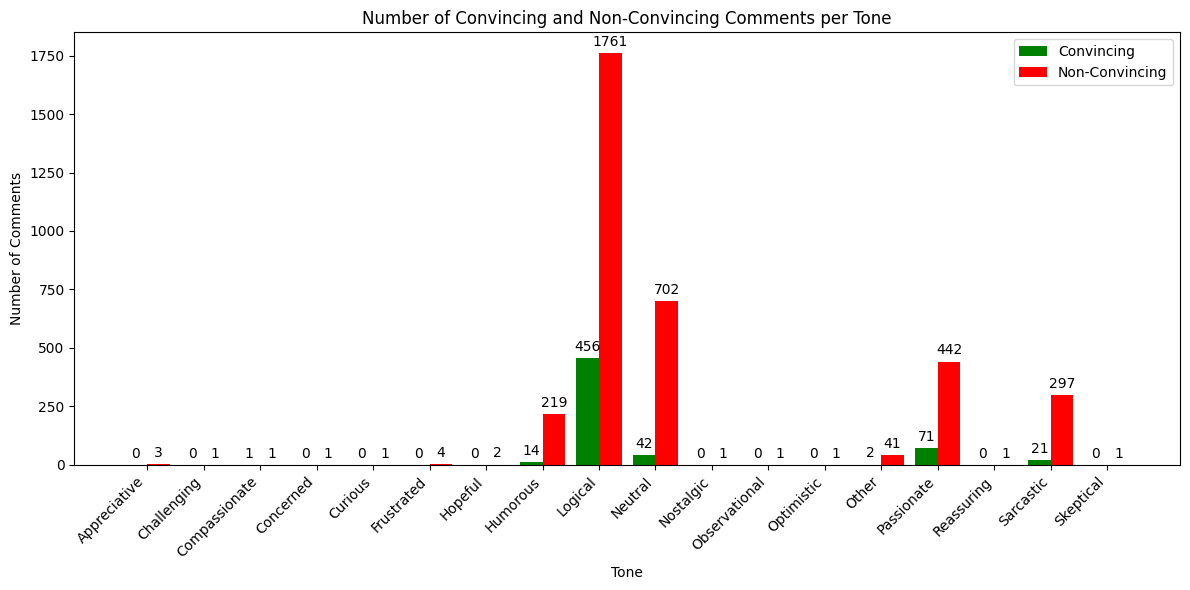

In [ ]:
plot_category_histogram(comments_df, 'tone_google', 'Tone')

In [ ]:
def show_tone_examples(tone_label):
  print(f"Example for {tone_label}:")
  print(comments_df[comments_df['tone_google'] == tone_label].iloc[0]['final_comment'])
  print("-" * 20)

show_tone_examples("Humorous")
show_tone_examples("Sarcastic")
show_tone_examples("Passionate")

Example for Humorous:
> "oi, get a room, there's people here need a piss"

I'm dying.
--------------------
Example for Sarcastic:
Someone standing outside the door screaming at you to hurry the hell up wouldn't be enough to deter you?  I mean, who the hell cares if there is no line, but if others are waiting, they will not be patient for anyone to have sex.
--------------------
Example for Passionate:
My daughter is 15. She does not tolerate bullying at all (my son is autistic & she spent her early years around kids w/disabilities). If she sees it happen, my girl stands up! But she also asks why is the bully a bully? What is happening in that person's life that would lead them to behave that way. Then, she befriends them. To date, bullies that became her friends had the following happening at the time :

-One was being neglected at home to the point we called CPS
-One had parents going thru a terrible divorce
-One had a mom that was incredibly cruel

There are mean people out there. Bu

## 6.3 Style - formal / informal
We would like to create a feature for the style of the text, in other words is it formal or informal text.

For this we will use the model facebook/bart-large-mnli that has been trained on a wide range of general text categories.

We will use this model with zero-shot classification, by defining labels "formal" and "informal" and classify the texts into these categories.

In [ ]:
import re
def do_calc_feature(feature, func, remove_urls=False, switch_order=False):
  for index, row in comments_df.iterrows():
    if pd.isna(row[feature]):  # calculate only if wasn't calculated yet
      print(f"Calculating {feature} for index {index}")
      if not isinstance(row['thread_text'], str):
        text = row['final_comment']
      elif switch_order:
        text = row['final_comment'] + "\n" + row['thread_text']
      else:
        text = row['thread_text'] + "\n" + row['final_comment']

      if remove_urls:
        text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)
      comments_df.at[index, feature] = func(text)

In [ ]:
from transformers import pipeline

# Load zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

candidate_labels = ["formal", "informal"]

def get_style(text):
    return classifier(text, candidate_labels)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
comments_df['style'] = None

In [ ]:
do_calc_feature("style", get_style)

Calculating style for index 1585
Calculating style for index 1586
Calculating style for index 1587
Calculating style for index 1588
Calculating style for index 1589
Calculating style for index 1590
Calculating style for index 1591
Calculating style for index 1592
Calculating style for index 1593
Calculating style for index 1594
Calculating style for index 1595
Calculating style for index 1596
Calculating style for index 1597
Calculating style for index 1598
Calculating style for index 1599
Calculating style for index 1600
Calculating style for index 1601
Calculating style for index 1602
Calculating style for index 1603
Calculating style for index 1604
Calculating style for index 1605
Calculating style for index 1606
Calculating style for index 1607
Calculating style for index 1608
Calculating style for index 1609
Calculating style for index 1610
Calculating style for index 1611
Calculating style for index 1612
Calculating style for index 1613
Calculating style for index 1614
Calculatin

In [ ]:
comments_df['style'].iloc[0]

{'sequence': 'I agree with mercy. But sometimes mercy can rob justice. There comes a time when logic, reasoning, and understanding aren’t enough. The trick is recognizing when a situation like that really comes about. In any case, a man or woman incapable of biting back isn’t really capable of doing a whole lot of good in the world. ',
 'labels': ['formal', 'informal'],
 'scores': [0.5104171633720398, 0.4895828664302826]}

In [ ]:
import json
import ast

def convert_string_to_json(string):
  data = ast.literal_eval(string)
  data_obj = json.dumps(data, indent=4)
  return json.loads(data_obj)

def get_style_label(style):
  if isinstance(style, str):
    style = convert_string_to_json(style)
  return style['labels'][style['scores'].index(max(style['scores']))]

In [ ]:
get_style_label(comments_df['style'].iloc[0])

'formal'

In [ ]:
comments_df['style_label'] = comments_df['style'].apply(get_style_label)

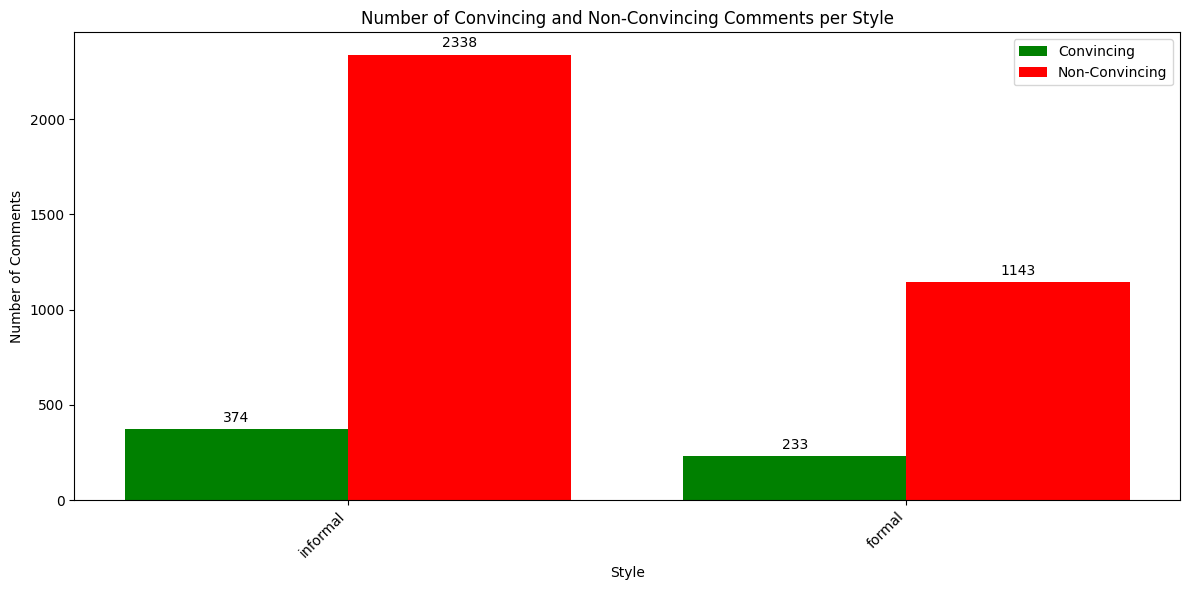

In [ ]:
plot_category_histogram(comments_df, 'style_label', 'Style')

We see that most of the comments are informal, which makes sense for this type of communication.

In [ ]:
def show_style_example(style):
  print(f"Example for {style}:")
  for _, row in comments_df[comments_df['style_label'] == style].iterrows():
    style = convert_string_to_json(row['style'])
    if max(style['scores']) > 0.95:
      print(row['final_comment'])
      print("-" * 20)
      break

show_style_example("formal")
show_style_example("informal")

Example for formal:
Yup, this is the law where I am.  Employer is required to give notice, or the same amount of pay in lieu of notice.  Most employers choose to give pay as soon-to-be laid off employees tend to be poor employees.

The only exception is if the employee is fired for cause -- but the burden is on the employer to show cause if challenged.
--------------------
Example for informal:
Yeah, that sounds like a made-up reason to me.
--------------------


## 6.4 Rhetorical means
**Rhetorical means** refer to the strategies and techniques used to persuade or influence an audience in communication. They are central to the art of rhetoric and can be categorized into three main types: **ethos**, **pathos**, and **logos**. Together, these rhetorical means form the foundation of persuasive communication.

**Ethos** appeals to the speaker's credibility and character, aiming to establish trust with the audience.

**Pathos** focuses on evoking emotions, such as sympathy or anger, to connect with the audience on a personal level.

**Logos**, on the other hand, relies on logic and reasoning, using facts, statistics, and logical arguments to persuade the audience.

We would like to create feature with the amount of each rhetorical mean in each text.

Empath is an open-source text analysis library that categorizes words into psychologically meaningful themes, allowing users to extract insights about emotions, topics, and rhetorical strategies from text. We will use this library to calculate scores for each rhethorical mean in our data set.

In [ ]:
!pip install empath

In [ ]:
pathos_categories = ['hate', 'cheerfulness', 'aggression', 'envy', 'anticipation', 'fear', 'nervousness', 'horror', 'suffering', 'pride', 'sadness', 'optimism', 'irritability', 'surprise', 'exasperation', 'zest', 'confusion', 'love', 'sympathy', 'rage', 'emotional', 'joy', 'affection', 'shame', 'torment', 'anger', 'disappointment', 'pain', 'timidity', 'negative_emotion', 'positive_emotion', 'contentment']
ethos_categories = ['office', 'occupation', 'government', 'royalty', 'wealthy', 'journalism', 'banking', 'leader', 'independence', 'dominant_heirarchical', 'military', 'dominant_personality', 'science', 'work', 'philosophy', 'law', 'achievement']
logos_categories = ['money', 'medical_emergency', 'crime', 'dispute', 'government', 'school', 'computer', 'college', 'business', 'driving', 'internet', 'programming', 'economics', 'politics', 'technology', 'negotiate', 'payment']

In [ ]:
comments_df['ethos_score'] = None
comments_df['pathos_score'] = None
comments_df['logos_score'] = None

In [ ]:
from empath import Empath
import pandas as pd

lexicon = Empath()

def compute_rhetorical_scores():
  for index, row in comments_df.iterrows():
    if pd.isna(row['ethos_score']) or pd.isna(row['pathos_score']) or pd.isna(row['logos_score']):  # calculate only if wasn't calculated yet
      print(f"Calculating rhethorical means for index {index}")
      if isinstance(row['thread_text'], str):
        text = row['thread_text'] + "\n" + row['final_comment']
      else:
        text = row['final_comment']

      analysis = lexicon.analyze(text, normalize=True)  # Normalize to percentage

      ethos_score = sum(analysis[cat] for cat in ethos_categories)
      pathos_score = sum(analysis[cat] for cat in pathos_categories)
      logos_score = sum(analysis[cat] for cat in logos_categories)

      comments_df.at[index, 'ethos_score'] = ethos_score
      comments_df.at[index, 'pathos_score'] = pathos_score
      comments_df.at[index, 'logos_score'] = logos_score

In [ ]:
compute_rhetorical_scores()

Calculating rhethorical means for index 0
Calculating rhethorical means for index 1
Calculating rhethorical means for index 2
Calculating rhethorical means for index 3
Calculating rhethorical means for index 4
Calculating rhethorical means for index 5
Calculating rhethorical means for index 6
Calculating rhethorical means for index 7
Calculating rhethorical means for index 8
Calculating rhethorical means for index 9
Calculating rhethorical means for index 10
Calculating rhethorical means for index 11
Calculating rhethorical means for index 12
Calculating rhethorical means for index 13
Calculating rhethorical means for index 14
Calculating rhethorical means for index 15
Calculating rhethorical means for index 16
Calculating rhethorical means for index 17
Calculating rhethorical means for index 18
Calculating rhethorical means for index 19
Calculating rhethorical means for index 20
Calculating rhethorical means for index 21
Calculating rhethorical means for index 22
Calculating rhethoric

Let's plot the distribution of each rhethorical mean in the dataset:

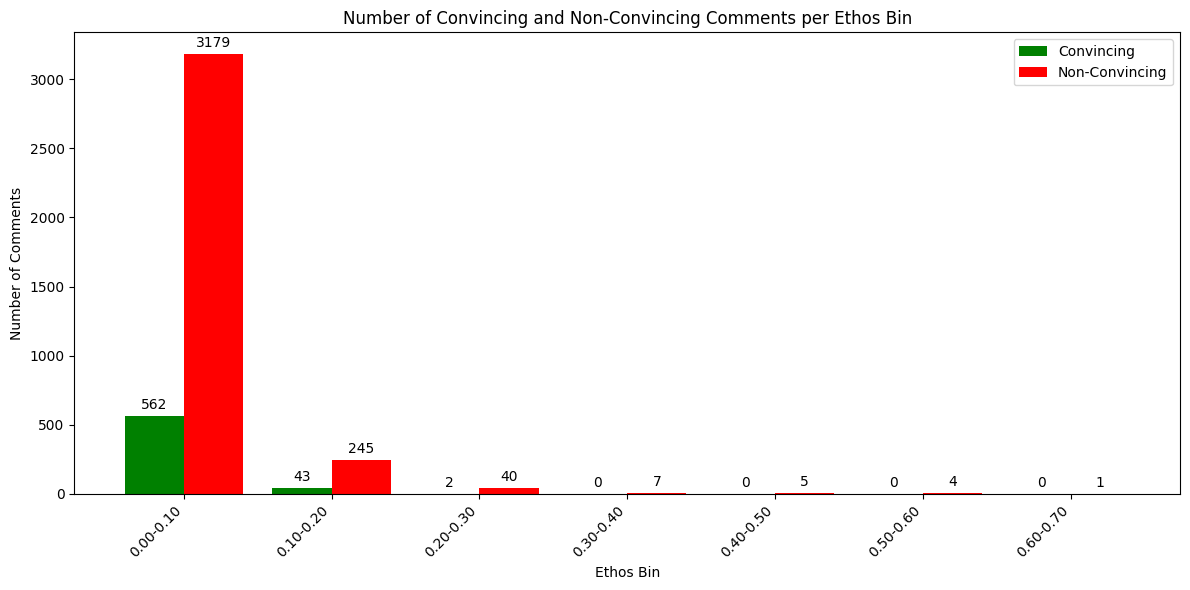

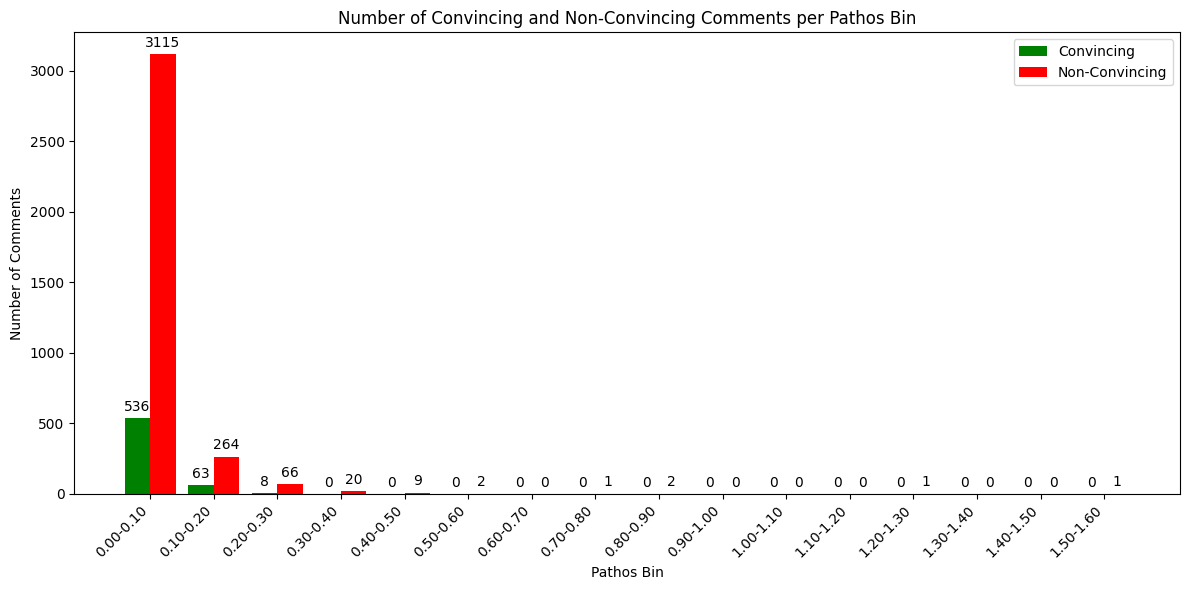

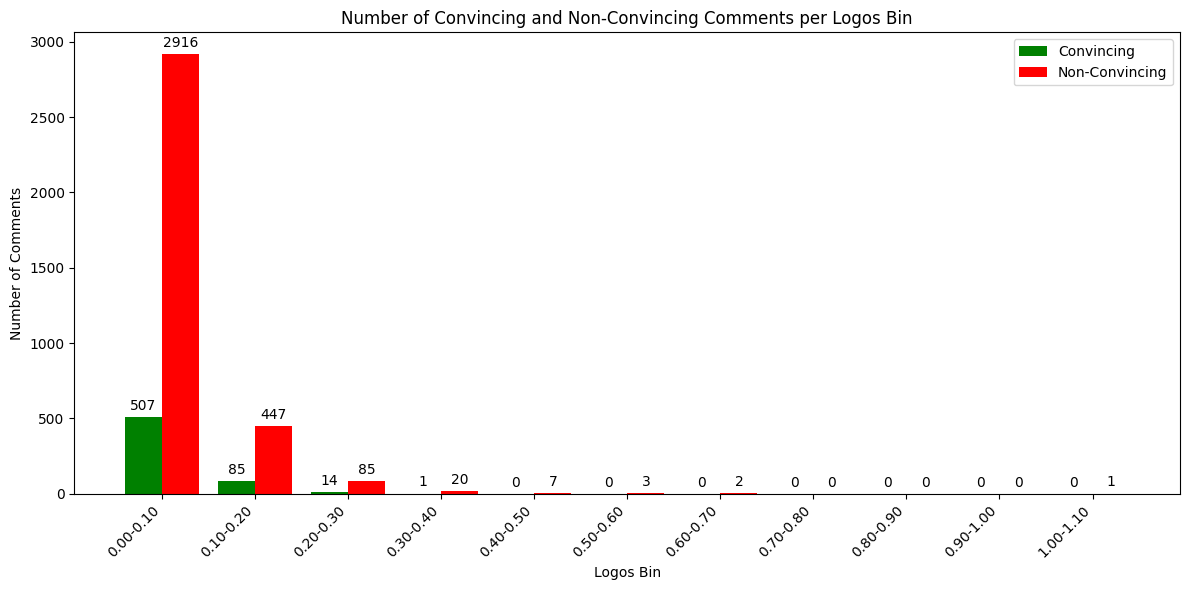

In [ ]:
plot_feature('ethos_score', 'Ethos', 0.10)
plot_feature('pathos_score', 'Pathos', 0.10)
plot_feature('logos_score', 'Logos', 0.10)

Examples:

In [ ]:
def show_rhethorical_mean_example(feature_name):
  for index, row in comments_df[comments_df[feature_name] > 0.85].iterrows():
    print(f"Example for {feature_name} = {row[feature_name]}:")
    print(row['final_comment'])
    print("-" * 20)
    break

show_rhethorical_mean_example('ethos_score')
show_rhethorical_mean_example('pathos_score')
show_rhethorical_mean_example('logos_score')

Example for pathos_score = 1.2727272727272727:
Ahhh...true feelings, like the feeling you want a new beach house.
--------------------
Example for logos_score = 1.0:
Ad revenue :(
--------------------


We see that the results are not reliable, therefore, we won't include this feature in the final model.

It would have been interesting to try to identify the rhethorical means using LLMs such as Gemini or Chat GPT, but due to time limitations, we will not include this in the current work.

## 6.5 Adjective-Adverb Ratio

The **Adjective-Adverb Ratio**, also called the **Descriptive Density Ratio** measures the proportion of adjectives and adverbs in a text relative to the total word count. A higher ratio indicates a more expressive or emotionally charged writing style, while a lower ratio suggests a more concise, factual, and objective tone.

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

def get_adjective_adverb_ratio(text):
  doc = nlp(text)
  adjectives = [token.text for token in doc if token.pos_ == 'ADJ']
  adverbs = [token.text for token in doc if token.pos_ == 'ADV']
  return len(adjectives) / len(adverbs) if len(adverbs) > 0 else np.inf

In [ ]:
comments_df['adj_adv_ratio'] = None

In [ ]:
do_calc_feature("adj_adv_ratio", get_adjective_adverb_ratio)

Calculating adj_adv_ratio for index 0
Calculating adj_adv_ratio for index 1
Calculating adj_adv_ratio for index 2
Calculating adj_adv_ratio for index 3
Calculating adj_adv_ratio for index 4
Calculating adj_adv_ratio for index 5
Calculating adj_adv_ratio for index 6
Calculating adj_adv_ratio for index 7
Calculating adj_adv_ratio for index 8
Calculating adj_adv_ratio for index 9
Calculating adj_adv_ratio for index 10
Calculating adj_adv_ratio for index 11
Calculating adj_adv_ratio for index 12
Calculating adj_adv_ratio for index 13
Calculating adj_adv_ratio for index 14
Calculating adj_adv_ratio for index 15
Calculating adj_adv_ratio for index 16
Calculating adj_adv_ratio for index 17
Calculating adj_adv_ratio for index 18
Calculating adj_adv_ratio for index 19
Calculating adj_adv_ratio for index 20
Calculating adj_adv_ratio for index 21
Calculating adj_adv_ratio for index 22
Calculating adj_adv_ratio for index 23
Calculating adj_adv_ratio for index 24
Calculating adj_adv_ratio for index

In [ ]:
import numpy as np
comments_df['adj_adv_ratio_edited'] = comments_df['adj_adv_ratio'].replace(np.inf, 0)

In [ ]:
comments_df['adj_adv_ratio_edited'].describe()

count    4088.000000
mean        1.330311
std         1.204544
min         0.000000
25%         0.666667
50%         1.116111
75%         1.740622
max        15.000000
Name: adj_adv_ratio_edited, dtype: float64

We want to plot the results. The max result, excluding infinity is 15, so we will replace every instance of infinity by 17.

In [ ]:
comments_df['adj_adv_ratio_edited'] = comments_df['adj_adv_ratio'].replace(np.inf, 17)

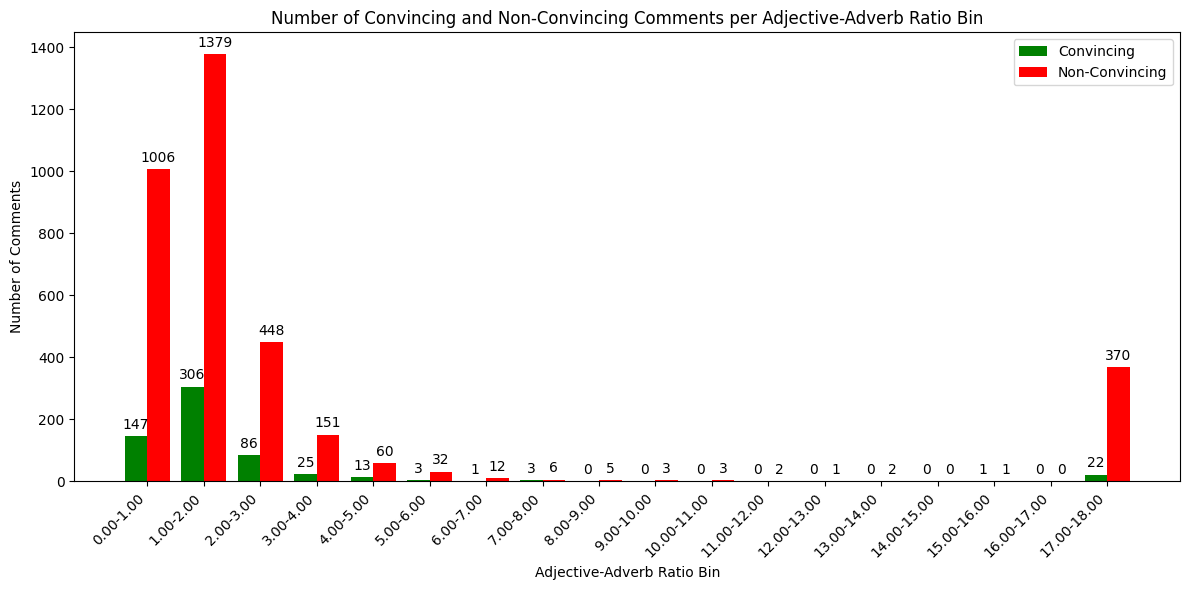

In [ ]:
plot_feature('adj_adv_ratio_edited', 'Adjective-Adverb Ratio', 1)

In [ ]:
# Drop the 'adj_adv_ratio' column
comments_df = comments_df.drop('adj_adv_ratio', axis=1)

# Rename 'adj_adv_ratio_edited' to 'adj_adv_ratio'
comments_df = comments_df.rename(columns={'adj_adv_ratio_edited': 'adj_adv_ratio'})


In [ ]:

import numpy as np

max_adj_adv_ratio_row = comments_df.loc[comments_df['adj_adv_ratio'].idxmax()]
print(f"Example for high Adj/Adv ratio ({max_adj_adv_ratio_row['adj_adv_ratio']}):")
print(max_adj_adv_ratio_row['final_comment'])
print("-" * 20)

min_adj_adv_ratio_row = comments_df.loc[comments_df['adj_adv_ratio'].idxmin()]
print(f"Example for low Adj/Adv ratio ({min_adj_adv_ratio_row['adj_adv_ratio']}):")
print(min_adj_adv_ratio_row['final_comment'])
print("-" * 20)


Example for high Adj/Adv ratio (inf):
Someone standing outside the door screaming at you to hurry the hell up wouldn't be enough to deter you?  I mean, who the hell cares if there is no line, but if others are waiting, they will not be patient for anyone to have sex.
--------------------
Example for low Adj/Adv ratio (0.0):
> "oi, get a room, there's people here need a piss"

I'm dying.
--------------------


Generally, we can say that:
* High Adjective-to-Adverb Ratio
  * More adjectives than adverbs
  * The text is descriptive and vivid, often used in storytelling and persuasive writing to create strong imagery and appeal to emotions.
  * May indicate a focus on ethos (credibility) and pathos (emotion) by painting a compelling picture.

* Low Adjective-to-Adverb Ratio
  * More adverbs than adjectives
  * The text is action-driven and dynamic, emphasizing how actions are performed, often found in arguments, speeches, or instructional writing.
  * May indicate a focus on logos (logical reasoning) and pathos (emotional appeal) by emphasizing how actions happen.

* Balanced Ratio
  * More or less the same amount of adjectives and adverbs
  * The text is neutral and precise, commonly seen in academic, formal, or news writing, aiming for a mix of credibility, logic, and emotional appeal.
  * May indicate a mix of ethos (credibility), logos (logic), and pathos (emotion) in persuasion.



We see that in our dataset, the texts tend to have high ratio of Adjective-to-Adverb.

## 6.6 Readability

Readability is a crucial feature in the feature engineering of convincing and non-convincing texts because it directly impacts how easily the audience can understand and engage with the message. A highly readable text is often more persuasive, as it allows the reader to quickly grasp the key points and emotional appeals without feeling overwhelmed or lost in complex language.

One of the widely used metrics for estimating readability is the **Flesch-Kincaid Readability Tests**.

The **Flesch-Kincaid Readability Tests** provide a score based on sentence length and word complexity, with the result indicating the U.S. school grade level required to understand the text. A lower score suggests a more accessible text, which is often more persuasive.

We will calculate:
* Flesch-Kincaid Grade Level: This score gives an approximation of the U.S. school grade level needed to understand the text. A higher value means more complex language.
* Flesch Reading Ease: This score indicates how easy the text is to read. Higher values (above 60) indicate easier text, while lower values suggest more complex, harder-to-read text.

In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.7 MB/s eta 0:00:00


### Flesh Kincaid Grade Level

In [ ]:
comments_df['fk_grade_level'] = None

In [ ]:
import textstat
do_calc_feature("fk_grade_level", lambda text: textstat.flesch_kincaid_grade(text), remove_urls=True)

Calculating fk_grade_level for index 0
Calculating fk_grade_level for index 1
Calculating fk_grade_level for index 2
Calculating fk_grade_level for index 3
Calculating fk_grade_level for index 4
Calculating fk_grade_level for index 5
Calculating fk_grade_level for index 6
Calculating fk_grade_level for index 7
Calculating fk_grade_level for index 8
Calculating fk_grade_level for index 9
Calculating fk_grade_level for index 10
Calculating fk_grade_level for index 11
Calculating fk_grade_level for index 12
Calculating fk_grade_level for index 13
Calculating fk_grade_level for index 14
Calculating fk_grade_level for index 15
Calculating fk_grade_level for index 16
Calculating fk_grade_level for index 17
Calculating fk_grade_level for index 18
Calculating fk_grade_level for index 19
Calculating fk_grade_level for index 20
Calculating fk_grade_level for index 21
Calculating fk_grade_level for index 22
Calculating fk_grade_level for index 23
Calculating fk_grade_level for index 24
Calculatin

In [ ]:
comments_df['fk_grade_level'].head()

0     7.7
1     5.2
2    12.8
3     8.0
4     6.0
Name: fk_grade_level, dtype: object

The datatype is object, we will convert it to a number.

In [ ]:
comments_df['fk_grade_level_converted'] = pd.to_numeric(comments_df['fk_grade_level'], errors='coerce')

In [ ]:
comments_df['fk_grade_level_converted'].describe()

count    4088.000000
mean        9.107094
std         3.889445
min       -15.700000
25%         7.000000
50%         8.900000
75%        11.000000
max        70.300000
Name: fk_grade_level_converted, dtype: float64

We see that there's an unexpected result of -15 in the minimum, let's inspect the comments that resulted a value below 0:

In [ ]:
comments_df[comments_df['fk_grade_level_converted'] < 0]

original_post thread_text  \
150   CMV: Mike Bloomberg's campaign is proof that t...         NaN   
475   CMV: if great britain not giving the 13 US col...         NaN   
482   CMV: if great britain not giving the 13 US col...         NaN   
546   cmv: Ban on sleeping in vehicles is just targe...         NaN   
573   CMV: The white teen who said the n word on a S...         NaN   
594   CMV: America desperately needs a young, sane p...         NaN   
685   CMV: It should be illegal for huge media compa...         NaN   
712   CMV: Warren and Sanders are not radicals, they...         NaN   
757   CMV: People who have been wrongfully imprisone...         NaN   
872   CMV: taxpayers and the general public should n...         NaN   
930   CMV: The modern remakes of older Disney movies...         NaN   
970   CMV: Taxes are not equal to theft, they are th...         NaN   
1036  CMV: Religious american conservatives / right ...         NaN   
1074  CMV: Drake is extremely overrated as an artist...         NaN   
1219  CMV: Euthanasia should be legal because we des...         NaN   
1220  CMV: Euthanasia should be legal because we des...         NaN   
1274  CMV: Transwomen (transitioned post-puberty) sh...         NaN   
1345  CMV: All public restrooms that contain only a ...         NaN   
1486  CMV: Changing the race or sex of a comic book ...         NaN   
1544  CMV: there should be a maximum age to run for ...         NaN   
1701  CMV: I don’t think people under 18 should be a...         NaN   
2078  CMV: The pledge of Allegiance is scary and stu...         NaN   
2123  CMV: Free awards and the large amount of cheap...         NaN   
2264  CMV: There needs to be 8 "Chuggas" before a "C...         NaN   
2316  CMV: We are entering an unhealthy culture of n...         NaN   
2369  CMV: The LGBT+ community is managing to harm t...         NaN   
2525  CMV: This current presidential debate has prov...         NaN   
2549  CMV: The pro and anti-pineapple pizza debate i...         NaN   
2779  CMV: other cultures eating dog meat shouldn’t ...         NaN   
2805  CMV: It should be the standard in offices to a...         NaN   
2856  CMV: The Amazon rainforest is too integral to ...         NaN   
3072  CMV: The average American would lose to a Goos...         NaN   
3083  CMV: The average American would lose to a Goos...         NaN   
3086  CMV: The average American would lose to a Goos...         NaN   
3420  CMV: Russia should be banned from all sporting...         NaN   
3454  CMV: US Democrats should push for a higher min...         NaN   
3509  CMV: Making your bed is pointless.\nWhy make y...         NaN   
3642  CMV: America's standards for Movie ratings and...         NaN   
3815  CMV: There’s no reason to believe that our mod...        Cme?   
3998  CMV: Capitalism is the best economic system an...         NaN   

                                          final_comment  is_convincing  \
150   I saved your post it was so good. Hear hear to...              0   
475                                           Good bot.              0   
482                                            It’s not              0   
546                 RIP, man. Seemed like a great dude.              0   
573                           This is a great point tbh              0   
594                                            Hot take              0   
685                                                 YES              0   
712                                                   .              0   
757                                       That's fucked              0   
872   [Cardale Jones ain’t come here to play school....              0   
930                                     You are wrong.               0   
970                                             Source?              0   
1036  OP.  Watch them clash.  And they all swear to ...              0   
1074                      That's a good ass song though              0   
1219                

We see that these are very short texts with very few syllables, so the result is expected. Let's inspect the distribution.

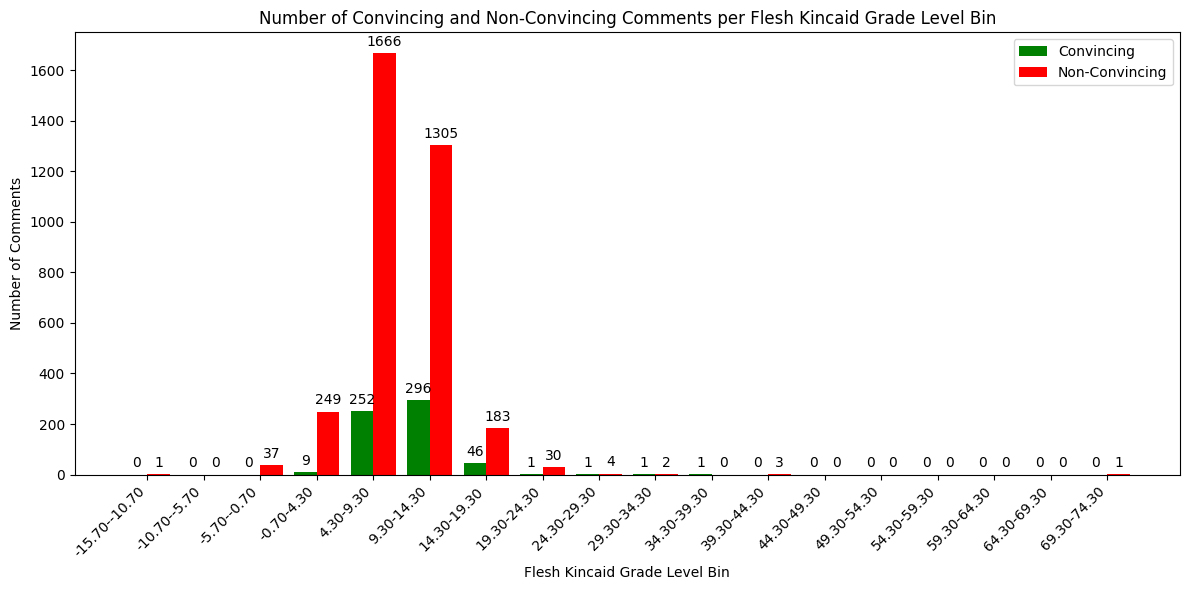

In [ ]:
plot_feature('fk_grade_level_converted', 'Flesh Kincaid Grade Level', 5)

In [ ]:
max_grade_level_row = comments_df.loc[comments_df['fk_grade_level_converted'].idxmax()]
print(f"Example for high FK grade level ({max_grade_level_row['fk_grade_level_converted']}):")
print(max_grade_level_row['final_comment'])
print("-" * 20)


Example for high FK grade level (70.3):
 619   923   799   504   767   802   806   229   757   781
 340   963    79   800   508   656   123   349   282   361
 825   516   597   245   928   713   815   749   913   391
 613   809   320   142   310   684    23    99    36   788
 503   660   140   753     4   144   648   158   889   601
 556   552   814   477   541   530   487   421   356   635
 251   339   186    65    10   906   876   402   642   605
 828   440   478    74   603   405    56   255   750   897
 492   873   355    86   943   467   576    98   403   546
 118   524   509   692   220   197   728   235   604   333
 551   893   846   914   247   658   644   641     6   456
 681   773   223   607   677   820   393    72   593   469
 899     3   289   464   966   238   288   169   386    71
 435     5   241   434   279   737   479   265   281   683
 554   679   269   387   208   133   324   534   353   296
 471   237   176   813   453   129   502   807   177   716
 772   598   636

In [ ]:
comments_df['fk_grade_level'] = comments_df['fk_grade_level_converted']
comments_df.drop(columns=['fk_grade_level_converted'], inplace=True)

### Flesh Kincaid Reading Ease

In [ ]:
comments_df['fk_reading_ease'] = None

In [ ]:
do_calc_feature("fk_reading_ease", lambda text: textstat.flesch_reading_ease(text), remove_urls=True)

Calculating fk_reading_ease for index 0
Calculating fk_reading_ease for index 1
Calculating fk_reading_ease for index 2
Calculating fk_reading_ease for index 3
Calculating fk_reading_ease for index 4
Calculating fk_reading_ease for index 5
Calculating fk_reading_ease for index 6
Calculating fk_reading_ease for index 7
Calculating fk_reading_ease for index 8
Calculating fk_reading_ease for index 9
Calculating fk_reading_ease for index 10
Calculating fk_reading_ease for index 11
Calculating fk_reading_ease for index 12
Calculating fk_reading_ease for index 13
Calculating fk_reading_ease for index 14
Calculating fk_reading_ease for index 15
Calculating fk_reading_ease for index 16
Calculating fk_reading_ease for index 17
Calculating fk_reading_ease for index 18
Calculating fk_reading_ease for index 19
Calculating fk_reading_ease for index 20
Calculating fk_reading_ease for index 21
Calculating fk_reading_ease for index 22
Calculating fk_reading_ease for index 23
Calculating fk_reading_eas

In [ ]:
comments_df['fk_reading_ease'].head()

0     59.9
1    77.23
2    52.02
3    64.51
4    69.79
Name: fk_reading_ease, dtype: object

In [ ]:
comments_df['fk_reading_ease'] = pd.to_numeric(comments_df['fk_reading_ease'], errors='coerce')

In [ ]:
comments_df['fk_reading_ease'].describe()

count    4088.000000
mean       61.158486
std        19.155757
min      -218.200000
25%        52.430000
50%        61.670000
75%        70.840000
max       206.840000
Name: fk_reading_ease, dtype: float64

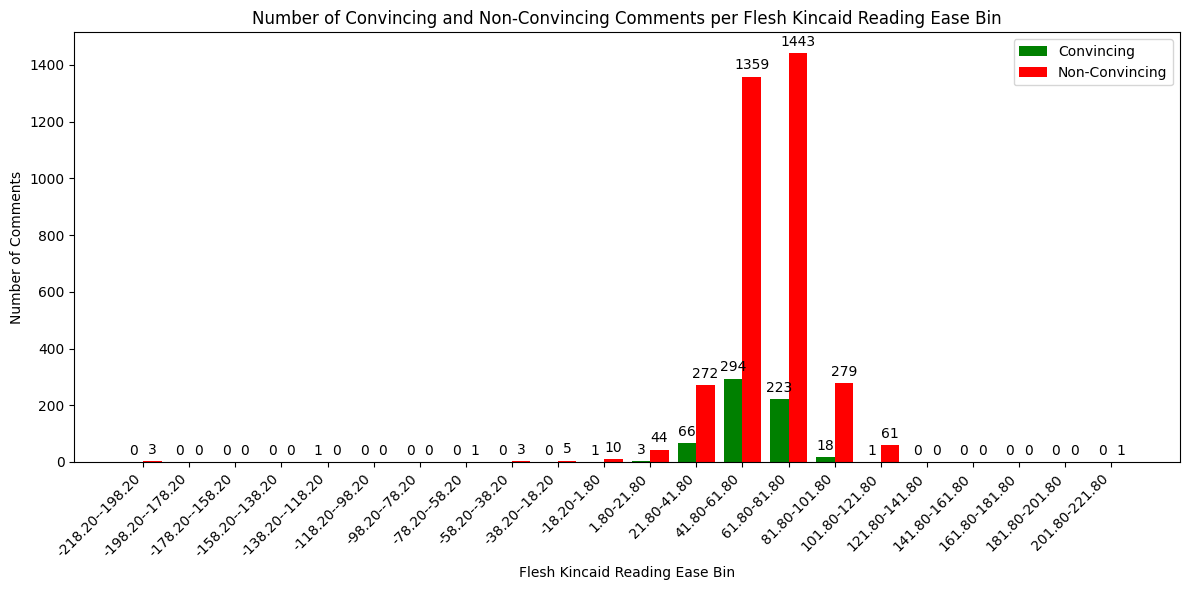

In [ ]:
plot_feature('fk_reading_ease', 'Flesh Kincaid Reading Ease', 20)

In [ ]:
min_row = comments_df.loc[comments_df['fk_reading_ease'].idxmin()]
print(f"Example for very low FK reading ease ({min_row['fk_reading_ease']}):")
print(min_row['final_comment'])
print("-" * 20)


Example for very low FK reading ease (-218.2):
"analyzational"

Analytical?
--------------------


## 6.7 Use of Evidence

The paper, "[Attitude Change on Reddit's Change My View](https://jpriniski.github.io/papers/cogsci-reddit.pdf)," explores how individuals on the Reddit forum **Change My View (CMV)** adjust their beliefs on various topics, particularly focusing on sociomoral issues (e.g., politics, morality) compared to non-sociomoral topics (e.g., humor, fiction).

The studuy includes the code for calculating evidence use in comments. We will adapt the code from their [repo in GitHub](https://github.com/jpriniski/CMV), and execute it on our own dataset, to create the evidence use features.

In [ ]:
extensions = ['http://', 'https://', '.com', '.org', '.gov', 'pdf', '.net', 'www.']

stems = ['data', 'stat', 'statist', 'figur', '%', 'percent', 'averag', 'number', 'amount',
         'thousand', 'million', 'billion', '$', '€', '¥', '£', 'dollar', 'evid', 'info',
         'testimoni', 'conclus', 'document', 'experi', 'experi', 'measur', 'measur', 'report',
         'result', 'census', 'figur', 'plot', 'graph', 'sum', 'total', 'decim', 'digit', 'fraction',
         'numer', 'half', 'share', 'proport', 'capit', 'cash', 'properti', 'salari', 'wage', 'wealth',
         'financ', 'resourc', 'roll', 'treasuri', 'bank', 'deposit', 'exchang', 'safe', 'estim', 'price',
         'price', 'merchandis', 'retail', 'sale', 'cartel', 'invest', 'market', 'deposit', 'document',
         'indic', 'wit', 'affirm', 'corrobor', 'declar', 'good', 'ground', 'token', 'signific', 'probabl',
         'p valu', '<', '=', 'greater', 'equal', 'less', 'rang', 'devi', 'sd', 'mode',
         'median']

import nltk
snow = nltk.stem.SnowballStemmer('english')

def get_evidence_count(text):
    evidence_count = 0
    comment_stemmed = snow.stem(text.lower())

    for word in comment_stemmed.split():
      if any(s == word for s in stems) and not any(e in word for e in extensions):
          evidence_count += 1

    return evidence_count

In [ ]:
comments_df['evidence_count'] = None

In [ ]:
do_calc_feature("evidence_count", get_evidence_count)

Calculating evidence_count for index 0
Calculating evidence_count for index 1
Calculating evidence_count for index 2
Calculating evidence_count for index 3
Calculating evidence_count for index 4
Calculating evidence_count for index 5
Calculating evidence_count for index 6
Calculating evidence_count for index 7
Calculating evidence_count for index 8
Calculating evidence_count for index 9
Calculating evidence_count for index 10
Calculating evidence_count for index 11
Calculating evidence_count for index 12
Calculating evidence_count for index 13
Calculating evidence_count for index 14
Calculating evidence_count for index 15
Calculating evidence_count for index 16
Calculating evidence_count for index 17
Calculating evidence_count for index 18
Calculating evidence_count for index 19
Calculating evidence_count for index 20
Calculating evidence_count for index 21
Calculating evidence_count for index 22
Calculating evidence_count for index 23
Calculating evidence_count for index 24
Calculatin

In [ ]:
comments_df['evidence_count'].describe()

count     4088
unique      21
top          0
freq      2602
Name: evidence_count, dtype: int64

In [ ]:
comments_df['evidence_count'] = pd.to_numeric(comments_df['evidence_count'])

In [ ]:
comments_df['evidence_count'].describe()

count    4088.000000
mean        0.849804
std         1.878092
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        31.000000
Name: evidence_count, dtype: float64

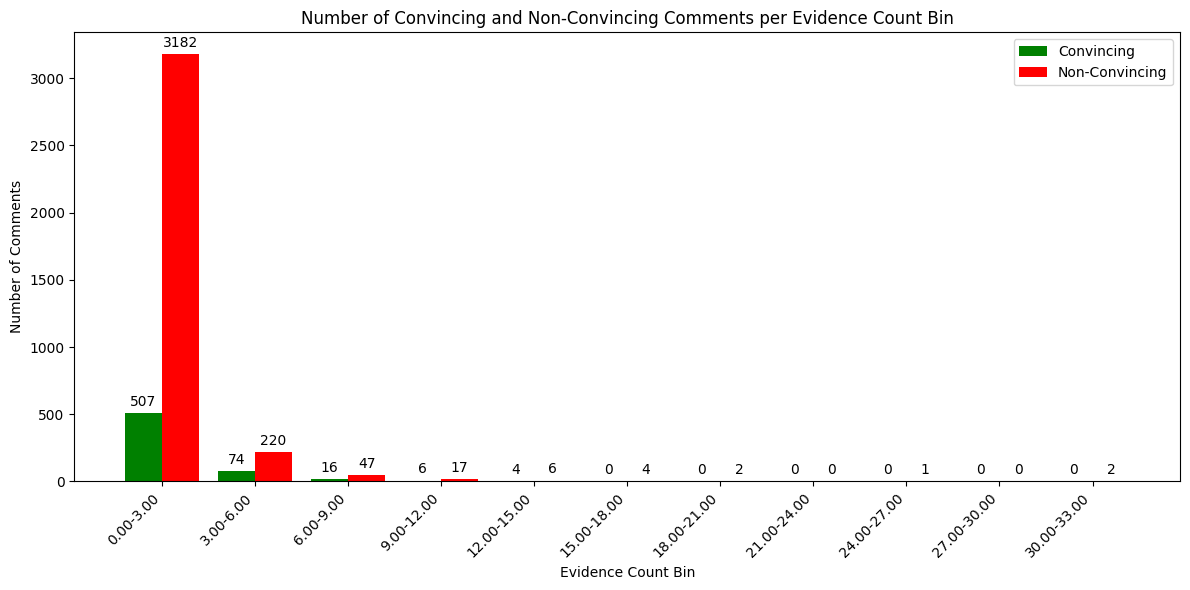

In [ ]:
plot_feature('evidence_count', 'Evidence Count', 3)

In [ ]:
max_row = comments_df.loc[comments_df['evidence_count'].idxmax()]
print(f"Example for high evidence count ({max_row['evidence_count']}):")
print(max_row['thread_text'])
print(max_row['final_comment'])
print("-" * 20)

Example for high evidence count (31):
2. I think it's good to use other countries as a barometer for how much we spend. As a percentage of GDP we spend less than Russia and Saudi Arabia. As a total amount of spending we spend slightly more than Saudi Arabia, Russia, and China combined. The amounts the rest of NATO spends is negligible by comparison. We are spending like 10-20% more than would equal out to all of these countries but that's forgetting that we are fighting very real conflicts around the world. We can reduce our military spending but other NATO countries need to start pulling their own weight before we do.

3. The Military Industrial complex is very important. Part of the reason our economy does well is we're pumping money into it via military spending. The money that goes into making bullets and missiles doesn't evaporate when the they're fired, it goes into the pockets of US defense contractors. When our equipment gets old we sell it off to different countries and get ev

## 6.8 Use of Persuasive Language

We want to identify if the comment and context include use of persuasive language. To do this, we will use a HuggingFace model: https://huggingface.co/chreh/persuasive_language_detector.

From the model card:
> Given a sentence, our model predicts whether or not the sentence contains "persuasive" language, or language designed to elicit emotions or change readers' opinions. The model was tuned on the SemEval 2020 Task 11 dataset. However, we preprocessed the dataset to adapt it from multilabel technique classification and span-classification to our binary classification task.

The model has two flavours, BERT and XLM-RoBERTa. Based on the documentation, the latter performs better and faster, so we will use it.

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")
model = AutoModelForSequenceClassification.from_pretrained("chreh/persuasive_language_detector", revision="roberta")


In [ ]:
import torch

max_length = 512
def classify_text(text):
    # The model gets only up to 512 tokens
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=max_length)

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()

    return predicted_class


In [ ]:
 text = comments_df.iloc[0]['final_comment']
 classify_text(text)

1

In [ ]:
text

'I agree with mercy. But sometimes mercy can rob justice. There comes a time when logic, reasoning, and understanding aren’t enough. The trick is recognizing when a situation like that really comes about. In any case, a man or woman incapable of biting back isn’t really capable of doing a whole lot of good in the world. '

Let's apply the featute on all rows:

In [ ]:
comments_df['use_of_persuasive_lang'] = None

In [ ]:
do_calc_feature("use_of_persuasive_lang", classify_text, switch_order=True)

Calculating use_of_persuasive_lang for index 3
Calculating use_of_persuasive_lang for index 4
Calculating use_of_persuasive_lang for index 5
Calculating use_of_persuasive_lang for index 6
Calculating use_of_persuasive_lang for index 7
Calculating use_of_persuasive_lang for index 8
Calculating use_of_persuasive_lang for index 9
Calculating use_of_persuasive_lang for index 10
Calculating use_of_persuasive_lang for index 11
Calculating use_of_persuasive_lang for index 12
Calculating use_of_persuasive_lang for index 13
Calculating use_of_persuasive_lang for index 14
Calculating use_of_persuasive_lang for index 15
Calculating use_of_persuasive_lang for index 16
Calculating use_of_persuasive_lang for index 17
Calculating use_of_persuasive_lang for index 18
Calculating use_of_persuasive_lang for index 19
Calculating use_of_persuasive_lang for index 20
Calculating use_of_persuasive_lang for index 21
Calculating use_of_persuasive_lang for index 22
Calculating use_of_persuasive_lang for index 23

In [ ]:
comments_df['use_of_persuasive_lang']

0       1
1       1
2       1
3       1
4       1
       ..
4083    1
4084    0
4085    0
4086    1
4087    1
Name: use_of_persuasive_lang, Length: 4088, dtype: object

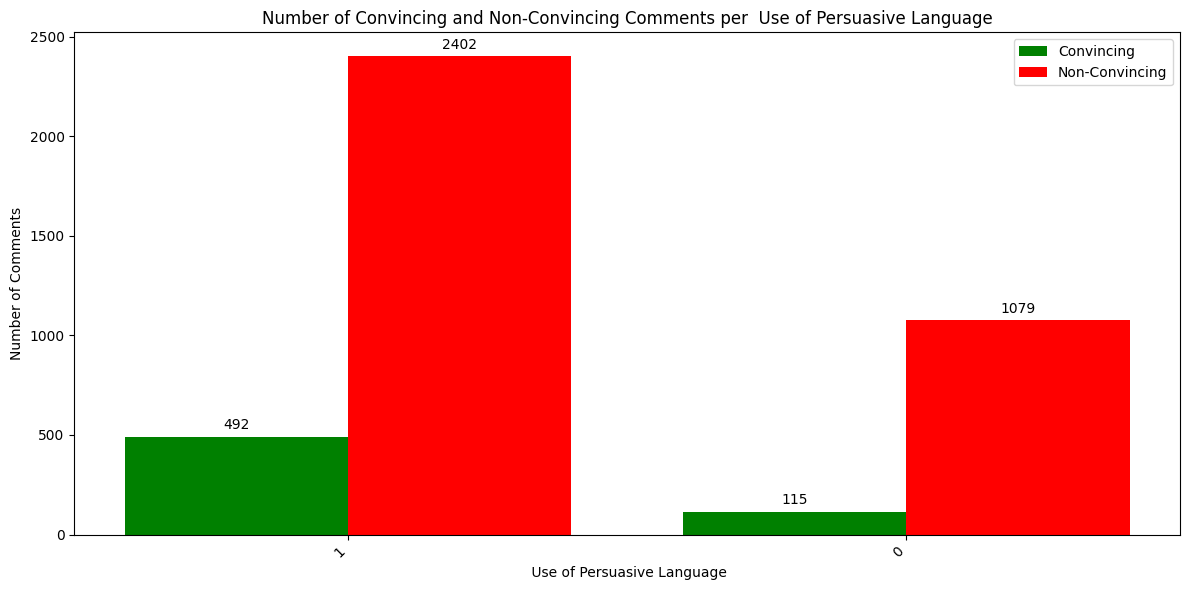

In [ ]:
plot_category_histogram(comments_df, 'use_of_persuasive_lang', ' Use of Persuasive Language')

In [ ]:
# convert comments_df['use_of_persuasive_lang'] to ints
comments_df['use_of_persuasive_lang'] = comments_df['use_of_persuasive_lang'].apply(lambda x: 1 if x == '1' else 0)

## 6.9 Document Embedding

We want that our model will also get some kind of representation of the original text, not only features extracted from it. Therefore we will include the docuemnt embedding in the features list.

First we will calculate the embedding using a variation of the BERT model, bert-base-uncased, which is a well-studied, strong contextual embeddings, suitable for general English NLP tasks.

This model provides encoding of dimension 768.

In [ ]:
import torch
import numpy as np
from transformers import AutoModel, AutoTokenizer

# Load model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def get_embedding(text, chunk_size=256, overlap=128):
    """
    Convert a long document into a single embedding using BERT with chunking.

    Parameters:
    - text (str): The long document
    - chunk_size (int): Max tokens per chunk (default: 256)
    - overlap (int): Overlapping tokens between chunks (default: 128)

    Returns:
    - Aggregated document embedding (numpy array of shape [768])
    """
    # Tokenize document without truncation
    tokens = tokenizer(text, return_tensors="pt", truncation=False)["input_ids"][0]

    # Split into chunks with overlap
    chunk_embeddings = []
    for i in range(0, len(tokens), chunk_size - overlap):
        chunk = tokens[i : i + chunk_size]  # Get chunk

        encoded_input = {
            "input_ids": chunk.unsqueeze(0),  # Add batch dimension
            "attention_mask": torch.ones_like(chunk).unsqueeze(0)  # Mask for valid tokens
        }

        # Forward pass through BERT
        with torch.no_grad():
            outputs = model(**encoded_input)

        # Extract last hidden state
        token_embeddings = outputs.last_hidden_state  # Shape: [1, chunk_size, 768]
        chunk_embedding = token_embeddings.mean(dim=1)  # Mean pooling over tokens

        # Store chunk embedding
        chunk_embeddings.append(chunk_embedding.squeeze().numpy())

    # Aggregate all chunk embeddings (mean pooling over chunks)
    document_embedding = np.mean(chunk_embeddings, axis=0)

    return document_embedding

In [ ]:
# Example Usage
long_text = comments_df.iloc[0]['final_comment']
embedding = get_embedding(long_text)
print(embedding.shape)  # Expected output: (768,)

(768,)


In [ ]:
comments_df['embedding'] = None

In [ ]:
do_calc_feature("embedding", get_embedding)

Calculating embedding for index 0
Calculating embedding for index 1
Calculating embedding for index 2


Token indices sequence length is longer than the specified maximum sequence length for this model (838 > 512). Running this sequence through the model will result in indexing errors


Calculating embedding for index 3
Calculating embedding for index 4
Calculating embedding for index 5
Calculating embedding for index 6
Calculating embedding for index 7
Calculating embedding for index 8
Calculating embedding for index 9
Calculating embedding for index 10
Calculating embedding for index 11
Calculating embedding for index 12
Calculating embedding for index 13
Calculating embedding for index 14
Calculating embedding for index 15
Calculating embedding for index 16
Calculating embedding for index 17
Calculating embedding for index 18
Calculating embedding for index 19
Calculating embedding for index 20
Calculating embedding for index 21
Calculating embedding for index 22
Calculating embedding for index 23
Calculating embedding for index 24
Calculating embedding for index 25
Calculating embedding for index 26
Calculating embedding for index 27
Calculating embedding for index 28
Calculating embedding for index 29
Calculating embedding for index 30
Calculating embedding for i

### Embedding Dimension Reduction with PCA
Since the size of the encoding is very big, and adding so many features to our models will not be practical, we will apply PCA on the embeddings.

To decide the PCA dimension, we will execute some statistical computation to understand what is the minimal dimension that will allow us to keep at least 85% of the information that the original embedding contains.

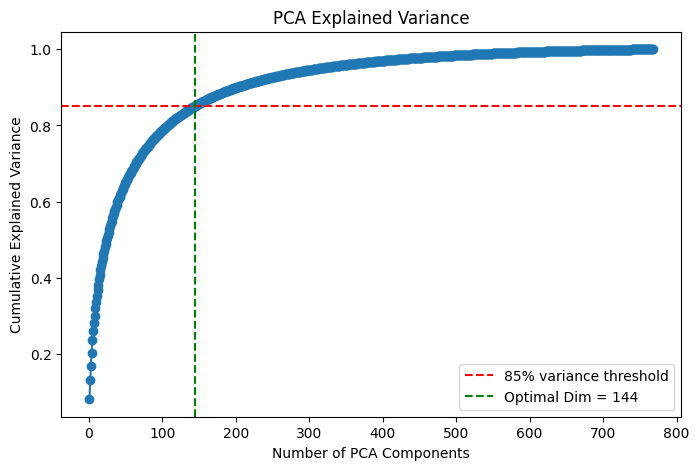

Optimal number of components: 144


In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Extract all embeddings into a matrix
embedding_matrix = np.vstack(comments_df["embedding"].values)  # Shape: (num_samples, 768)

# Apply PCA
pca = PCA().fit(embedding_matrix)  # Fit PCA on the full embedding

# Compute cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 85% variance
target_dim = np.argmax(explained_variance >= 0.85) + 1  # +1 because indexing starts at 0

# Plot the explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker="o")
plt.axhline(y=0.85, color="r", linestyle="--", label="85% variance threshold")
plt.axvline(x=target_dim, color="g", linestyle="--", label=f"Optimal Dim = {target_dim}")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.legend()
plt.show()

print(f"Optimal number of components: {target_dim}")


Now we will apply the PCA on the embedding:

In [ ]:
pca = PCA(n_components=target_dim)
reduced_embeddings = pca.fit_transform(embedding_matrix)

# Convert back to DataFrame and merge
embedding_columns = [f"embedding_{i}" for i in range(target_dim)]
embedding_df = pd.DataFrame(reduced_embeddings, columns=embedding_columns)

# Merge with original dataset
# comments_df = comments_df.drop(columns=["embedding"]).reset_index(drop=True)
comments_df = pd.concat([comments_df, embedding_df], axis=1)

# ７. The relation between comments and Original Post

We think that it is possible that a correlation between the comments style, tone etc. and the same features for the original post (OP) may be an indicator for the persuasion of a comment.

Therefore, we will create all the features also for the OP, and include them too as input for the model.

Since many of our commnets share the same original post, we will temporarily create a dataframe with the unique OPs. We will calculate the features for these unique values (to save time), and then we will copy these values into the original dataframe.

In [ ]:
op_df = comments_df['original_post'].drop_duplicates()
op_df.reset_index(drop=True, inplace=True)
op_df = pd.DataFrame(op_df)
op_df

original_post
0    CMV: Instead of teaching youth to "not judge" ...
1    CMV: Single toilet restrooms in restaurants th...
2    CMV: If Donald Trump's comments and social med...
3    CMV: The universe indifferent to suffering, go...
4    CMV: Safe spaces are unhealthy because college...
..                                                 ...
395  CMV: People that want to become elected offici...
396  CMV: You shouldn't be able to see how many upv...
397  CMV: White people can wear cornrows\nWhen my s...
398  CMV: Drugs shouldn't be criminalized unless yo...
399  CMV: People flocking to Rednote proves the Gov...

[400 rows x 1 columns]

## 7.1 Sentiment Analysis

In [ ]:
op_df["sentiment_op"] = op_df['original_post'].apply(get_sentiment)

op_df.describe()

sentiment_op
count    400.000000
mean       0.230900
std        0.813966
min       -0.999800
25%       -0.772375
50%        0.725250
75%        0.967500
max        0.999600

## 7.2 Tone

In [ ]:
op_df['tone_google_op'] = None

def get_tone_from_google_ai(row):
  text = row['original_post']
  user_prompt = user_prompt_prefix + text
  response = llm_gemini.invoke(user_prompt)
  classification = response.content.strip()
  print(f"row {row.name} classified as {classification}")
  return classification

In [ ]:
import time

counter = 0
# this loop can be executed multiple times until all entries were classified
for index, row in op_df.iterrows():
  if counter == 5:
    time.sleep(3)  # add some sleep so we don't get out of quota
    counter = 0
  if pd.isna(row['tone_google_op']):  # calculate only if wasn't calculated yet
      op_df.at[index, 'tone_google_op'] = get_tone_from_google_ai(row)
      counter += 1

row 39 classified as Passionate
row 40 classified as Logical
row 41 classified as Passionate
row 42 classified as Passionate
row 43 classified as Passionate
row 44 classified as Logical
row 45 classified as Passionate
row 46 classified as Passionate
row 47 classified as Logical
row 48 classified as Logical
row 49 classified as Passionate
row 50 classified as Passionate
row 51 classified as Passionate
row 52 classified as Passionate
row 53 classified as Logical
row 54 classified as Logical
row 55 classified as Logical
row 56 classified as Passionate
row 57 classified as Logical
row 58 classified as Passionate
row 59 classified as Logical
row 60 classified as Passionate
row 61 classified as Logical
row 62 classified as Logical
row 63 classified as Logical
row 64 classified as Logical
row 65 classified as Logical
row 66 classified as Logical
row 67 classified as Logical
row 68 classified as Logical
row 69 classified as Logical
row 70 classified as Passionate
row 71 classified as Logical
r

row 77 classified as Logical


row 78 classified as Passionate
row 79 classified as Logical
row 80 classified as Logical
row 81 classified as Passionate
row 82 classified as Logical
row 83 classified as Logical
row 84 classified as Logical
row 85 classified as Logical
row 86 classified as Logical
row 87 classified as Logical
row 88 classified as Passionate
row 89 classified as Passionate
row 90 classified as Neutral
row 91 classified as Humorous
row 92 classified as Passionate
row 93 classified as Logical
row 94 classified as Logical
row 95 classified as Logical
row 96 classified as Passionate
row 97 classified as Logical
row 98 classified as Logical
row 99 classified as Passionate
row 100 classified as Logical
row 101 classified as Passionate
row 102 classified as Passionate
row 103 classified as Logical
row 104 classified as Passionate
row 105 classified as Logical
row 106 classified as Passionate
row 107 classified as Humorous
row 108 classified as Passionate
row 109 classified as Logical
row 110 classified as Lo

row 115 classified as Passionate


row 116 classified as Logical
row 117 classified as Passionate
row 118 classified as Logical
row 119 classified as Passionate
row 120 classified as Logical
row 121 classified as Logical
row 122 classified as Logical
row 123 classified as Passionate
row 124 classified as Logical
row 125 classified as Logical


row 126 classified as Logical
row 127 classified as Logical
row 128 classified as Logical
row 129 classified as Passionate
row 130 classified as Logical
row 131 classified as Logical
row 132 classified as Logical
row 133 classified as Logical
row 134 classified as Logical
row 135 classified as Logical
row 136 classified as Logical
row 137 classified as Passionate
row 138 classified as Passionate
row 139 classified as Logical
row 140 classified as Logical
row 141 classified as Logical
row 142 classified as Logical
row 143 classified as Logical
row 144 classified as Logical
row 145 classified as Logical
row 146 classified as Logical
row 147 classified as Logical
row 148 classified as Logical
row 149 classified as Logical
row 150 classified as Logical
row 151 classified as Passionate


row 152 classified as Passionate


row 153 classified as Passionate
row 154 classified as Logical
row 155 classified as Logical
row 156 classified as Logical
row 157 classified as Logical
row 158 classified as Passionate
row 159 classified as Passionate
row 160 classified as Passionate
row 161 classified as Logical
row 162 classified as Logical
row 163 classified as Passionate
row 164 classified as Passionate
row 165 classified as Passionate
row 166 classified as Neutral
row 167 classified as Passionate
row 168 classified as Passionate
row 169 classified as Logical
row 170 classified as Logical
row 171 classified as Logical
row 172 classified as Logical
row 173 classified as Neutral
row 174 classified as Passionate
row 175 classified as Logical
row 176 classified as Logical
row 177 classified as Passionate
row 178 classified as Logical
row 179 classified as Passionate
row 180 classified as Logical
row 181 classified as Logical
row 182 classified as Logical
row 183 classified as Passionate
row 184 classified as Logical
r

row 189 classified as Passionate


row 190 classified as Logical
row 191 classified as Logical
row 192 classified as Passionate
row 193 classified as Passionate
row 194 classified as Logical
row 195 classified as Passionate
row 196 classified as Logical
row 197 classified as Passionate
row 198 classified as Passionate
row 199 classified as Logical
row 200 classified as Logical
row 201 classified as Passionate
row 202 classified as Logical
row 203 classified as Passionate
row 204 classified as Logical
row 205 classified as Passionate
row 206 classified as Logical
row 207 classified as Logical
row 208 classified as Passionate
row 209 classified as Logical
row 210 classified as Logical
row 211 classified as Logical
row 212 classified as Passionate
row 213 classified as Passionate
row 214 classified as Humorous
row 215 classified as Passionate
row 216 classified as Logical
row 217 classified as Passionate
row 218 classified as Passionate
row 219 classified as Passionate
row 220 classified as Passionate
row 221 classified as

row 225 classified as Passionate


row 226 classified as Passionate
row 227 classified as Logical
row 228 classified as Passionate
row 229 classified as Passionate
row 230 classified as Passionate
row 231 classified as Logical
row 232 classified as Humorous
row 233 classified as Logical
row 234 classified as Logical
row 235 classified as Passionate
row 236 classified as Logical
row 237 classified as Logical
row 238 classified as Passionate
row 239 classified as Logical
row 240 classified as Logical
row 241 classified as Logical
row 242 classified as Logical
row 243 classified as Logical
row 244 classified as Passionate
row 245 classified as Logical
row 246 classified as Logical
row 247 classified as Passionate
row 248 classified as Logical
row 249 classified as Logical


<unknown>:5: SyntaxWarning: invalid decimal literal


row 250 classified as Logical
row 251 classified as Passionate
row 252 classified as Logical
row 253 classified as Passionate
row 254 classified as Passionate
row 255 classified as Humorous
row 256 classified as Logical
row 257 classified as Passionate
row 258 classified as Sarcastic
row 259 classified as Logical
row 260 classified as Logical


row 261 classified as Logical


row 262 classified as Logical
row 263 classified as Logical
row 264 classified as Sarcastic
row 265 classified as Logical
row 266 classified as Logical
row 267 classified as Logical
row 268 classified as Logical
row 269 classified as Logical
row 270 classified as Passionate
row 271 classified as Logical
row 272 classified as Logical
row 273 classified as Logical
row 274 classified as Passionate
row 275 classified as Logical
row 276 classified as Logical
row 277 classified as Logical
row 278 classified as Logical
row 279 classified as Logical
row 280 classified as Logical
row 281 classified as Passionate
row 282 classified as Passionate
row 283 classified as Logical
row 284 classified as Passionate
row 285 classified as Logical
row 286 classified as Logical
row 287 classified as Logical
row 288 classified as Logical
row 289 classified as Logical
row 290 classified as Neutral
row 291 classified as Logical
row 292 classified as Logical
row 293 classified as Logical
row 294 classified as L

row 297 classified as Humorous


row 298 classified as Logical
row 299 classified as Logical
row 300 classified as Passionate
row 301 classified as Logical
row 302 classified as Logical
row 303 classified as Humorous
row 304 classified as Passionate
row 305 classified as Passionate
row 306 classified as Logical
row 307 classified as Logical
row 308 classified as Honest
row 309 classified as Logical
row 310 classified as Logical
row 311 classified as Logical
row 312 classified as Logical
row 313 classified as Logical
row 314 classified as Logical
row 315 classified as Humorous
row 316 classified as Passionate
row 317 classified as Logical
row 318 classified as Logical
row 319 classified as Passionate
row 320 classified as Passionate
row 321 classified as Humorous
row 322 classified as Passionate
row 323 classified as Passionate
row 324 classified as Passionate
row 325 classified as Passionate
row 326 classified as Passionate
row 327 classified as Logical
row 328 classified as Logical
row 329 classified as Logical
row 3

row 334 classified as Logical
row 335 classified as Logical
row 336 classified as Logical
row 337 classified as Logical
row 338 classified as Logical
row 339 classified as Logical
row 340 classified as Logical
row 341 classified as Passionate
row 342 classified as Logical
row 343 classified as Logical
row 344 classified as Logical
row 345 classified as Logical
row 346 classified as Logical
row 347 classified as Logical
row 348 classified as Passionate
row 349 classified as Logical
row 350 classified as Logical
row 351 classified as Logical
row 352 classified as Passionate
row 353 classified as Logical
row 354 classified as Passionate
row 355 classified as Passionate
row 356 classified as Passionate
row 357 classified as Passionate
row 358 classified as Logical
row 359 classified as Passionate
row 360 classified as Logical
row 361 classified as Logical
row 362 classified as Passionate
row 363 classified as Logical
row 364 classified as Logical
row 365 classified as Logical
row 366 class

row 369 classified as Passionate


row 370 classified as Passionate
row 371 classified as Passionate
row 372 classified as Logical
row 373 classified as Neutral
row 374 classified as Logical
row 375 classified as Passionate
row 376 classified as Logical
row 377 classified as Passionate
row 378 classified as Logical
row 379 classified as Logical
row 380 classified as Passionate
row 381 classified as Logical
row 382 classified as Passionate
row 383 classified as Logical
row 384 classified as Passionate
row 385 classified as Logical
row 386 classified as Passionate
row 387 classified as Logical
row 388 classified as Passionate
row 389 classified as Passionate
row 390 classified as Passionate
row 391 classified as Logical
row 392 classified as Passionate
row 393 classified as Logical
row 394 classified as Logical
row 395 classified as Passionate
row 396 classified as Logical
row 397 classified as Logical
row 398 classified as Logical
row 399 classified as Passionate


## 7.3 Style

In [ ]:
import re
def do_calc_feature_op(feature, func, remove_urls=False):
  for index, row in op_df.iterrows():
    if pd.isna(row[feature]):  # calculate only if wasn't calculated yet
      print(f"Calculating {feature} for index {index}")
      text = row['original_post']

      if remove_urls:
        text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)
      op_df.at[index, feature] = func(text)

In [ ]:
op_df['style_op'] = None

In [ ]:
do_calc_feature_op("style_op", get_style)

Calculating style_op for index 0
Calculating style_op for index 1
Calculating style_op for index 2
Calculating style_op for index 3
Calculating style_op for index 4
Calculating style_op for index 5
Calculating style_op for index 6
Calculating style_op for index 7
Calculating style_op for index 8
Calculating style_op for index 9
Calculating style_op for index 10
Calculating style_op for index 11
Calculating style_op for index 12
Calculating style_op for index 13
Calculating style_op for index 14
Calculating style_op for index 15
Calculating style_op for index 16
Calculating style_op for index 17
Calculating style_op for index 18
Calculating style_op for index 19
Calculating style_op for index 20
Calculating style_op for index 21
Calculating style_op for index 22
Calculating style_op for index 23
Calculating style_op for index 24
Calculating style_op for index 25
Calculating style_op for index 26
Calculating style_op for index 27
Calculating style_op for index 28
Calculating style_op for

In [ ]:
op_df['style_label_op'] = op_df['style_op'].apply(get_style_label)

## 7.4 Adjective-Adverb Ratio

In [ ]:
op_df['adj_adv_ratio_op'] = None

In [ ]:
do_calc_feature_op("adj_adv_ratio_op", get_adjective_adverb_ratio)

Calculating adj_adv_ratio_op for index 0
Calculating adj_adv_ratio_op for index 1
Calculating adj_adv_ratio_op for index 2
Calculating adj_adv_ratio_op for index 3
Calculating adj_adv_ratio_op for index 4
Calculating adj_adv_ratio_op for index 5
Calculating adj_adv_ratio_op for index 6
Calculating adj_adv_ratio_op for index 7
Calculating adj_adv_ratio_op for index 8
Calculating adj_adv_ratio_op for index 9
Calculating adj_adv_ratio_op for index 10
Calculating adj_adv_ratio_op for index 11
Calculating adj_adv_ratio_op for index 12
Calculating adj_adv_ratio_op for index 13
Calculating adj_adv_ratio_op for index 14
Calculating adj_adv_ratio_op for index 15
Calculating adj_adv_ratio_op for index 16
Calculating adj_adv_ratio_op for index 17
Calculating adj_adv_ratio_op for index 18
Calculating adj_adv_ratio_op for index 19
Calculating adj_adv_ratio_op for index 20
Calculating adj_adv_ratio_op for index 21
Calculating adj_adv_ratio_op for index 22
Calculating adj_adv_ratio_op for index 23
Ca

In [ ]:
op_df['adj_adv_ratio_op'].describe()

count    400.000000
mean            inf
std             NaN
min        0.333333
25%        1.124238
50%        1.433036
75%        1.875000
max             inf
Name: adj_adv_ratio_op, dtype: float64

In [ ]:
op_df['adj_adv_ratio_op'].replace(np.inf, 0).describe()

count    400.000000
mean       1.595115
std        0.729548
min        0.000000
25%        1.121463
50%        1.428571
75%        1.870924
max        5.250000
Name: adj_adv_ratio_op, dtype: float64

In [ ]:
op_df['adj_adv_ratio_op'] = op_df['adj_adv_ratio_op'].replace(np.inf, 7)

## 7.5 Readability - Grade Level

In [ ]:
op_df['fk_grade_level_op'] = None

import textstat
do_calc_feature_op("fk_grade_level_op", lambda text: textstat.flesch_kincaid_grade(text), remove_urls=True)

Calculating fk_grade_level_op for index 0
Calculating fk_grade_level_op for index 1
Calculating fk_grade_level_op for index 2
Calculating fk_grade_level_op for index 3
Calculating fk_grade_level_op for index 4
Calculating fk_grade_level_op for index 5
Calculating fk_grade_level_op for index 6
Calculating fk_grade_level_op for index 7
Calculating fk_grade_level_op for index 8
Calculating fk_grade_level_op for index 9
Calculating fk_grade_level_op for index 10
Calculating fk_grade_level_op for index 11
Calculating fk_grade_level_op for index 12
Calculating fk_grade_level_op for index 13
Calculating fk_grade_level_op for index 14
Calculating fk_grade_level_op for index 15
Calculating fk_grade_level_op for index 16
Calculating fk_grade_level_op for index 17
Calculating fk_grade_level_op for index 18
Calculating fk_grade_level_op for index 19
Calculating fk_grade_level_op for index 20
Calculating fk_grade_level_op for index 21
Calculating fk_grade_level_op for index 22
Calculating fk_grade_

## 7.6 Readability - Reading Ease

In [ ]:
op_df['fk_reading_ease_op'] = None

do_calc_feature_op("fk_reading_ease_op", lambda text: textstat.flesch_reading_ease(text), remove_urls=True)

Calculating fk_reading_ease_op for index 0
Calculating fk_reading_ease_op for index 1
Calculating fk_reading_ease_op for index 2
Calculating fk_reading_ease_op for index 3
Calculating fk_reading_ease_op for index 4
Calculating fk_reading_ease_op for index 5
Calculating fk_reading_ease_op for index 6
Calculating fk_reading_ease_op for index 7
Calculating fk_reading_ease_op for index 8
Calculating fk_reading_ease_op for index 9
Calculating fk_reading_ease_op for index 10
Calculating fk_reading_ease_op for index 11
Calculating fk_reading_ease_op for index 12
Calculating fk_reading_ease_op for index 13
Calculating fk_reading_ease_op for index 14
Calculating fk_reading_ease_op for index 15
Calculating fk_reading_ease_op for index 16
Calculating fk_reading_ease_op for index 17
Calculating fk_reading_ease_op for index 18
Calculating fk_reading_ease_op for index 19
Calculating fk_reading_ease_op for index 20
Calculating fk_reading_ease_op for index 21
Calculating fk_reading_ease_op for index 2

## 7.7 Evidence Use

In [ ]:
op_df['evidence_count_op'] = None

do_calc_feature_op("evidence_count_op", get_evidence_count)

Calculating evidence_count_op for index 0
Calculating evidence_count_op for index 1
Calculating evidence_count_op for index 2
Calculating evidence_count_op for index 3
Calculating evidence_count_op for index 4
Calculating evidence_count_op for index 5
Calculating evidence_count_op for index 6
Calculating evidence_count_op for index 7
Calculating evidence_count_op for index 8
Calculating evidence_count_op for index 9
Calculating evidence_count_op for index 10
Calculating evidence_count_op for index 11
Calculating evidence_count_op for index 12
Calculating evidence_count_op for index 13
Calculating evidence_count_op for index 14
Calculating evidence_count_op for index 15
Calculating evidence_count_op for index 16
Calculating evidence_count_op for index 17
Calculating evidence_count_op for index 18
Calculating evidence_count_op for index 19
Calculating evidence_count_op for index 20
Calculating evidence_count_op for index 21
Calculating evidence_count_op for index 22
Calculating evidence_

## 7.8 Combine op_df into comments_df

In [ ]:
for index, row in comments_df.iterrows():
    # Find matching original_post in op_df
    matching_rows = op_df[op_df['original_post'] == row['original_post']]

    if matching_rows.empty:
      continue

    # Copy columns from op_df to comments_df
    for col in op_df.columns:
      if col != 'original_post':  # Skip the original_post column itself
        comments_df.loc[index, col] = matching_rows[col].iloc[0]


In [ ]:
comments_df.head()

original_post  \
0  CMV: Instead of teaching youth to "not judge" ...   
1  CMV: Instead of teaching youth to "not judge" ...   
2  CMV: Instead of teaching youth to "not judge" ...   
3  CMV: Instead of teaching youth to "not judge" ...   
4  CMV: Instead of teaching youth to "not judge" ...   

                                         thread_text  \
0                                                NaN   
1                                                NaN   
2  I am not trying to change your view because it...   
3  What do you mean by having your self-esteem wr...   
4  The human brain is explicitly evolved to judge...   

                                       final_comment  is_convincing  \
0  I agree with mercy. But sometimes mercy can ro...              0   
1  I’m also an early childhood educator and came ...              0   
2  I would try to use the most Neutral vocabulary...              0   
3  And thank you, surprisingly kind and reasonabl...              0   
4  Agreed... this is how we live, how our species...              0   

  final_comment_id                              cleaned_final_comment  \
0          dtni266   agree with mercy But sometimes mercy can rob ...   
1          dtnii0t  Im also an early childhood educator and came h...   
2          dtr7sbi   would try to use the most Neutral vocabulary ...   
3          dtvacj0  And thank you surprisingly kind and reasonable...   
4          dtrsop3  Agreed this is how we live how our species has...   

                                 cleaned_thread_text  \
0                                                NaN   
1                                                NaN   
2   am not trying to change your view because it ...   
3  What do you mean by having your selfesteem wre...   
4  The human brain is explicitly evolved to judge...   

                               cleaned_original_post  sentiment  \
0  CMV Instead of teaching youth to not judge we ...     0.9134   
1  CMV Instead of teaching youth to not judge we ...    -0.8415   
2  CMV Instead of teaching youth to not judge we ...     0.9817   
3  CMV Instead of teaching youth to not judge we ...    -0.9973   
4  CMV Instead of teaching youth to not judge we ...     0.5859   

                                                tone  ... embedding_143  \
0  [{'label': 'neutral', 'score': 0.8615567088127...  ...      0.032372   
1  [{'label': 'anger', 'score': 0.8864083886146545}]  ...      0.187012   
2  [{'label': 'neutral', 'score': 0.6452071666717...  ...     -0.027630   
3   [{'label': 'fear', 'score': 0.5824066400527954}]  ...      0.129848   
4  [{'label': 'neutral', 'score': 0.8495560884475...  ...     -0.033363   

                                 embedding_converted sentiment_op  \
0  [-0.151773781, 0.160338879, 0.018658299, -0.02...      -0.9313   
1  [0.0420717113, 0.287623823, 0.171164721, 0.017...      -0.9313   
2  [-0.0811420381, 0.27216652, 0.0728575587, -0.0...      -0.9313   
3  [-0.0792442188, 0.307334602, 0.0667393357, -0....      -0.9313   
4  [0.27266106, 0.185307801, 0.104097173, -0.1035...      -0.9313   

   tone_google_op                                           style_op  \
0         Logical  {'sequence': 'CMV: Instead of teaching youth t...   
1         Logical  {'sequence': 'CMV: Instead of teaching youth t...   
2         Logical  {'sequence': 'CMV: Instead of teaching youth t...   
3         Logical  {'sequence': 'CMV: Instead of teaching youth t...   
4         Logical  {'sequence': 'CMV: Instead of teaching youth t...   

   adj_adv_ratio_op  fk_grade_level_op  fk_reading_ease_op  evidence_count_op  \
0          1.791667               11.7               60.28                2.0   
1          1.791667               11.7               60.28                2.0   
2          1.791667               11.7               60.28                2.0   
3          1.791667               11.7               60.28                2.0   
4          1.791667               11.7               60

Let's save the final dataframe.

In [ ]:
file_path = '/content/drive/MyDrive/cmv_comments_df.csv'
comments_df.to_csv(file_path, index=False) # Set index=False to avoid saving row indices

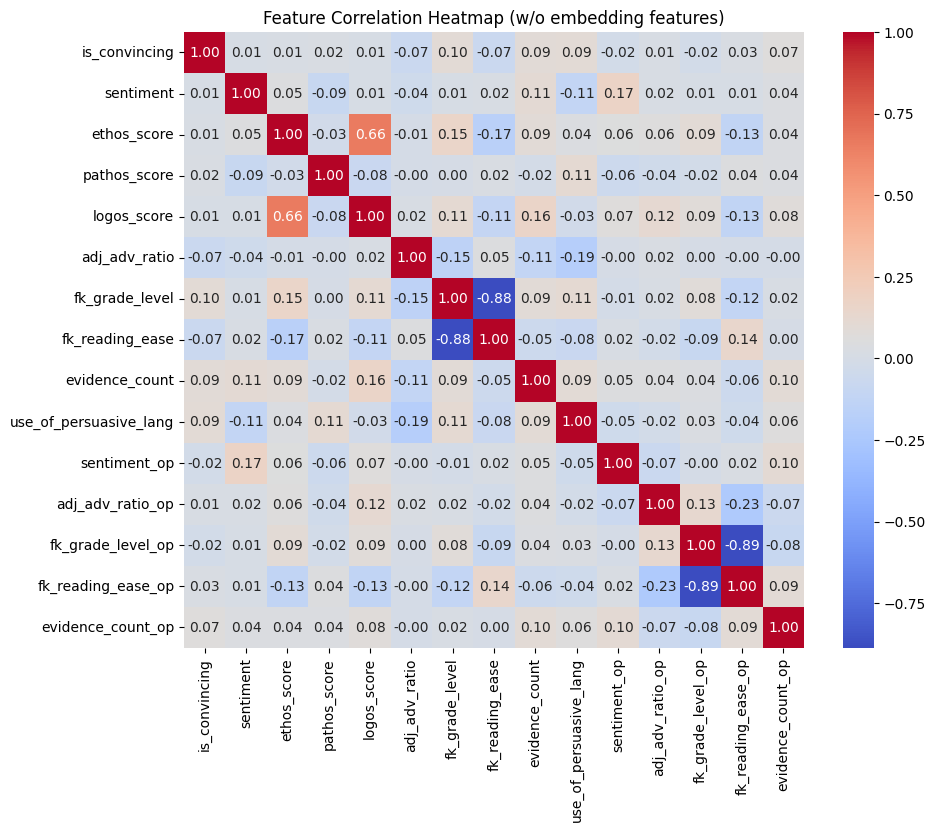

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation for numeric features only
comments_df_no_embedding = comments_df.loc[:, ~comments_df.columns.str.startswith('embedding_')]
corr_matrix = comments_df_no_embedding.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap (w/o embedding features)")
plt.show()

# ８. Training a Model to Predict Persuasiveness

The final step would be to use all the features we created as input to multiple ML models to predict whether a comment would be convincing. We will train multiple models and search for the best model.

In [ ]:
comments_df.columns

Index(['original_post', 'thread_text', 'final_comment', 'is_convincing',
       'final_comment_id', 'cleaned_final_comment', 'cleaned_thread_text',
       'cleaned_original_post', 'sentiment', 'tone', 'tone_label',
       'tone_google', 'style', 'ethos_score', 'pathos_score', 'logos_score',
       'adj_adv_ratio', 'fk_grade_level', 'fk_reading_ease', 'style_label',
       'evidence_count', 'sentiment_op', 'tone_google_op', 'style_op',
       'adj_adv_ratio_op', 'fk_grade_level_op', 'fk_reading_ease_op',
       'evidence_count_op', 'style_label_op'],
      dtype='object')

In [ ]:
categorical_features = ["tone_google", 'tone_google_op']
binary_features = ["style_label", 'style_label_op']
numeric_features = ["sentiment", "adj_adv_ratio", 'fk_grade_level', 'fk_reading_ease', 'evidence_count',
                    'sentiment_op', 'adj_adv_ratio_op', 'fk_grade_level_op', 'fk_reading_ease_op', 'evidence_count_op']
label = "is_convincing"

## 8.1 Encode Categorical Features

In [ ]:
comments_df['is_formal'] = comments_df['style_label'].apply(lambda x: 1 if x == 'formal' else 0)
comments_df['is_formal_op'] = comments_df['style_label_op'].apply(lambda x: 1 if x == 'formal' else 0)

In [ ]:
comments_df[['style_label', 'is_formal', 'style_label_op', 'is_formal_op']].head()


style_label  is_formal style_label_op  is_formal_op
0      formal          1         formal             1
1    informal          0         formal             1
2    informal          0         formal             1
3    informal          0         formal             1
4      formal          1         formal             1

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
tone_encoded = onehot_encoder.fit_transform(comments_df[categorical_features])
tone_df = pd.DataFrame(tone_encoded, columns=onehot_encoder.get_feature_names_out())

comments_df = comments_df.drop(columns=categorical_features).reset_index(drop=True)
comments_df = pd.concat([comments_df, tone_df], axis=1)

In [ ]:
tone_df.columns


Index(['tone_google_Challenging', 'tone_google_Compassionate',
       'tone_google_Concerned', 'tone_google_Curious',
       'tone_google_Frustrated', 'tone_google_Hopeful', 'tone_google_Humorous',
       'tone_google_Logical', 'tone_google_Neutral', 'tone_google_Nostalgic',
       'tone_google_Observational', 'tone_google_Optimistic',
       'tone_google_Other', 'tone_google_Passionate', 'tone_google_Reassuring',
       'tone_google_Sarcastic', 'tone_google_Skeptical', 'tone_google_nan',
       'tone_google_op_Humorous', 'tone_google_op_Logical',
       'tone_google_op_Neutral', 'tone_google_op_Passionate',
       'tone_google_op_Sarcastic'],
      dtype='object')

## 8.2 Split to Train and Test

First, we want to create a final dataframe with only the relevant features

In [ ]:
features = tone_df.columns.tolist() + ['is_formal', 'is_formal_op'] + numeric_features + [label]
data = comments_df[features]
data.head()

tone_google_Challenging  tone_google_Compassionate  tone_google_Concerned  \
0                      0.0                        0.0                    0.0   
1                      0.0                        0.0                    0.0   
2                      0.0                        0.0                    0.0   
3                      0.0                        0.0                    0.0   
4                      0.0                        0.0                    0.0   

   tone_google_Curious  tone_google_Frustrated  tone_google_Hopeful  \
0                  0.0                     0.0                  0.0   
1                  0.0                     0.0                  0.0   
2                  0.0                     0.0                  0.0   
3                  0.0                     0.0                  0.0   
4                  0.0                     0.0                  0.0   

   tone_google_Humorous  tone_google_Logical  tone_google_Neutral  \
0                   0.0                  1.0                  0.0   
1                   0.0                  1.0                  0.0   
2                   0.0                  1.0                  0.0   
3                   0.0                  1.0                  0.0   
4                   0.0                  1.0                  0.0   

   tone_google_Nostalgic  ...  adj_adv_ratio  fk_grade_level  fk_reading_ease  \
0                    0.0  ...       0.750000             7.7            59.90   
1                    0.0  ...       1.571429             5.2            77.23   
2                    0.0  ...       1.142857            12.8            52.02   
3                    0.0  ...       1.313725             8.0            64.51   
4                    0.0  ...       2.000000             6.0            69.79   

   evidence_count  sentiment_op  adj_adv_ratio_op  fk_grade_level_op  \
0               1       -0.9313          1.791667               11.7   
1               0       -0.9313          1.791667               11.7   
2               2       -0.9313          1.791667               11.7   
3               5       -0.9313          1.791667               11.7   
4               1       -0.9313          1.791667               11.7   

   fk_reading_ease_op  evidence_count_op  is_convincing  
0               60.28                2.0              0  
1               60.28                2.0              0  
2               60.28                2.0              0  
3               60.28                2.0              0  
4               60.28                2.0              0  

[5 rows x 36 columns]

In [ ]:
data.columns

Index(['tone_google_Challenging', 'tone_google_Compassionate',
       'tone_google_Concerned', 'tone_google_Curious',
       'tone_google_Frustrated', 'tone_google_Hopeful', 'tone_google_Humorous',
       'tone_google_Logical', 'tone_google_Neutral', 'tone_google_Nostalgic',
       'tone_google_Observational', 'tone_google_Optimistic',
       'tone_google_Other', 'tone_google_Passionate', 'tone_google_Reassuring',
       'tone_google_Sarcastic', 'tone_google_Skeptical', 'tone_google_nan',
       'tone_google_op_Humorous', 'tone_google_op_Logical',
       'tone_google_op_Neutral', 'tone_google_op_Passionate',
       'tone_google_op_Sarcastic', 'is_formal', 'is_formal_op', 'sentiment',
       'adj_adv_ratio', 'fk_grade_level', 'fk_reading_ease', 'evidence_count',
       'sentiment_op', 'adj_adv_ratio_op', 'fk_grade_level_op',
       'fk_reading_ease_op', 'evidence_count_op', 'is_convincing'],
      dtype='object')

In [ ]:
import plotly.express as px

labels=["Convincing","Not Convincing"]

convincing = data["is_convincing"].value_counts().tolist()
values = [convincing[0], convincing[1]]

fig = px.pie(values=data["is_convincing"].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=['skyblue', 'orange']
             ,title="Convincing Vs. Not-Convincing Comments")
fig.show()

In [ ]:
data["is_convincing"].value_counts()

is_convincing
0    3481
1     607
Name: count, dtype: int64

In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data["is_convincing"]
X = data.drop('is_convincing',axis=1)
X.shape, y.shape

((4088, 35), (4088,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((3270, 35), (818, 35))

In [ ]:
import pandas as pd
# Combine X_train and y_train
combined_df = pd.concat([X_train, y_train], axis=1)

# Save to file
file_path = '/content/drive/MyDrive/combined_train_data.csv'
combined_df.to_csv(file_path, index=False)


combined_df = pd.concat([X_test, y_test], axis=1)

# Save to file
file_path = '/content/drive/MyDrive/combined_test_data.csv'
combined_df.to_csv(file_path, index=False)

## 8.3 Scale Data

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled_features = scaler.fit_transform(X_train[numeric_features])
X_test_scaled_features = scaler.transform(X_test[numeric_features])

X_train[numeric_features] = X_train_scaled_features
X_test[numeric_features] = X_test_scaled_features

## 8.4 Train and Evaluate Models - Version 1

Important: The following training of the models was executed on a previous version of the data, that did not include the feature 'use_of_presuasive_lang' and the embeddings.

In a later phase we added the additional features. Below (section 8.5) we include re-training of the models with the new features.

In [16]:
pip install xgboost

In [17]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display, Markdown
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

In [19]:
import random
np.random.seed(402) # we would like to set the random seed, to be able to reproduce the results, because we use Random Forest model.
scoring='f1'

models = [
    ('logistic regression', GridSearchCV(
        LogisticRegression(random_state=42, class_weight='balanced'),
         {'C': [0.1, 1, 10, 100],
          'penalty': ['l1', 'l2'],
          'solver': ['lbfgs', 'newton-cholesky', 'liblinear']},
        cv=5, scoring=scoring)),

    ('SVC', GridSearchCV(
        SVC(random_state=42, class_weight='balanced'),
         {'C': [0.1, 1, 10],
          'kernel': ['linear', 'rbf'],
          'gamma': [0.1, 1, 10],
          'degree': [2, 3, 4]},
        cv= 5, scoring=scoring)),

    ('decision tree', GridSearchCV(
        DecisionTreeClassifier(random_state=42, class_weight='balanced'),
         {'max_depth': [None, 5, 10, 15],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 5, 20],
          'max_features': [None, 'sqrt', 'log2']},
        cv= 5, scoring=scoring)),

    ('random forest', GridSearchCV(
        RandomForestClassifier(random_state=42, class_weight='balanced'),
         {'n_estimators': [10, 100, 1000],
          'max_depth': [None, 5, 10, 15],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 5, 20]},
        cv=5, scoring=scoring)),

    ('xgboost', GridSearchCV(
        xgb.XGBClassifier(random_state=42, scale_pos_weight=1),  # scale_pos_weight can be used for imbalance
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.01, 0.1, 0.3],
         'max_depth': [3, 6, 9],
         'gamma': [0, 0.1, 0.2]},
        cv=5, scoring=scoring))
    ]

In [20]:
threshold = 0.5 # Convert probabilities to binary predictions (0 or 1)

def measure_error(y_true, y_pred_proba, label):
    y_pred = (y_pred_proba >= threshold).astype(int)
    return pd.Series({"accuracy": accuracy_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred, average ='macro'),
                      'f1': f1_score(y_true, y_pred, average ='macro')},
                      name=label)

def execute_models(X_train, y_train, X_test, y_test, models):
  metrics = list()
  for model_name, model in models:
      print(f"Training {model_name}...")

      model.fit(X_train, y_train)
      if hasattr(model, "predict_proba"):
        y_test_positive_pred = model.predict_proba(X_test)[:,1]
        y_train_positive_pred = model.predict_proba(X_train)[:,1]

      elif hasattr(model, "decision_function"):  # Use decision_function for SVC
            y_test_positive_pred = model.decision_function(X_test)
            y_train_positive_pred = model.decision_function(X_train)
      else:
            raise ValueError(f"Model {model_name} does not support probability prediction.")

      # Evaluate
      print(f"Evaluating {model_name} ...")
      train_test_full_error = pd.concat([measure_error(y_test, y_test_positive_pred, 'test '+ model_name),
                                        measure_error(y_train, y_train_positive_pred, 'train '+ model_name)],
                                        axis=1)
      metrics.append(train_test_full_error)

  metrics = pd.concat(metrics, axis=1)
  return metrics

In [ ]:
metrics = execute_models(X_train, y_train, X_test, y_test, models)

Training logistic regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/

Evaluating logistic regression ...
Training SVC...
Evaluating SVC ...
Training decision tree...
Evaluating decision tree ...
Training random forest...
Evaluating random forest ...
Training xgboost...
Evaluating xgboost ...


In [ ]:
display(Markdown('**ML models**'))
display(metrics)

**ML models**

test logistic regression  train logistic regression  test SVC  \
accuracy                  0.556235                   0.588991  0.770171   
recall                    0.623493                   0.646525  0.626095   
f1                        0.496861                   0.522782  0.606026   

          train SVC  test decision tree  train decision tree  \
accuracy   0.819878            0.733496             0.817431   
recall     0.783820            0.659212             0.829939   
f1         0.717423            0.605450             0.731624   

          test random forest  train random forest  test xgboost  train xgboost  
accuracy            0.804401             0.893578      0.870416       0.962385  
recall              0.673500             0.884849      0.616621       0.875155  
f1                  0.653320             0.821955      0.648420       0.917087

### Initial training results
* Best Accuracy: XGBoost - 0.870416
* Best recall: Random Forest - 0.673500
* Best F1: Random Forest - 0.653320

The results seem not good enough, so we will try to use undersampling to solve the imbalanced data issue that may affect the models ability to predict correctly.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(
    sampling_strategy='auto',
    random_state=42
)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

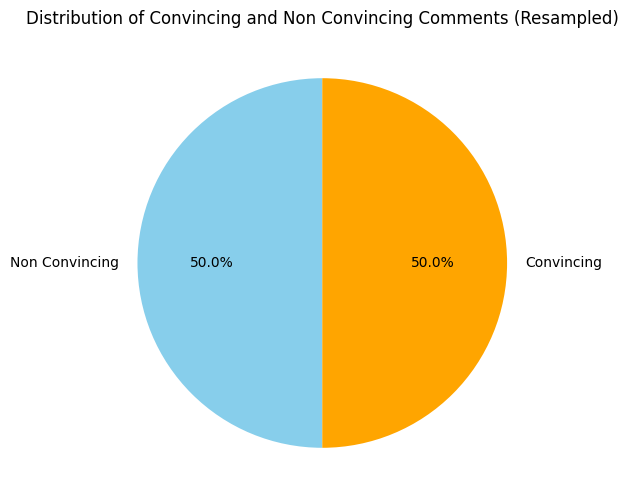

In [ ]:
class_distribution = pd.Series(y_train_resampled).value_counts()

# Labels and sizes for the pie chart
labels = ['Non Convincing', 'Convincing']
sizes = class_distribution.values

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Distribution of Convincing and Non Convincing Comments (Resampled)')
plt.show()

In [ ]:
metrics = execute_models(X_train_resampled, y_train_resampled, X_test, y_test, models)

Training logistic regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/

Evaluating logistic regression ...
Training SVC...
Evaluating SVC ...
Training decision tree...
Evaluating decision tree ...
Training random forest...
Evaluating random forest ...
Training xgboost...
Evaluating xgboost ...


In [ ]:
display(Markdown('**ML models - Balanced Data**'))
display(metrics)

**ML models - Balanced Data**

test logistic regression  train logistic regression  test SVC  \
accuracy                  0.536675                   0.637860  0.694377   
recall                    0.642749                   0.637860  0.629427   
f1                        0.490192                   0.632443  0.571530   

          train SVC  test decision tree  train decision tree  \
accuracy   0.765432            0.597800             0.723251   
recall     0.765432            0.671787             0.723251   
f1         0.764411            0.534812             0.721411   

          test random forest  train random forest  test xgboost  train xgboost  
accuracy            0.638142             0.897119      0.668704       0.997942  
recall              0.698875             0.897119      0.696320       0.997942  
f1                  0.566778             0.896945      0.584065       0.997942

### Training with Undersampling Results
* Best Accuracy: SVC - 0.694377
* Best recall: Random Forest - 0.698875
* Best F1: XGBoost - 0.584065

### Previous Results
* Best Accuracy: XGBoost - 0.870416
* Best recall: Random Forest - 0.673500
* Best F1: Random Forest - 0.653320

### Best Results So Far
* Best Accuracy: XGBoost (initial training) - 0.870416
* Best recall: Random Forest (Undersampling) - 0.698875
* Best F1: Random Forest (initial training) - 0.653320

We will try to balance the dataset with Oversampling instead - it means to create synthetic data for the minority class (convincing comments).

In [ ]:
from imblearn.over_sampling import SMOTE

oversample_strategy = 'auto'

smote = SMOTE(sampling_strategy=oversample_strategy, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Make sure that we have the same amount of comments in both classes:

In [ ]:
y_train_resampled.value_counts()

is_convincing
1    2784
0    2784
Name: count, dtype: int64

Finally let's re-run the models

In [ ]:
metrics = execute_models(X_train_resampled, y_train_resampled, X_test, y_test, models)

Training logistic regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/

Evaluating logistic regression ...
Training SVC...
Evaluating SVC ...
Training decision tree...
Evaluating decision tree ...
Training random forest...
Evaluating random forest ...
Training xgboost...
Evaluating xgboost ...


In [ ]:
display(Markdown('**ML models - After Oversampling**'))
display(metrics)

**ML models - After Oversampling**

test logistic regression  train logistic regression  test SVC  \
accuracy                  0.850856                   0.667744  0.852078   
recall                    0.499283                   0.667744  0.500000   
f1                        0.459709                   0.667029  0.460066   

          train SVC  test decision tree  train decision tree  \
accuracy   0.999641            0.628362              0.99982   
recall     0.999641            0.450680              0.99982   
f1         0.999641            0.449802              0.99982   

          test random forest  train random forest  test xgboost  train xgboost  
accuracy            0.847188              0.99982      0.826406        0.99982  
recall              0.500545              0.99982      0.495180        0.99982  
f1                  0.466456              0.99982      0.472555        0.99982

### Training with Oversampling Results
* Best Accuracy: SVC - 0.852078
* Best recall: Random Forest - 0.500545
* Best F1: XGBoost - 0.472555

### Previous Results
* Best Accuracy: XGBoost (initial training) - 0.870416
* Best recall: Random Forest (Undersampling) - 0.698875
* Best F1: Random Forest (initial training) - 0.653320

### Best Results So Far
* Best Accuracy: XGBoost (initial training) - 0.870416
* Best recall: Random Forest (Undersampling) - 0.698875
* Best F1: Random Forest (initial training) - 0.653320


Oversampling did not improve any of the metrics.

## 8.5 Train and Evaluate Models - Version 2

Due to low performance, we added to our dataset new features. The first is the 'use_of_persuasive_lang' and the second is actually a set of features, which are the embedding features, see sections 6.8 and 6.9 above for documentation.

We will re-define the columns and execute all pre-processing like done for the first version of training.

In [ ]:
chunk_size = 10
cols = list(comments_df.columns)
for i in range(0, len(cols), chunk_size):
    print(str(cols[i:i + chunk_size]).strip('[]'))

'original_post', 'thread_text', 'final_comment', 'is_convincing', 'final_comment_id', 'cleaned_final_comment', 'cleaned_thread_text', 'cleaned_original_post', 'sentiment', 'tone'
'tone_label', 'tone_google', 'style', 'ethos_score', 'pathos_score', 'logos_score', 'adj_adv_ratio', 'fk_grade_level', 'fk_reading_ease', 'style_label'
'evidence_count', 'use_of_persuasive_lang', 'embedding', 'embedding_0', 'embedding_1', 'embedding_2', 'embedding_3', 'embedding_4', 'embedding_5', 'embedding_6'
'embedding_7', 'embedding_8', 'embedding_9', 'embedding_10', 'embedding_11', 'embedding_12', 'embedding_13', 'embedding_14', 'embedding_15', 'embedding_16'
'embedding_17', 'embedding_18', 'embedding_19', 'embedding_20', 'embedding_21', 'embedding_22', 'embedding_23', 'embedding_24', 'embedding_25', 'embedding_26'
'embedding_27', 'embedding_28', 'embedding_29', 'embedding_30', 'embedding_31', 'embedding_32', 'embedding_33', 'embedding_34', 'embedding_35', 'embedding_36'
'embedding_37', 'embedding_38', 'e

In [6]:
categorical_features = ["tone_google", 'tone_google_op']
binary_features = ["style_label", 'style_label_op', 'use_of_persuasive_lang']
numeric_features = ["sentiment", "adj_adv_ratio", 'fk_grade_level', 'fk_reading_ease', 'evidence_count',
                    'sentiment_op', 'adj_adv_ratio_op', 'fk_grade_level_op', 'fk_reading_ease_op', 'evidence_count_op']
embedding_columns = [f'embedding_{i}' for i in range(143)]
label = "is_convincing"

Encode the categorical features:

In [ ]:
comments_df['is_formal'] = comments_df['style_label'].apply(lambda x: 1 if x == 'formal' else 0)
comments_df['is_formal_op'] = comments_df['style_label_op'].apply(lambda x: 1 if x == 'formal' else 0)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
tone_encoded = onehot_encoder.fit_transform(comments_df[categorical_features])
tone_df = pd.DataFrame(tone_encoded, columns=onehot_encoder.get_feature_names_out())

comments_df = comments_df.drop(columns=categorical_features).reset_index(drop=True)
comments_df = pd.concat([comments_df, tone_df], axis=1)

Split to train and test:

In [ ]:
features = tone_df.columns.tolist() + ['is_formal', 'is_formal_op', 'use_of_persuasive_lang'] + numeric_features + embedding_columns + [label]
data = comments_df[features]

y = data["is_convincing"]
X = data.drop('is_convincing',axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size = 0.2, random_state = 42)

In [ ]:
import pandas as pd
# Combine X_train and y_train
combined_df = pd.concat([X_train, y_train], axis=1)

# Save to file
file_path = '/content/drive/MyDrive/combined_train_data.csv'
combined_df.to_csv(file_path, index=False)


combined_df = pd.concat([X_test, y_test], axis=1)

# Save to file
file_path = '/content/drive/MyDrive/combined_test_data.csv'
combined_df.to_csv(file_path, index=False)

Scale the numeric features:

In [7]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled_features = scaler.fit_transform(X_train[numeric_features])
X_test_scaled_features = scaler.transform(X_test[numeric_features])

X_train[numeric_features] = X_train_scaled_features
X_test[numeric_features] = X_test_scaled_features

### Feature Selection
Including the embedding in the features list dramatically increases the number of features, so we will apply feature selection using the RFE - Recursive Feature Elimination technique.


We will try with 100 features.

In [9]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Feature selection using RFE (Recursive Feature Elimination)
number_of_features = 100
selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=number_of_features)
X_train_selected = selector.fit_transform(X_train, y_train)

In [10]:
selector.get_feature_names_out()

array(['tone_google_Logical', 'sentiment', 'fk_grade_level',
       'fk_reading_ease', 'sentiment_op', 'adj_adv_ratio_op',
       'fk_grade_level_op', 'fk_reading_ease_op', 'evidence_count_op',
       'embedding_0', 'embedding_1', 'embedding_2', 'embedding_3',
       'embedding_4', 'embedding_5', 'embedding_6', 'embedding_7',
       'embedding_9', 'embedding_10', 'embedding_11', 'embedding_12',
       'embedding_14', 'embedding_16', 'embedding_17', 'embedding_18',
       'embedding_19', 'embedding_20', 'embedding_21', 'embedding_22',
       'embedding_23', 'embedding_24', 'embedding_25', 'embedding_26',
       'embedding_27', 'embedding_28', 'embedding_29', 'embedding_30',
       'embedding_33', 'embedding_34', 'embedding_35', 'embedding_36',
       'embedding_37', 'embedding_38', 'embedding_39', 'embedding_40',
       'embedding_41', 'embedding_42', 'embedding_44', 'embedding_45',
       'embedding_48', 'embedding_51', 'embedding_52', 'embedding_53',
       'embedding_55', 'embedding_

In [11]:
print(list(selector.get_feature_names_out()))

['tone_google_Logical', 'sentiment', 'fk_grade_level', 'fk_reading_ease', 'sentiment_op', 'adj_adv_ratio_op', 'fk_grade_level_op', 'fk_reading_ease_op', 'evidence_count_op', 'embedding_0', 'embedding_1', 'embedding_2', 'embedding_3', 'embedding_4', 'embedding_5', 'embedding_6', 'embedding_7', 'embedding_9', 'embedding_10', 'embedding_11', 'embedding_12', 'embedding_14', 'embedding_16', 'embedding_17', 'embedding_18', 'embedding_19', 'embedding_20', 'embedding_21', 'embedding_22', 'embedding_23', 'embedding_24', 'embedding_25', 'embedding_26', 'embedding_27', 'embedding_28', 'embedding_29', 'embedding_30', 'embedding_33', 'embedding_34', 'embedding_35', 'embedding_36', 'embedding_37', 'embedding_38', 'embedding_39', 'embedding_40', 'embedding_41', 'embedding_42', 'embedding_44', 'embedding_45', 'embedding_48', 'embedding_51', 'embedding_52', 'embedding_53', 'embedding_55', 'embedding_57', 'embedding_59', 'embedding_62', 'embedding_63', 'embedding_64', 'embedding_66', 'embedding_67', 'em

In [12]:
X_train_selected.shape

(3270, 100)

Finally we can train the models.

In [13]:
X_test_selected = selector.transform(X_test)

In [23]:
metrics = execute_models(X_train_selected, y_train, X_test_selected, y_test, models)

Training logistic regression...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

Evaluating logistic regression ...
Training SVC...
Evaluating SVC ...
Training decision tree...
Evaluating decision tree ...
Training random forest...
Evaluating random forest ...
Training xgboost...
Evaluating xgboost ...


In [24]:
display(Markdown('**ML models - Selected Features**'))
display(metrics)

**ML models - Selected Features**

test logistic regression  train logistic regression  test SVC  \
accuracy                  0.669927                   0.699388  0.858191   
recall                    0.686792                   0.714757  0.606033   
f1                        0.581505                   0.609184  0.630729   

          train SVC  test decision tree  train decision tree  \
accuracy   0.982875            0.628362             0.716514   
recall     0.986546            0.621424             0.757084   
f1         0.967477            0.535338             0.634225   

          test random forest  train random forest  test xgboost  train xgboost  
accuracy            0.733496             0.801529      0.869193            1.0  
recall              0.652383             0.807862      0.612489            1.0  
f1                  0.602154             0.711456      0.643221            1.0

### Training with Embedding + Feature Selection Results
* Best Accuracy: XGBoost - 0.869193
* Best recall: Logistic Regression - 0.686792
* Best F1: XGBoost - 0.643221

### Previous Results
* Best Accuracy: XGBoost (initial training) - 0.870416
* Best recall: Random Forest (Undersampling) - 0.698875
* Best F1: Random Forest (initial training) - 0.653320


### Best Results
* Best Accuracy: XGBoost (initial training) - 0.870416
* Best recall: Random Forest (Undersampling) - 0.698875
* Best F1: Random Forest (initial training) - 0.653320


As we see, adding the embedding and using feture selection did not improve the results.

# ９. Conclusion and Future Research

In this work we investigated comments from the CMV forum.


We created a new and rich dataset with comments, context (thread text by the author of the comment), original post and several features extracted from the comment + context text and from the original post text.


This dataset can be extended in the future by adding more features and can be used for furher studies.


Possible features to add (we didn't add them due to time limitations):
* Lexical Complexity:
  * Type-token ratio (TTR) – Measures vocabulary richness.
  * Word frequency analysis – Uses external corpora to determine whether a text contains rare or common words.
* Syntactic Complexity:
  * Parse tree depth – Longer, more nested sentences are syntactically complex.
  * Mean length of sentences (MLS) – Longer sentences generally indicate higher complexity.


The dataset can be downloded from [here](https://drive.google.com/file/d/1cJWCp6StLol6M9yQHdI6irssBkTi-dKO/view?usp=sharing).

Once we had the dataset, we trained multiple ML models and checked their ability to predict persuasiveness.

We saw that although participants in the CMV forum post their opinions with the intention of hearing opposing views and being open to persuasion, in practice, there is a relatively small number of messages that are marked as persuasive by those same writers. This leads to an imbalanced dataset, which can be a challenge for ML models. We tried 2 resampling methods to overcome this problem.

We also tried to add embedding of the original text and include this in the features. Since this adds a lot of features, we combined this change with Feature Selection technique. We chose to use 100 features, but of course, future researches can try different numbers of features to get improved results.

The best results we got from this research were:
* Best Accuracy: XGBoost (without embedding and without resampling) - 0.870416
* Best recall: Random Forest (without embedding, with undersampling) - 0.698875
* Best F1: Random Forest (without embedding and without resampling) - 0.653320

# １0. References

1. Priniski, J.H. & Horne, Z. (2018). [Attitude Change on Reddit’s Change My View](https://jpriniski.github.io/papers/cogsci-reddit.pdf). In T.T. Rogers, M. Rau, X. Zhu, & C. W. Kalish (Eds.), Proceedings of the 40th Annual Conference of the Cognitive Science Society (pp. 2276-2281). Austin, TX: Cognitive Science Society.

2. [GitHub repo](https://github.com/jpriniski/CMV) of source [1]

3. Xiao, L., Mensah, H. (2022). [How Does the Thread Level of a Comment Affect its Perceived Persuasiveness? A Reddit Study](https://doi.org/10.1007/978-3-031-10464-0_55). In: Arai, K. (eds) Intelligent Computing. SAI 2022. Lecture Notes in Networks and Systems, vol 507. Springer, Cham.

4. Ivan Habernal and Iryna Gurevych. 2016. [What makes a convincing argument? Empirical analysis and detecting attributes of convincingness in Web argumentation](https://aclanthology.org/D16-1129.pdf). In Proceedings of the 2016 Conference on Empirical Methods in Natural Language Processing, pages 1214–1223, Austin, Texas. Association for Computational Linguistics.



## This Work Repo
https://github.com/jct-nlp/change-my-view-2025
